In [2]:
import numpy as np
import time
import matplotlib.pyplot as plt
import qcodes as qc
import qcodes.instrument_drivers.nplab_drivers as npd

In [3]:
%matplotlib notebook

In [4]:
npd.triton_init('lockin865', 'lockin830', 'srframe')
station = qc.Station(triton, lockin865, lockin830, srframe)

Connected to: OXFORD INSTRUMENTS Triton (serial:N/A, firmware:2.449) in 0.02s
Connected to: Stanford_Research_Systems SR865A (serial:003538, firmware:V1.51) in 0.70s
Connected to: Stanford_Research_Systems SR830 (serial:s/n49840, firmware:ver1.07) in 0.04s
Connected to: Stanford_Research_Systems SIM900 (serial:s/n152150, firmware:ver3.6) in 0.75s


In [302]:
srframe.volt_p1.step = 0.08
srframe.volt_p1.inter_delay = 0.1
srframe.volt_p5.step = 0.08
srframe.volt_p5.inter_delay = 0.1

In [8]:
srframe.volt_p5(0)

In [17]:
triton.read_temps()

MC - on:  0.0248669 K
MC_cernox - on:  321.181 K
still - on:  0.771445 K
cold_plate - on:  0.068978 K
magnet - on:  4.38596 K
PT2h - on:  3.48773 K
PT2p - on:  3.7472 K
PT1h - on:  45.6958 K
PT1p - on:  62.4105 K


In [16]:
triton.read_pressures()

P1:  730.793
P2:  849.962
P3:  9.4
P4:  10.2
P5:  304.669
POVC:  0.0003


In [11]:
srframe.volt_p1(-6)
time.sleep(10)
gvals = np.linspace(-6, 6, 121)
data1, plot1 = npd.single_param_sweep(srframe.volt_p1, gvals, 1.1, lockin865.X, lockin865.Y, lockin865.R, lockin830.X, lockin830.Y, lockin830.R, DataName='M22_randomtemp_maybe32K_2nA')
srframe.volt_p1(0)

Started at 2019-11-27 00:11:30
DataSet:
   location = 'data/2019-11-27/#001_M22_randomtemp_maybe32K_2nA_00-11-24'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (121,)
   Measured | lockin865_X         | X            | (121,)
   Measured | lockin865_Y         | Y            | (121,)
   Measured | lockin865_R         | R            | (121,)
   Measured | lockin830_X         | X            | (121,)
   Measured | lockin830_Y         | Y            | (121,)
   Measured | lockin830_R         | R            | (121,)
Finished at 2019-11-27 00:14:33


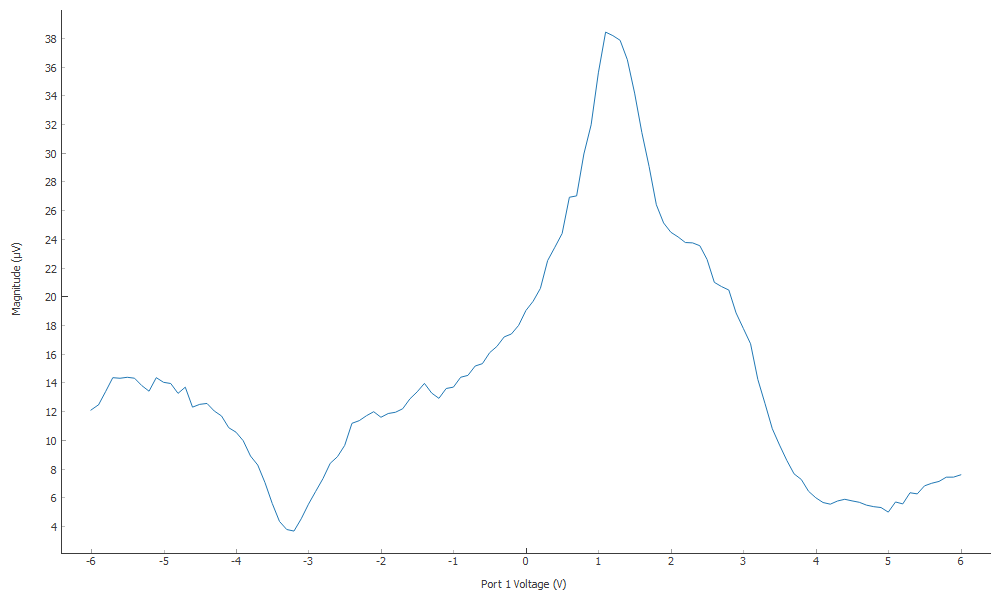

In [18]:
plot1[2]

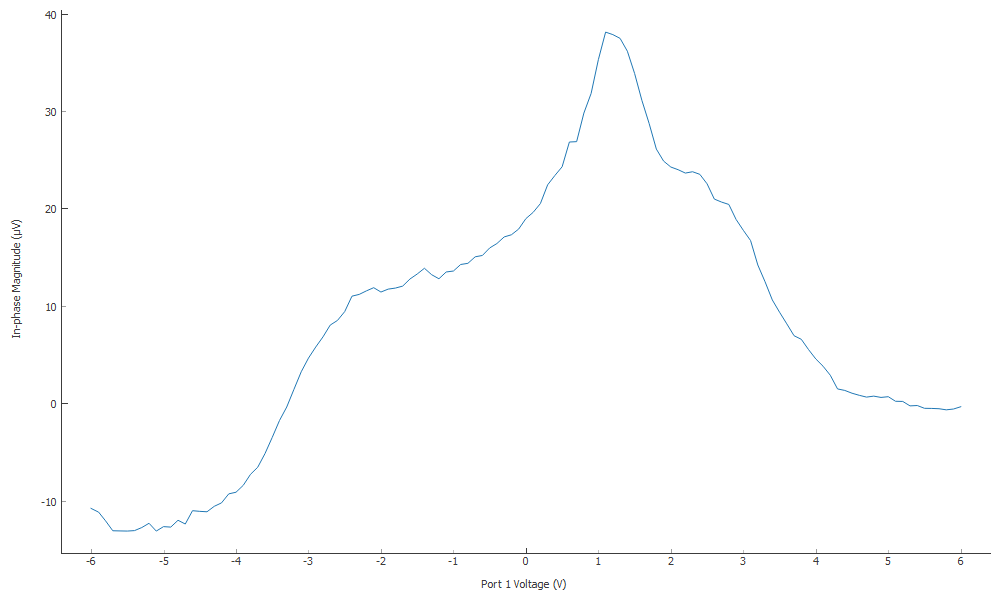

In [19]:
plot1[0]

In [20]:
srframe.volt_p1(-6)
time.sleep(10)
gvals = np.linspace(-6, 6, 121)
data2, plot2 = npd.single_param_sweep(srframe.volt_p1, gvals, 1.1, lockin865.X, lockin865.Y, lockin865.R, lockin830.X, lockin830.Y, lockin830.R, DataName='M22_randomtemp_base_2nA')
srframe.volt_p1(0)

Started at 2019-11-27 08:44:37
DataSet:
   location = 'data/2019-11-27/#002_M22_randomtemp_base_2nA_08-44-34'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (121,)
   Measured | lockin865_X         | X            | (121,)
   Measured | lockin865_Y         | Y            | (121,)
   Measured | lockin865_R         | R            | (121,)
   Measured | lockin830_X         | X            | (121,)
   Measured | lockin830_Y         | Y            | (121,)
   Measured | lockin830_R         | R            | (121,)
Finished at 2019-11-27 08:47:39


# M19 and M22 contacts seem garbage. Going to focus on M20

In [23]:
srframe.volt_p1(-5)
time.sleep(15)
gvals = np.linspace(-5, 5, 401)
data3, plot3 = npd.single_param_sweep(srframe.volt_p1, gvals, 1.3, lockin865.X, lockin865.Y, lockin865.R, DataName='M20_14-15_865_baseT_disconnected_0.5nA')
srframe.volt_p1(0)

Started at 2019-11-27 17:00:24
DataSet:
   location = 'data/2019-11-27/#003_M20_14-15_865_baseT_disconnected_0.5nA_17-00-22'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (401,)
   Measured | lockin865_X         | X            | (401,)
   Measured | lockin865_Y         | Y            | (401,)
   Measured | lockin865_R         | R            | (401,)
Finished at 2019-11-27 17:10:03


<IPython.core.display.Javascript object>


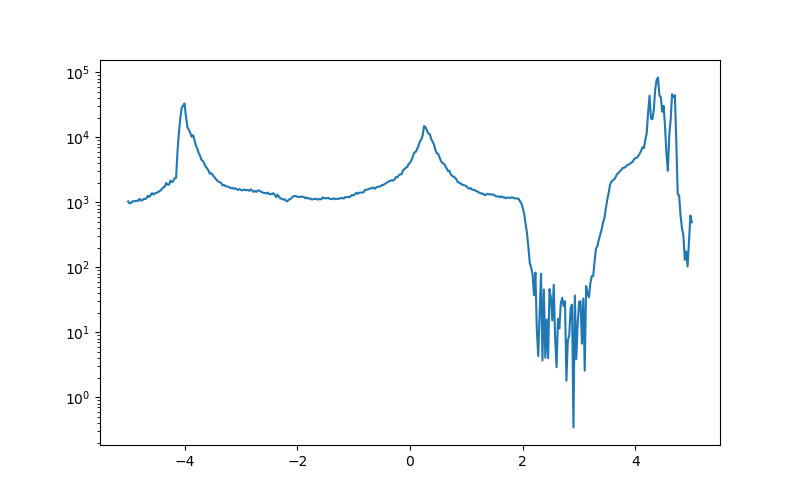

In [24]:
plt.figure(figsize=(8, 5))
plt.semilogy(gvals, np.abs(data3.lockin865_X[:]/0.5e-9), label='M20 14-15')

In [25]:
srframe.volt_p1(-5)
time.sleep(15)
gvals = np.linspace(-5, 5, 401)
data4, plot4 = npd.single_param_sweep(srframe.volt_p1, gvals, 1.3, lockin865.X, lockin865.Y, lockin865.R, DataName='M20_15-16_865_baseT_disconnected_0.5nA')
srframe.volt_p1(0)

Started at 2019-11-27 17:15:58
DataSet:
   location = 'data/2019-11-27/#004_M20_15-16_865_baseT_disconnected_0.5nA_17-15-56'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (401,)
   Measured | lockin865_X         | X            | (401,)
   Measured | lockin865_Y         | Y            | (401,)
   Measured | lockin865_R         | R            | (401,)
Finished at 2019-11-27 17:25:37


<IPython.core.display.Javascript object>


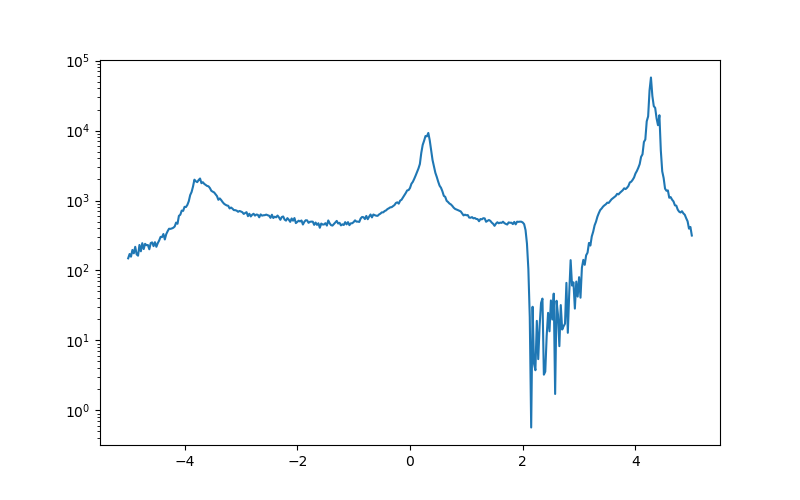

In [26]:
plt.figure(figsize=(8, 5))
plt.semilogy(gvals, np.abs(data4.lockin865_X[:]/0.5e-9), label='M20 15-16')

In [27]:
srframe.volt_p1(-5)
time.sleep(15)
gvals = np.linspace(-5, 5, 401)
data5, plot5 = npd.single_param_sweep(srframe.volt_p1, gvals, 1.3, lockin865.X, lockin865.Y, lockin865.R, DataName='M20_16-21_865_baseT_disconnected_0.5nA')
srframe.volt_p1(0)

Started at 2019-11-27 17:28:15
DataSet:
   location = 'data/2019-11-27/#005_M20_16-21_865_baseT_disconnected_0.5nA_17-28-14'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (401,)
   Measured | lockin865_X         | X            | (401,)
   Measured | lockin865_Y         | Y            | (401,)
   Measured | lockin865_R         | R            | (401,)
Finished at 2019-11-27 17:37:54


<IPython.core.display.Javascript object>


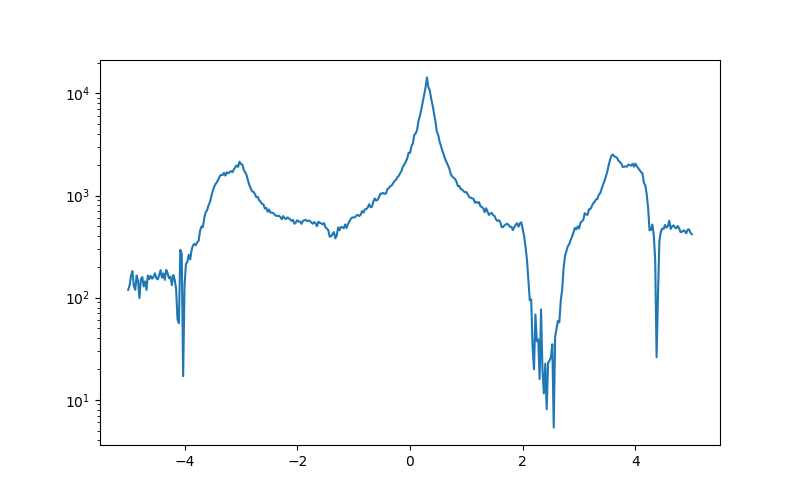

In [28]:
plt.figure(figsize=(8, 5))
plt.semilogy(gvals, np.abs(data5.lockin865_X[:]/0.5e-9), label='M20 16-21')

In [29]:
srframe.volt_p1(-5)
time.sleep(15)
gvals = np.linspace(-5, 5, 401)
data6, plot6 = npd.single_param_sweep(srframe.volt_p1, gvals, 1.3, lockin865.X, lockin865.Y, lockin865.R, DataName='M20_21-22_865_baseT_disconnected_0.5nA')
srframe.volt_p1(0)

Started at 2019-11-27 17:45:45
DataSet:
   location = 'data/2019-11-27/#006_M20_21-22_865_baseT_disconnected_0.5nA_17-45-44'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (401,)
   Measured | lockin865_X         | X            | (401,)
   Measured | lockin865_Y         | Y            | (401,)
   Measured | lockin865_R         | R            | (401,)
Finished at 2019-11-27 17:55:24


<IPython.core.display.Javascript object>


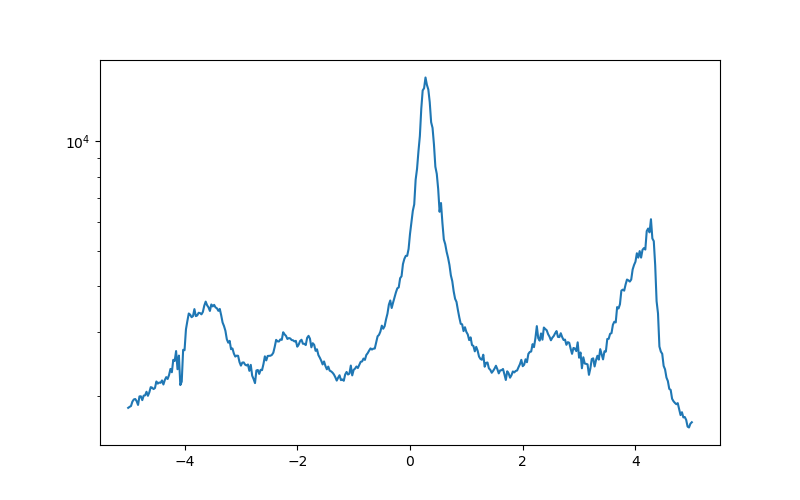

In [30]:
plt.figure(figsize=(8, 5))
plt.semilogy(gvals, np.abs(data6.lockin865_X[:]/0.5e-9), label='M20 21-22')

<IPython.core.display.Javascript object>


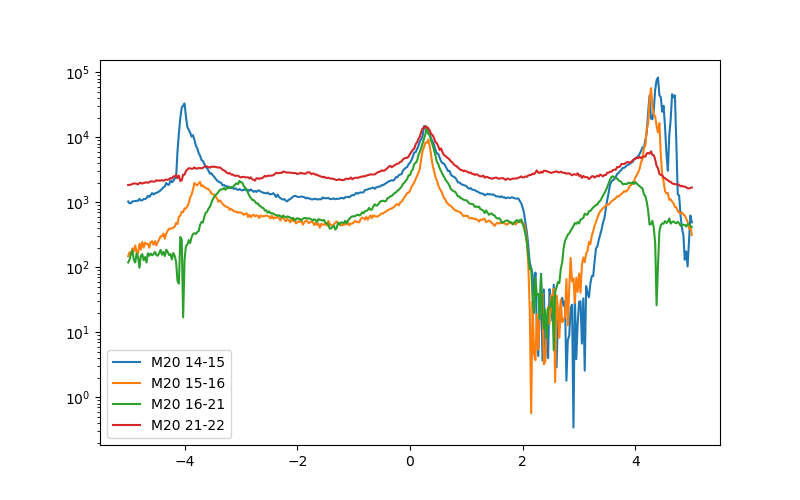

In [31]:
plt.figure(figsize=(8, 5))
plt.semilogy(gvals, np.abs(data3.lockin865_X[:]/0.5e-9), label='M20 14-15')
plt.semilogy(gvals, np.abs(data4.lockin865_X[:]/0.5e-9), label='M20 15-16')
plt.semilogy(gvals, np.abs(data5.lockin865_X[:]/0.5e-9), label='M20 16-21')
plt.semilogy(gvals, np.abs(data6.lockin865_X[:]/0.5e-9), label='M20 21-22')
plt.legend()

In [35]:
triton.magnet_swh(1)

Wait 5 min for the switch to warm


In [36]:
srframe.volt_p1(-5)
time.sleep(15)
gvals = np.linspace(-5, 5, 401)
data7, plot7 = npd.single_param_sweep(srframe.volt_p1, gvals, 1.3, lockin865.X, lockin865.Y, lockin865.R, DataName='M20_14-15_865_baseT_disconnected_0.5nA_0.5T')
srframe.volt_p1(0)

Started at 2019-11-27 18:13:29
DataSet:
   location = 'data/2019-11-27/#007_M20_14-15_865_baseT_disconnected_0.5nA_0.5T_18-13-27'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (401,)
   Measured | lockin865_X         | X            | (401,)
   Measured | lockin865_Y         | Y            | (401,)
   Measured | lockin865_R         | R            | (401,)
Finished at 2019-11-27 18:23:13


<IPython.core.display.Javascript object>


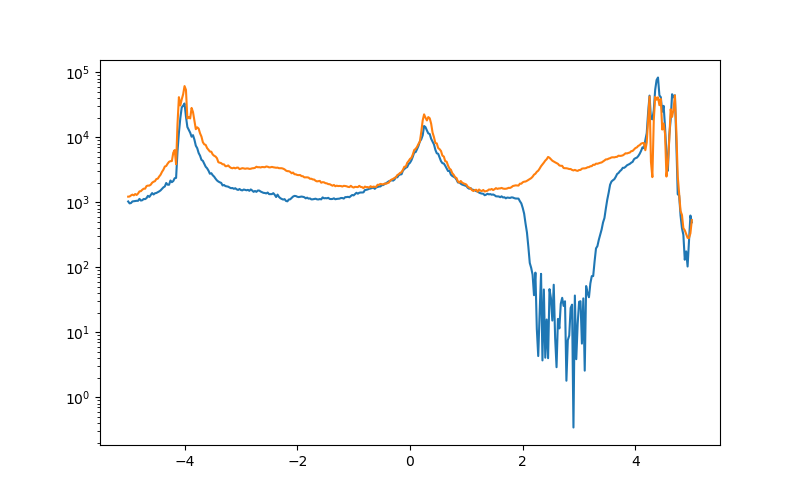

In [37]:
plt.figure(figsize=(8, 5))
plt.semilogy(gvals, np.abs(data3.lockin865_X[:]/0.5e-9), label='M20 14-15')
plt.semilogy(gvals, np.abs(data7.lockin865_X[:]/0.5e-9), label='M20 14-15_0.5T')

In [38]:
triton.field(8)

Are you sure you want to use the magnet? [y/n]: y
Sweep time approximately 3010.0 seconds


In [49]:
gvals = np.linspace(-4, 4, 1201)
bvals = np.linspace(8, 0, 161)
data8, plot8 = npd.twod_param_sweep(triton.field_set_stable, bvals, srframe.volt_p1, gvals, lockin865.X, lockin865.Y, lockin865.R, lockin830.X, lockin830.Y, lockin830.R, SetDelay1=12, SetDelay2=1.1, DataName='M20_14_15_865and16_45_830_8Tto0T_1nA_13.33Hz')
srframe.volt_p5(0)
srframe.volt_p1(0)

Started at 2019-11-29 08:51:20
DataSet:
   location = 'data/2019-11-29/#001_M20_14_15_865and16_45_830_8Tto0T_1nA_13.33Hz_08-51-17'
   <Type>   | <array_id>                  | <array.name>     | <array.shape>
   Setpoint | triton_field_set_stable_set | field_set_stable | (161,)
   Setpoint | srframe_volt_p1_set         | volt_p1          | (161, 1201)
   Measured | lockin865_X                 | X                | (161, 1201)
   Measured | lockin865_Y                 | Y                | (161, 1201)
   Measured | lockin865_R                 | R                | (161, 1201)
   Measured | lockin830_X                 | X                | (161, 1201)
   Measured | lockin830_Y                 | Y                | (161, 1201)
   Measured | lockin830_R                 | R                | (161, 1201)
Finished at 2019-11-29 08:51:20


ValueError: ("could not convert string to float: 'communication timeout'", 'getting triton_magnet_temp', 'setting triton_field_set_stable to 8.0')

In [57]:
srframe.volt_p1()

0.0

In [77]:
lockin865.amplitude(0.3)

In [51]:
srframe.volt_p1(-5)
time.sleep(15)
gvals = np.linspace(-5, 5, 401)
data9, plot9 = npd.single_param_sweep(srframe.volt_p1, gvals, 1.1, lockin865.X, lockin865.Y, lockin865.R, DataName='M20_14-15_865_baseT_disconnected_0.1nA')
srframe.volt_p1(0)

Started at 2019-11-29 08:52:03
DataSet:
   location = 'data/2019-11-29/#002_M20_14-15_865_baseT_disconnected_0.1nA_08-52-02'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (401,)
   Measured | lockin865_X         | X            | (401,)
   Measured | lockin865_Y         | Y            | (401,)
   Measured | lockin865_R         | R            | (401,)
Finished at 2019-11-29 09:00:23


In [72]:
triton.field(5.9)

Are you sure you want to use the magnet? [y/n]: y
Sweep time approximately 69.994 seconds


In [66]:
lockin865.close()

In [67]:
lockin830.close()

In [68]:
srframe.close()

In [78]:
gvals = np.linspace(-4, 4, 1201)
bvals = np.linspace(5.9, 0, 119)
data10, plot10 = npd.twod_param_sweep(triton.field_set_stable, bvals, srframe.volt_p1, gvals, lockin865.X, lockin865.Y, lockin865.R, lockin830.X, lockin830.Y, lockin830.R, SetDelay1=12, SetDelay2=1.1, DataName='M20_14_15_865and16_45_830_5.9Tto0T_3nA_13.33Hz')
srframe.volt_p5(0)
srframe.volt_p1(0)

Started at 2019-11-29 11:42:28
Please wait 69.994 seconds for the field sweep, plus the time required for operating the switch...
Please wait 29.986 seconds for the field sweep, plus the time required for operating the switch...
Please wait 29.992 seconds for the field sweep, plus the time required for operating the switch...
Please wait 29.997999999999998 seconds for the field sweep, plus the time required for operating the switch...
Please wait 29.992 seconds for the field sweep, plus the time required for operating the switch...
Please wait 30.003999999999998 seconds for the field sweep, plus the time required for operating the switch...
Please wait 30.003999999999998 seconds for the field sweep, plus the time required for operating the switch...
Please wait 29.986 seconds for the field sweep, plus the time required for operating the switch...
Please wait 30.003999999999998 seconds for the field sweep, plus the time required for operating the switch...
Please wait 29.992 seconds for

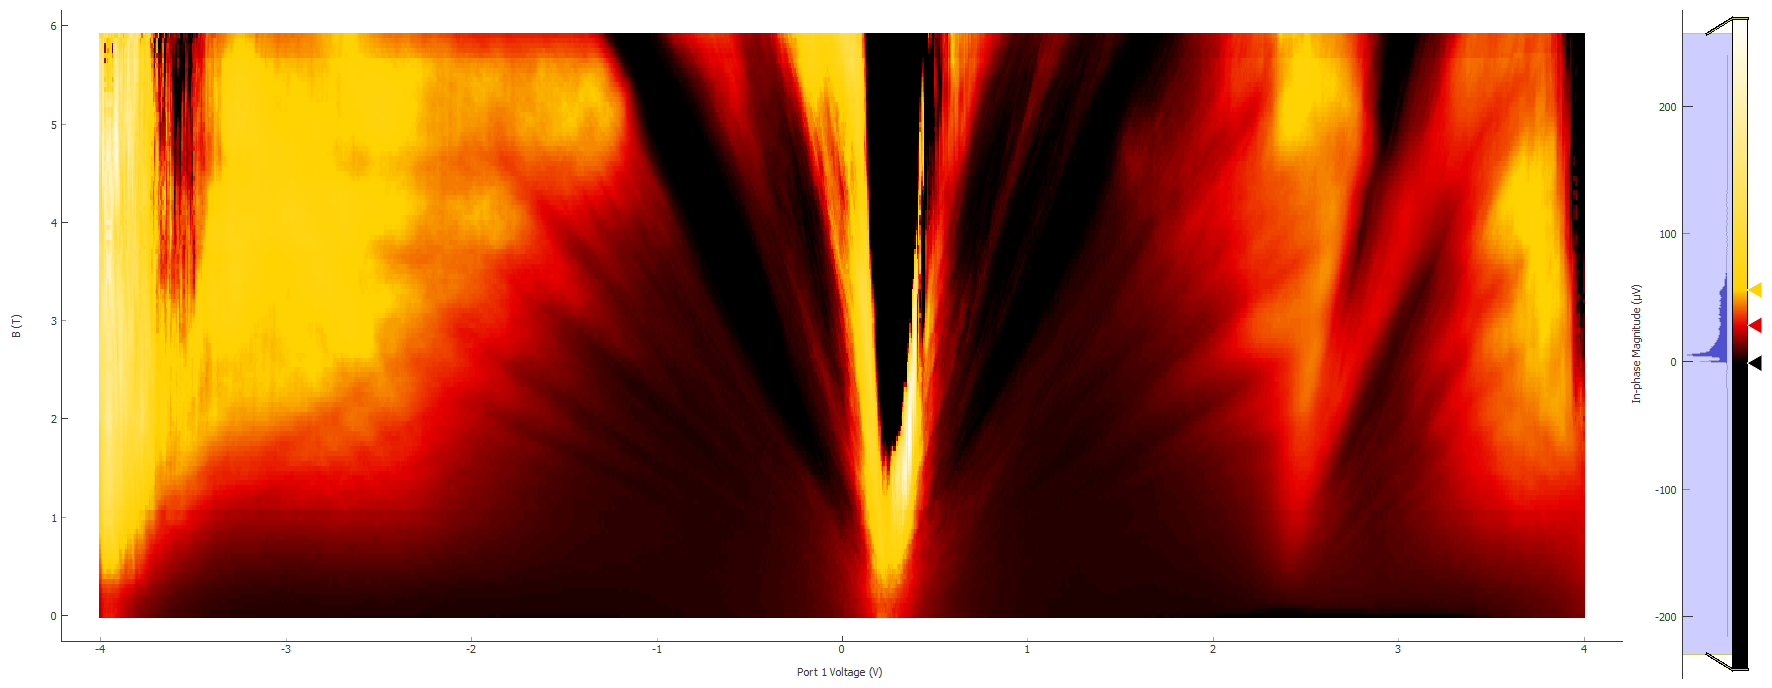

In [79]:
plot10[0]

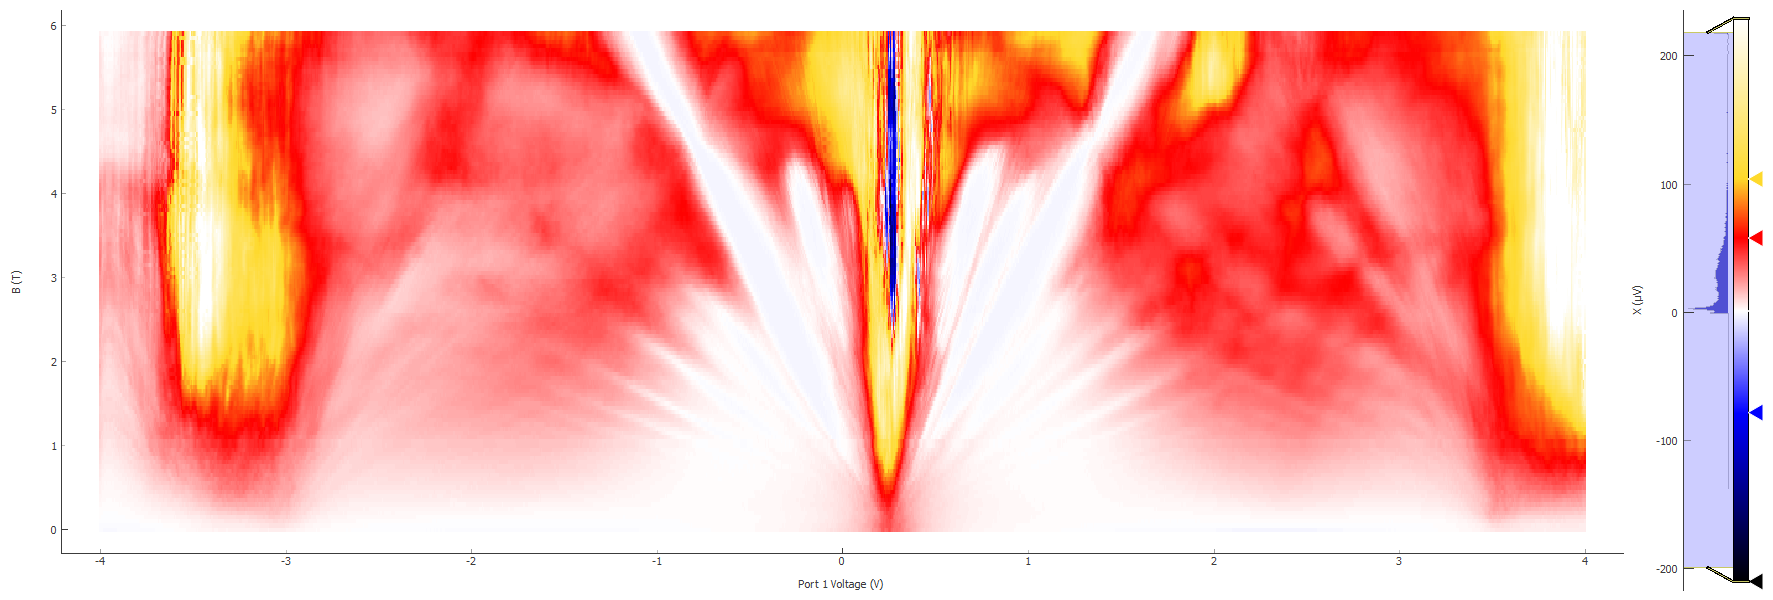

In [80]:
plot10[3]

<IPython.core.display.Javascript object>


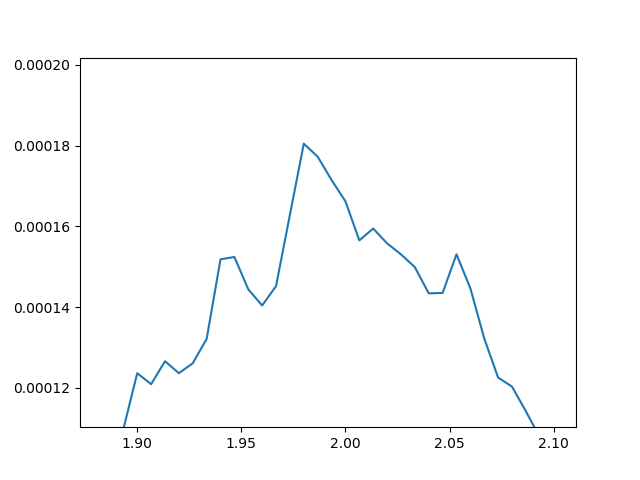

In [201]:
plt.figure() #1.98V is where we see the peak as the magnetic field increases in the 16-21 contact pair
plt.plot(data10.srframe_volt_p1_set[0, :], data10.lockin830_R[10, :])

In [81]:
triton.magnet_swh(0)

Wait 5 min for the switch to cool


In [82]:
time.sleep(1000)

In [83]:
gvals = np.linspace(-4, 4, 1201)
bvals = np.linspace(0, -1, 11)
data11, plot11 = npd.twod_param_sweep(triton.field_set_stable, bvals, srframe.volt_p1, gvals, lockin865.X, lockin865.Y, lockin865.R, lockin830.X, lockin830.Y, lockin830.R, SetDelay1=12, SetDelay2=1, DataName='M20_14_15_865and16_45_830_0Tto-1T_3nA_13.33Hz')
srframe.volt_p5(0)
srframe.volt_p1(0)

Started at 2019-12-02 08:03:03
Please wait 10.024 seconds for the field sweep, plus the time required for operating the switch...
Please wait 50.001999999999995 seconds for the field sweep, plus the time required for operating the switch...
Please wait 50.001999999999995 seconds for the field sweep, plus the time required for operating the switch...
Please wait 50.001999999999995 seconds for the field sweep, plus the time required for operating the switch...
Please wait 50.001999999999995 seconds for the field sweep, plus the time required for operating the switch...
Please wait 50.001999999999995 seconds for the field sweep, plus the time required for operating the switch...
Please wait 50.001999999999995 seconds for the field sweep, plus the time required for operating the switch...
Please wait 50.001999999999995 seconds for the field sweep, plus the time required for operating the switch...
Please wait 50.001999999999995 seconds for the field sweep, plus the time required for operat

In [84]:
triton.field(0)
triton.magnet_swh(0)

Sweep time approximately 410.00199999999995 seconds
Wait 5 min for the switch to cool


In [85]:
lockin865.amplitude(0.01)
srframe.volt_p1(-5)
time.sleep(15)
gvals = np.linspace(-5, 5, 401)
data12, plot12 = npd.single_param_sweep(srframe.volt_p1, gvals, 1.1, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, DataName='M20_14-15_865_21-16_830_baseT_disconnected_0.1nA_-0.8mT')
srframe.volt_p1(0)

Started at 2019-12-02 13:48:04
DataSet:
   location = 'data/2019-12-02/#002_M20_14-15_865_21-16_830_baseT_disconnected_0.1nA_-0.8mT_13-48-02'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (401,)
   Measured | lockin865_X         | X            | (401,)
   Measured | lockin865_Y         | Y            | (401,)
   Measured | lockin830_X         | X            | (401,)
   Measured | lockin830_Y         | Y            | (401,)
Finished at 2019-12-02 13:56:40


<IPython.core.display.Javascript object>


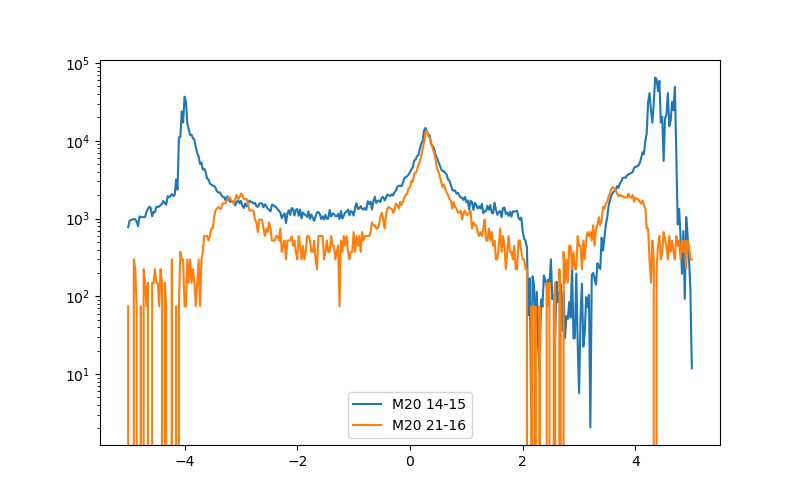

In [86]:
plt.figure(figsize=(8, 5))
plt.semilogy(gvals, np.abs(data12.lockin865_X[:]/0.1e-9), label='M20 14-15')
plt.semilogy(gvals, np.abs(data12.lockin830_X[:]/0.1e-9), label='M20 21-16')
plt.legend()

# 0.3 na excitation for the dv_di

In [87]:
offvals = np.linspace(4000e-3, -4000e-3, 201)
gvals = np.linspace(1.9, 3.6, 35)
data13, plot13 = npd.twod_param_sweep(srframe.volt_p1, gvals, srframe.volt_p5, offvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, SetDelay1=6, SetDelay2=1.1, DataName='M20_14-15_865_21-16_830_vbgsweep_AC0.3nAdvdi_baseT_b=-0.8mT')

Started at 2019-12-02 14:14:56
DataSet:
   location = 'data/2019-12-02/#003_M20_14-15_865_21-16_830_vbgsweep_AC0.3nAdvdi_baseT_b=-0.8mT_14-14-54'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (35,)
   Setpoint | srframe_volt_p5_set | volt_p5      | (35, 201)
   Measured | lockin865_X         | X            | (35, 201)
   Measured | lockin865_Y         | Y            | (35, 201)
   Measured | lockin830_X         | X            | (35, 201)
   Measured | lockin830_Y         | Y            | (35, 201)
Finished at 2019-12-02 16:48:35


In [88]:
srframe.volt_p1(0)
srframe.volt_p5(0)

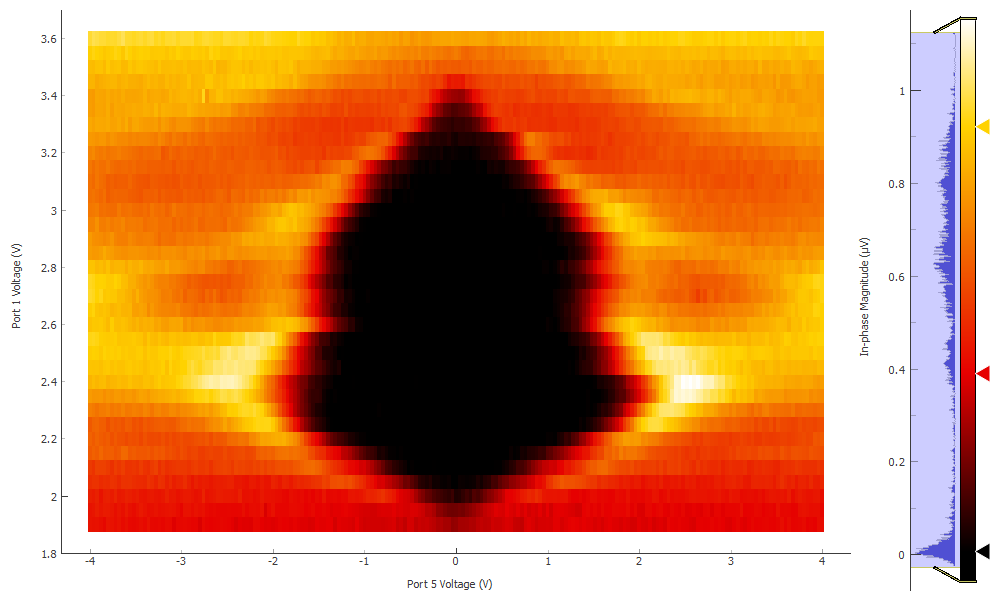

In [89]:
plot13[0]

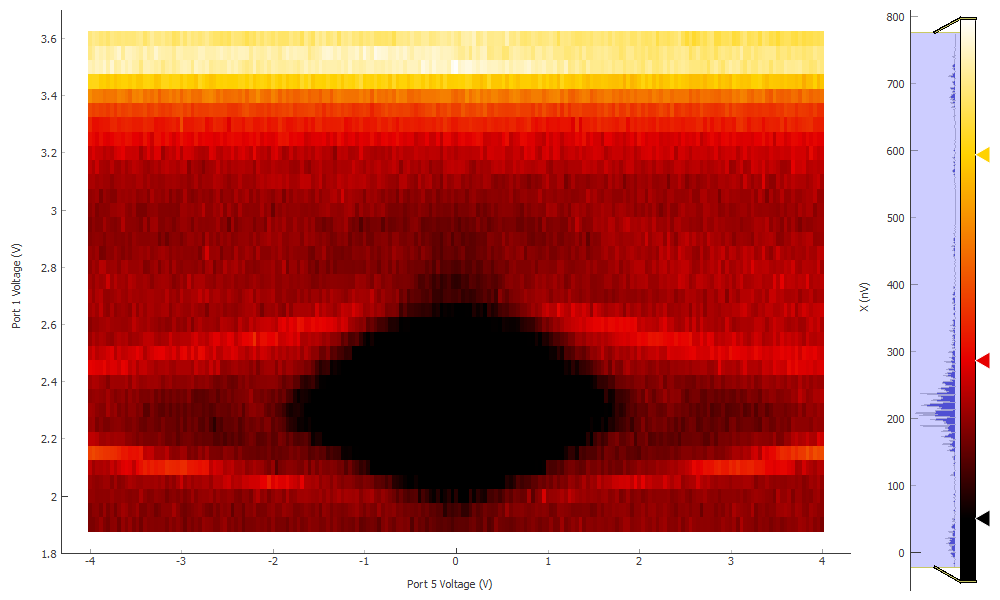

In [90]:
plot13[2]

# 0.5 nA excitation for Fraunhofer

In [91]:
lockin865.amplitude(0.05)
srframe.volt_p1(2.3)
offvals = np.linspace(3000e-3, -3000e-3, 121)
bvals = np.linspace(0.05, -0.05, 101)
data14, plot14 = npd.twod_param_sweep(triton.field_set_stable, bvals, srframe.volt_p5, offvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, SetDelay1=8, SetDelay2=1, DataName='M20_14-15_865_21-16_830_Bsweep_vbg=2.3V_AC0.5nAdvdi_baseT')
srframe.volt_p5(0)
srframe.volt_p1(0)

Started at 2019-12-02 16:48:58
Please wait 30.34 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.402 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.402 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.402 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.396 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.402 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.402 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.396 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.402 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.402 seconds for the field sweep, plus the time required for oper

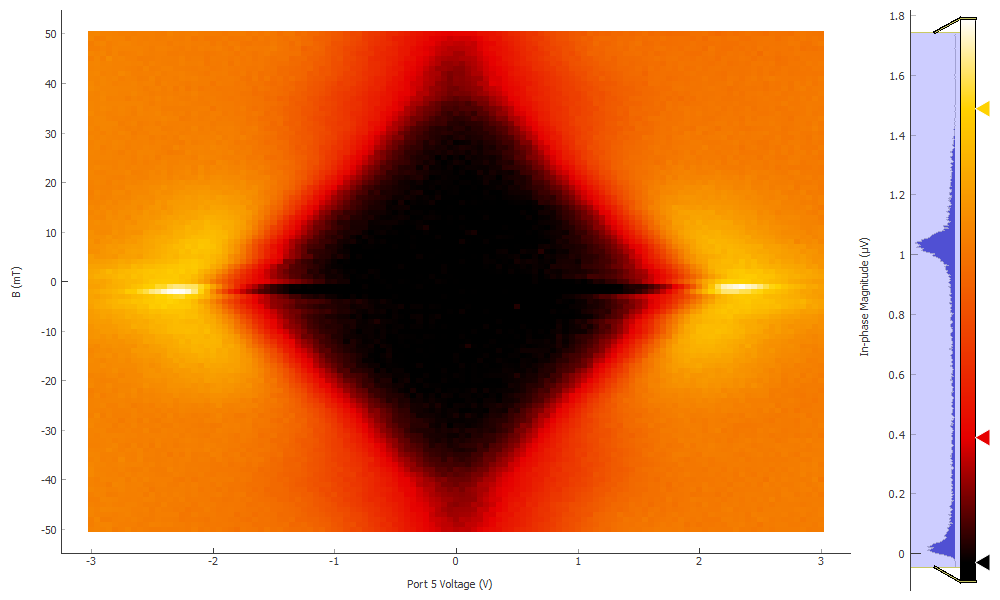

In [92]:
plot14[0]

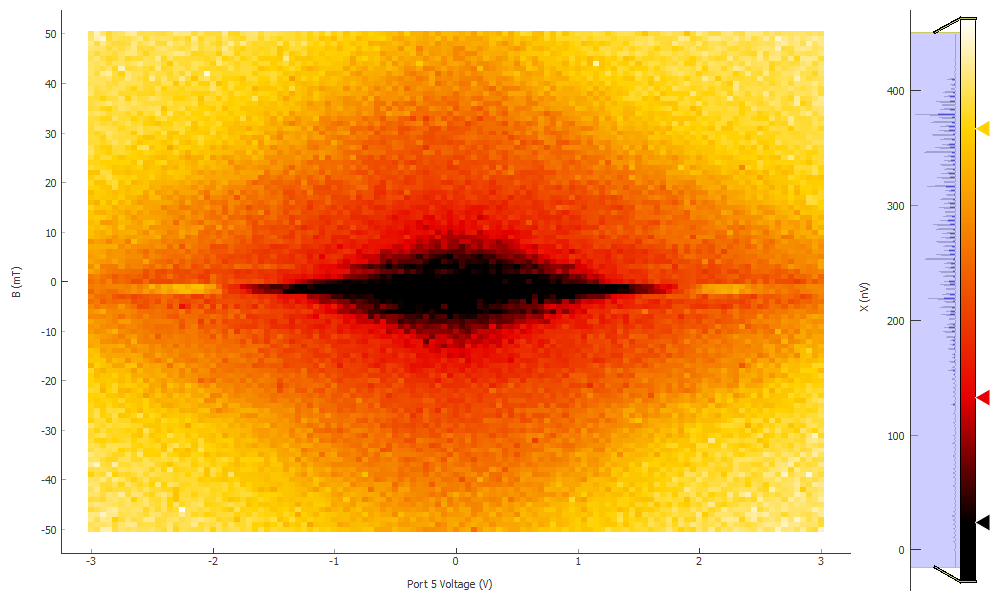

In [93]:
plot14[2]

# 0.4 nA excitation for Temperature sweeps

In [94]:
lockin865.amplitude(0.04)

In [112]:
triton.magnet_swh(0)

Wait 5 min for the switch to cool


In [97]:
triton.field(-0.0008)

Sweep time approximately 29.716 seconds


In [114]:
triton.field()

-0.000781

In [120]:
srframe.volt_p1(-4.5)

In [121]:
gvals = np.linspace(-4.5, 4.5, 451)  # temperature cables disconnected
data15, plot15 = npd.single_param_sweep(srframe.volt_p1, gvals, 1.3, lockin865.X, lockin865.Y, lockin865.R, lockin830.X, lockin830.Y, lockin830.R, DataName='M20_14-15_865_21-16_830_T-gatesweep_basetemp_0.4nA', YParam=[lockin865.X, lockin865.R, lockin830.X, lockin830.R])

Started at 2019-12-02 22:28:39
DataSet:
   location = 'data/2019-12-02/#006_M20_14-15_865_21-16_830_T-gatesweep_basetemp_0.4nA_22-28-37'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (451,)
   Measured | lockin865_X         | X            | (451,)
   Measured | lockin865_Y         | Y            | (451,)
   Measured | lockin865_R         | R            | (451,)
   Measured | lockin830_X         | X            | (451,)
   Measured | lockin830_Y         | Y            | (451,)
   Measured | lockin830_R         | R            | (451,)
Finished at 2019-12-02 22:40:01


In [124]:
gvals = np.linspace(4.5, 4.7, 11)  # temperature cables disconnected
data15_b, plot15_b = npd.single_param_sweep(srframe.volt_p1, gvals, 1.3, lockin865.X, lockin865.Y, lockin865.R, lockin830.X, lockin830.Y, lockin830.R, DataName='M20_14-15_865_21-16_830_T-gatesweep_basetemp_0.4nA', YParam=[lockin865.X, lockin865.R, lockin830.X, lockin830.R])

Started at 2019-12-02 22:44:03
DataSet:
   location = 'data/2019-12-02/#007_M20_14-15_865_21-16_830_T-gatesweep_basetemp_0.4nA_22-44-02'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (11,)
   Measured | lockin865_X         | X            | (11,)
   Measured | lockin865_Y         | Y            | (11,)
   Measured | lockin865_R         | R            | (11,)
   Measured | lockin830_X         | X            | (11,)
   Measured | lockin830_Y         | Y            | (11,)
   Measured | lockin830_R         | R            | (11,)
Finished at 2019-12-02 22:44:20


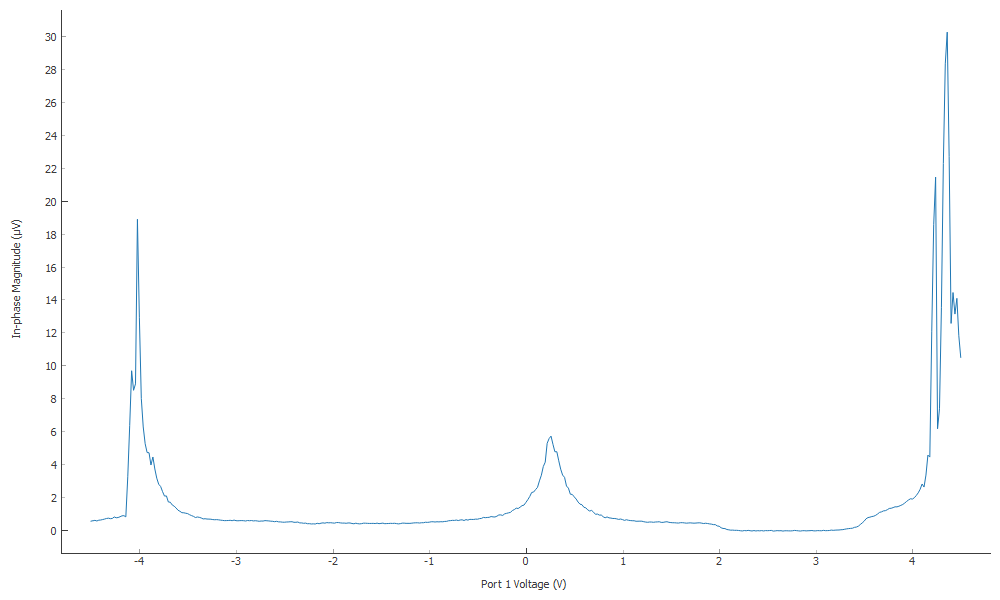

In [138]:
plot15[0]

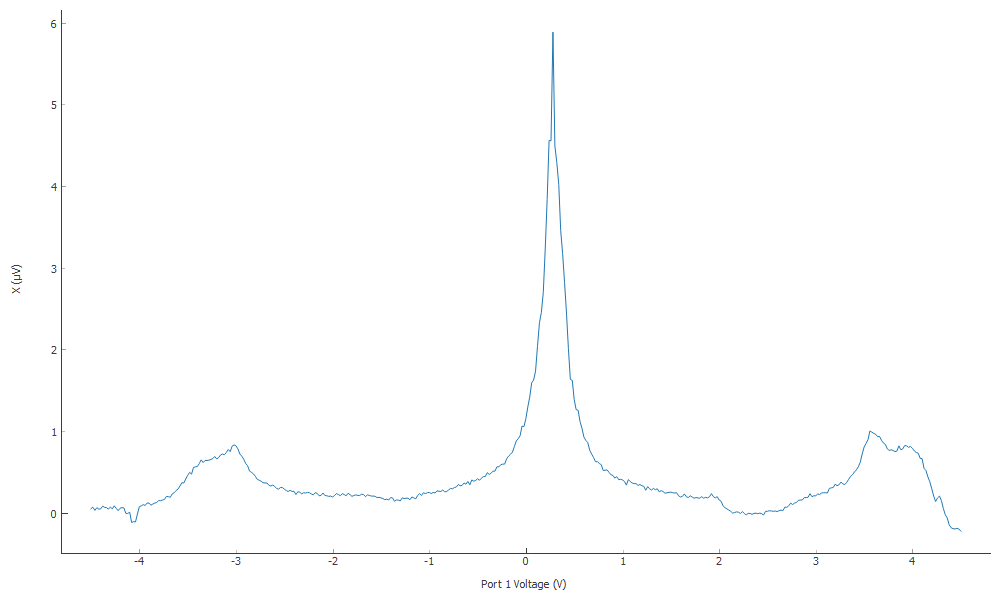

In [139]:
plot15[2]

In [125]:
srframe.volt_p1(0) # can you do -4.5 to +4.5? Maybe we need the energy gap of the full filling. Ok, I'll take -4.5 to 4.5

In [126]:
triton.pid_setpoint(0.05)
triton.pid_mode(1)

In [127]:
triton.pid_range(10)

In [128]:
gvals = np.linspace(-4.5, 4.7, 461)
Tvals = np.linspace(0.05, 1, 20)
data16, plot16 = npd.twod_param_sweep(triton.pid_setpoint, Tvals, srframe.volt_p1, gvals, lockin865.X, lockin865.Y, lockin865.R, lockin830.X, lockin830.Y, lockin830.R, SetDelay1=180, SetDelay2=1.3, Param2_SetBetween=0, DataName='M20_14-15_865_21-16_830_T-gatesweep_0p5to1K_0.4nA', ZParam=[lockin865.X, lockin830.X, lockin865.R, lockin830.R])

Started at 2019-12-02 22:56:15
DataSet:
   location = 'data/2019-12-02/#008_M20_14-15_865_21-16_830_T-gatesweep_0p5to1K_0.4nA_22-56-13'
   <Type>   | <array_id>              | <array.name> | <array.shape>
   Setpoint | triton_pid_setpoint_set | pid_setpoint | (20,)
   Setpoint | srframe_volt_p1_set     | volt_p1      | (20, 461)
   Measured | lockin865_X             | X            | (20, 461)
   Measured | lockin865_Y             | Y            | (20, 461)
   Measured | lockin865_R             | R            | (20, 461)
   Measured | lockin830_X             | X            | (20, 461)
   Measured | lockin830_Y             | Y            | (20, 461)
   Measured | lockin830_R             | R            | (20, 461)
Finished at 2019-12-03 03:42:34


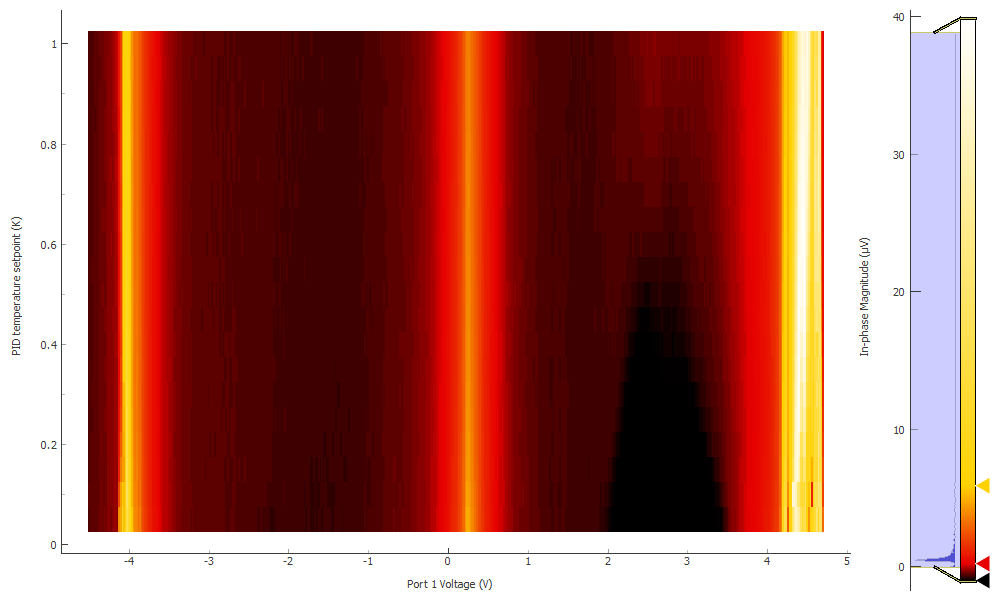

In [140]:
plot16[0]

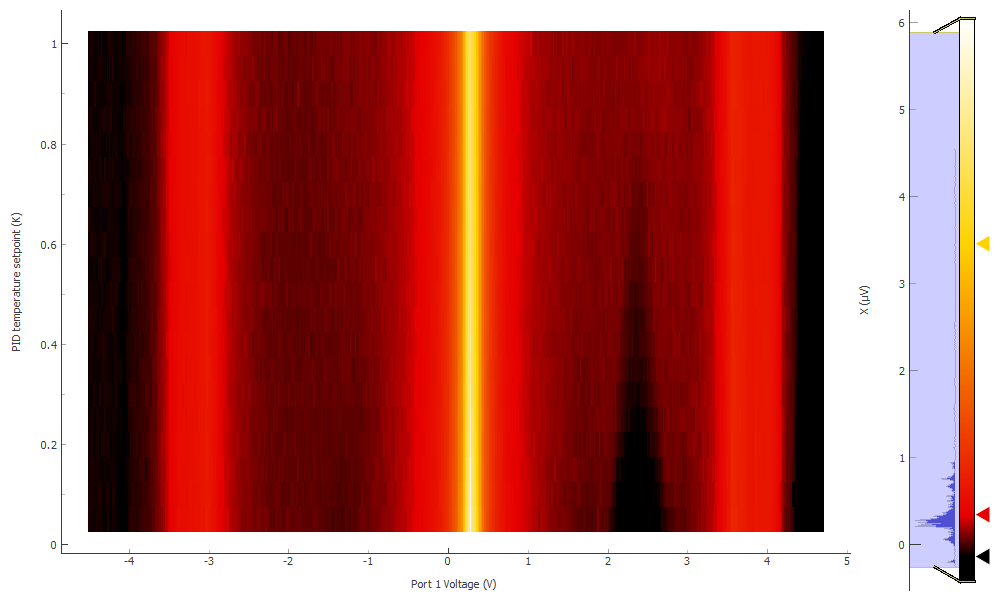

In [144]:
plot16[1]

In [129]:
triton.pid_range(31.6)
time.sleep(6)

In [130]:
gvals = np.linspace(-4.5, 4.7, 461)
Tvals = np.linspace(1.05, 1.4, 8)
data17, plot17 = npd.twod_param_sweep(triton.pid_setpoint, Tvals, srframe.volt_p1, gvals, lockin865.X, lockin865.Y, lockin865.R, lockin830.X, lockin830.Y, lockin830.R, SetDelay1=180, SetDelay2=1.3, Param2_SetBetween=0, DataName='M20_14-15_865_21-16_830_T-gatesweep_1p05to1p4K_0.4nA', ZParam=[lockin865.X, lockin830.X, lockin865.R, lockin830.R])

Started at 2019-12-03 03:42:43
DataSet:
   location = 'data/2019-12-03/#001_M20_14-15_865_21-16_830_T-gatesweep_1p05to1p4K_0.4nA_03-42-41'
   <Type>   | <array_id>              | <array.name> | <array.shape>
   Setpoint | triton_pid_setpoint_set | pid_setpoint | (8,)
   Setpoint | srframe_volt_p1_set     | volt_p1      | (8, 461)
   Measured | lockin865_X             | X            | (8, 461)
   Measured | lockin865_Y             | Y            | (8, 461)
   Measured | lockin865_R             | R            | (8, 461)
   Measured | lockin830_X             | X            | (8, 461)
   Measured | lockin830_Y             | Y            | (8, 461)
   Measured | lockin830_R             | R            | (8, 461)
Finished at 2019-12-03 05:37:13


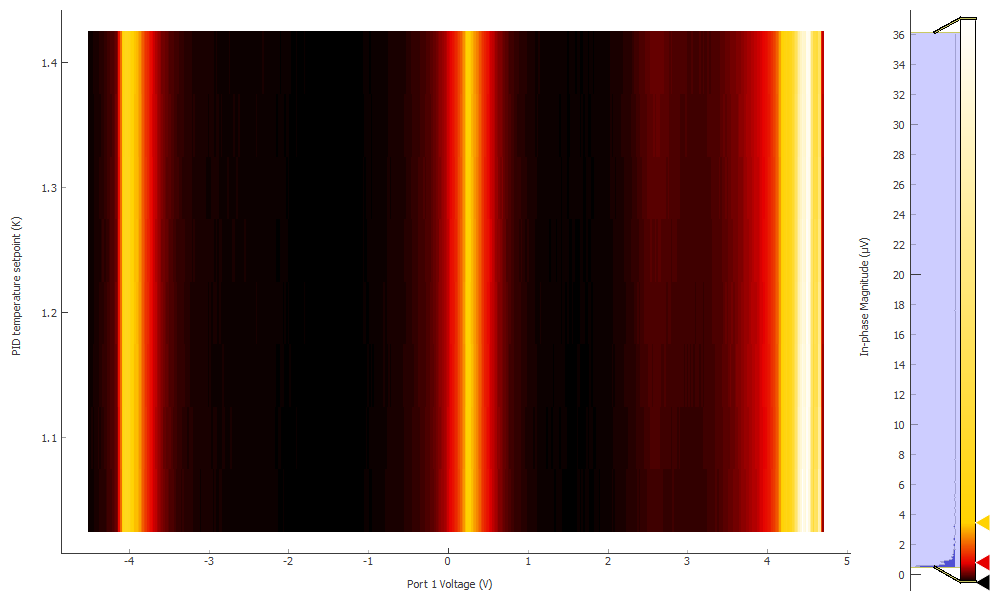

In [147]:
plot17[0]

In [131]:
triton.pid_range(100)
time.sleep(6)

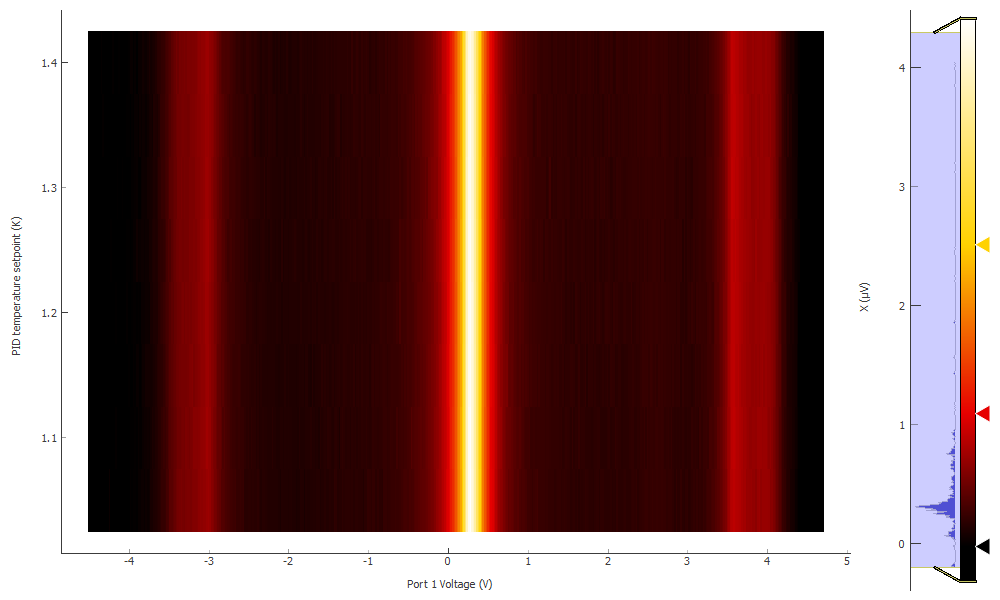

In [149]:
plot17[1]

In [132]:
gvals = np.linspace(-4.5, 4.7, 461)
Tvals = np.linspace(1.45, 2, 12)
data18, plot18 = npd.twod_param_sweep(triton.pid_setpoint, Tvals, srframe.volt_p1, gvals, lockin865.X, lockin865.Y, lockin865.R, lockin830.X, lockin830.Y, lockin830.R, SetDelay1=180, SetDelay2=1.3, Param2_SetBetween=0, DataName='M20_14-15_865_21-16_830_T-gatesweep_1p45to2K_0.4nA', ZParam=[lockin865.X, lockin830.X, lockin865.R, lockin830.R])

Started at 2019-12-03 05:37:22
DataSet:
   location = 'data/2019-12-03/#002_M20_14-15_865_21-16_830_T-gatesweep_1p45to2K_0.4nA_05-37-20'
   <Type>   | <array_id>              | <array.name> | <array.shape>
   Setpoint | triton_pid_setpoint_set | pid_setpoint | (12,)
   Setpoint | srframe_volt_p1_set     | volt_p1      | (12, 461)
   Measured | lockin865_X             | X            | (12, 461)
   Measured | lockin865_Y             | Y            | (12, 461)
   Measured | lockin865_R             | R            | (12, 461)
   Measured | lockin830_X             | X            | (12, 461)
   Measured | lockin830_Y             | Y            | (12, 461)
   Measured | lockin830_R             | R            | (12, 461)
Finished at 2019-12-03 08:29:02


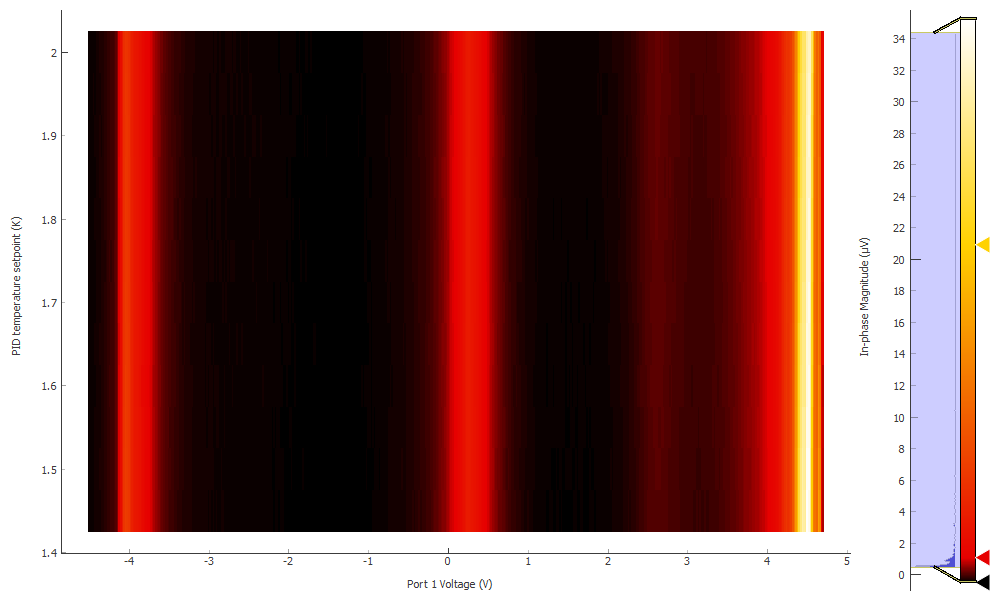

In [151]:
plot18[0]

In [133]:
triton.pid_mode(1)

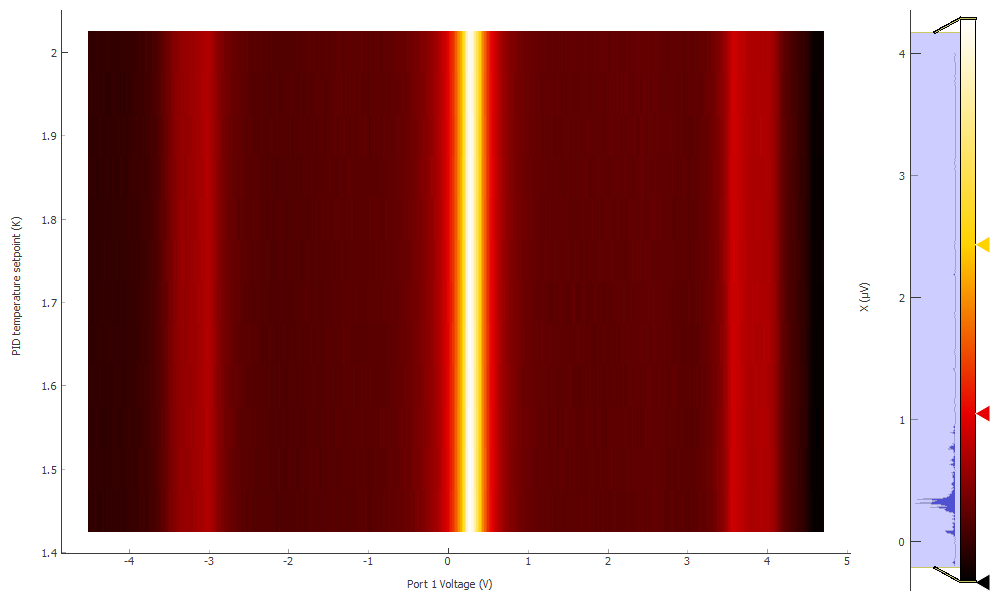

In [152]:
plot18[1]

In [134]:
triton.pid_range(100)

In [135]:
triton.pid_setpoint(2)

In [136]:
gvals = np.linspace(-4.5, 4.7, 461)
Tvals = np.linspace(2.1, 10, 81)
data19, plot19 = npd.twod_param_sweep(triton.pid_setpoint, Tvals, srframe.volt_p1, gvals, lockin865.X, lockin865.Y, lockin865.R, lockin830.X, lockin830.Y, lockin830.R, SetDelay1=180, SetDelay2=1.3, Param2_SetBetween=0, DataName='M20_14-15_865_21-16_830_T-gatesweep_2.1to10K_0.4nA', ZParam=[lockin865.X, lockin830.X, lockin865.R, lockin830.R])

Started at 2019-12-03 09:06:38
DataSet:
   location = 'data/2019-12-03/#003_M20_14-15_865_21-16_830_T-gatesweep_2.1to10K_0.4nA_09-06-36'
   <Type>   | <array_id>              | <array.name> | <array.shape>
   Setpoint | triton_pid_setpoint_set | pid_setpoint | (81,)
   Setpoint | srframe_volt_p1_set     | volt_p1      | (81, 461)
   Measured | lockin865_X             | X            | (81, 461)
   Measured | lockin865_Y             | Y            | (81, 461)
   Measured | lockin865_R             | R            | (81, 461)
   Measured | lockin830_X             | X            | (81, 461)
   Measured | lockin830_Y             | Y            | (81, 461)
   Measured | lockin830_R             | R            | (81, 461)
Finished at 2019-12-04 04:26:33


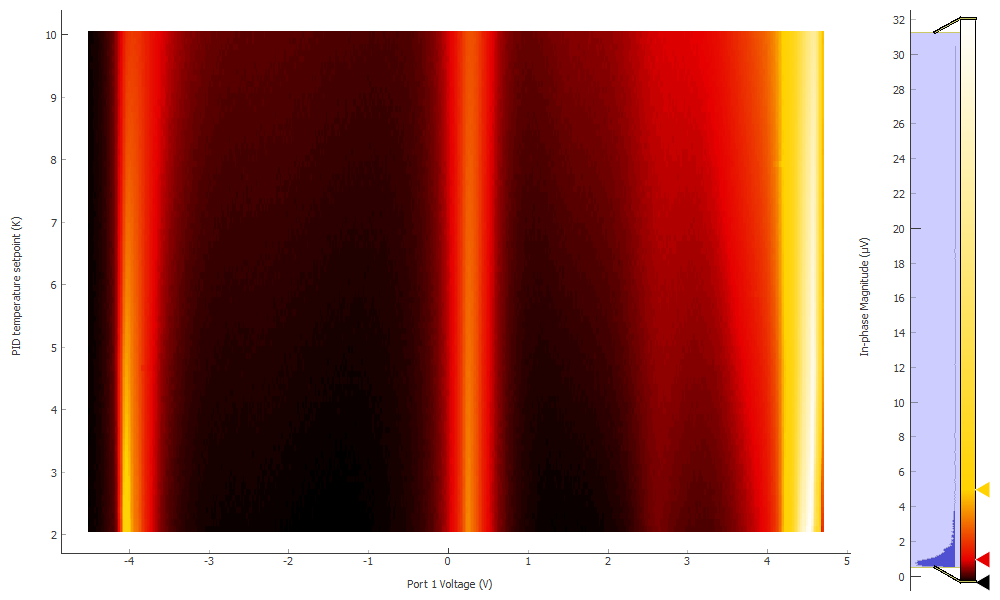

In [153]:
plot19[0]

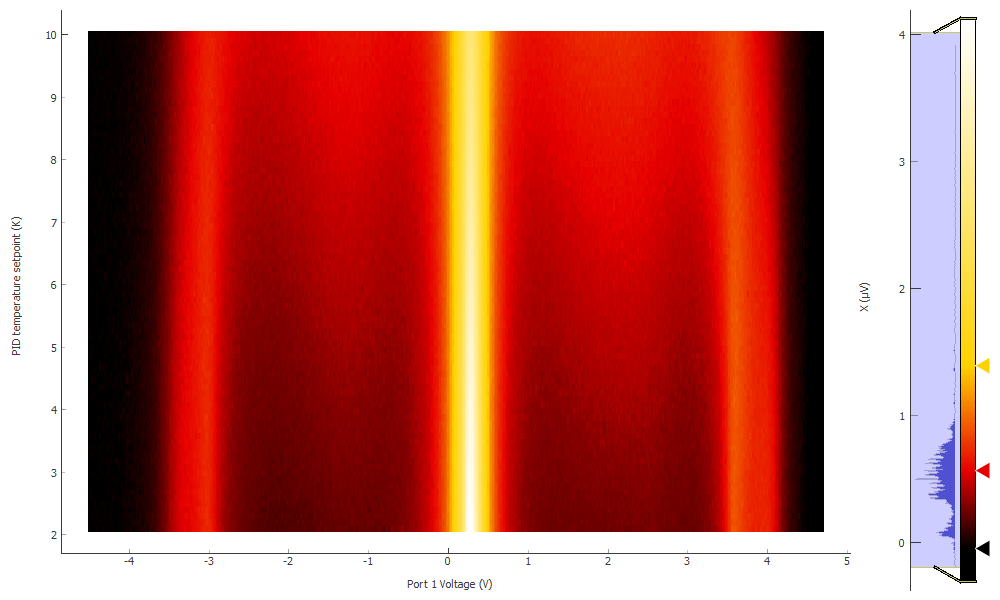

In [154]:
plot19[1]

In [158]:
lockin865.amplitude(0.05)
srframe.volt_p1(2.3)
offvals = np.linspace(2500e-3, -2500e-3, 101)
bvals = np.linspace(0.015, -0.020, 141)
data20, plot20 = npd.twod_param_sweep(triton.field_set_stable, bvals, srframe.volt_p5, offvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, SetDelay1=12, SetDelay2=3, DataName='M20_21-16_865_16-15_830_Bsweep_vbg=2.3V_AC0.5nAdvdi_baseT')
srframe.volt_p5(0)
srframe.volt_p1(0)

Started at 2019-12-04 17:26:02
Please wait 10.006 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.072 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.072 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.066 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.078 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.078 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.078 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.072 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.072 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.06 seconds for the field sweep, plus the time required for oper

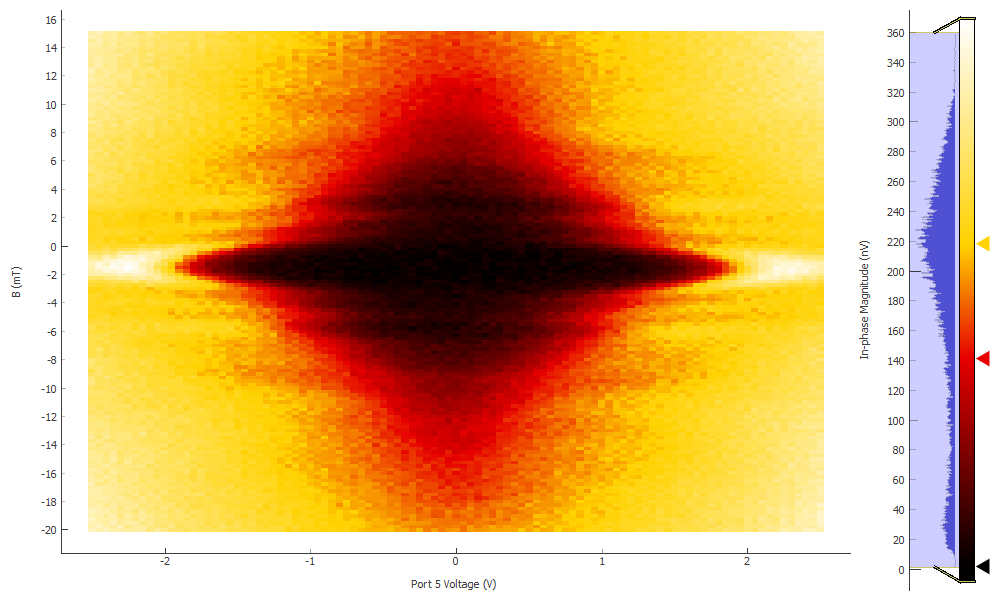

In [160]:
plot20[0]

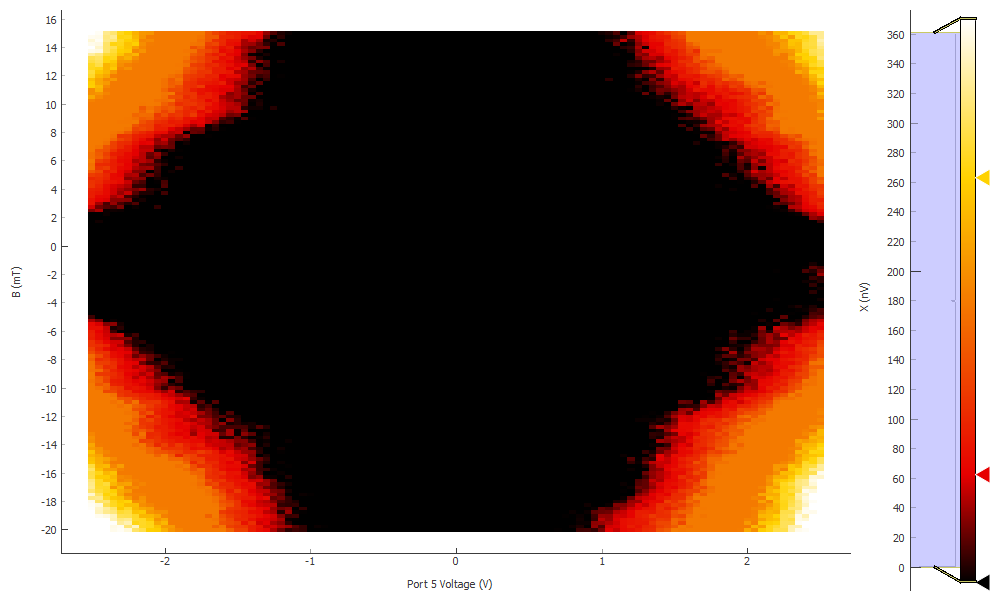

In [162]:
plot20[2]

In [159]:
srframe.volt_p1(2.3)
offvals = np.linspace(2000e-3, -2000e-3, 81)
bvals = np.linspace(0.045, 0.025, 61)
data21, plot21 = npd.twod_param_sweep(triton.field_set_stable, bvals, srframe.volt_p5, offvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, SetDelay1=12, SetDelay2=3, DataName='M20_21-16_865_16-15_830_Bsweep_vbg=2.3V_AC0.5nAdvdi_baseT_zoomin35mT')
srframe.volt_p5(0)
srframe.volt_p1(0)

Started at 2019-12-05 07:40:35
Please wait 29.032 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.096 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.102 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.102 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.102 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.108 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.096 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.096 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.096 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.102 seconds for the field sweep, plus the time required for ope

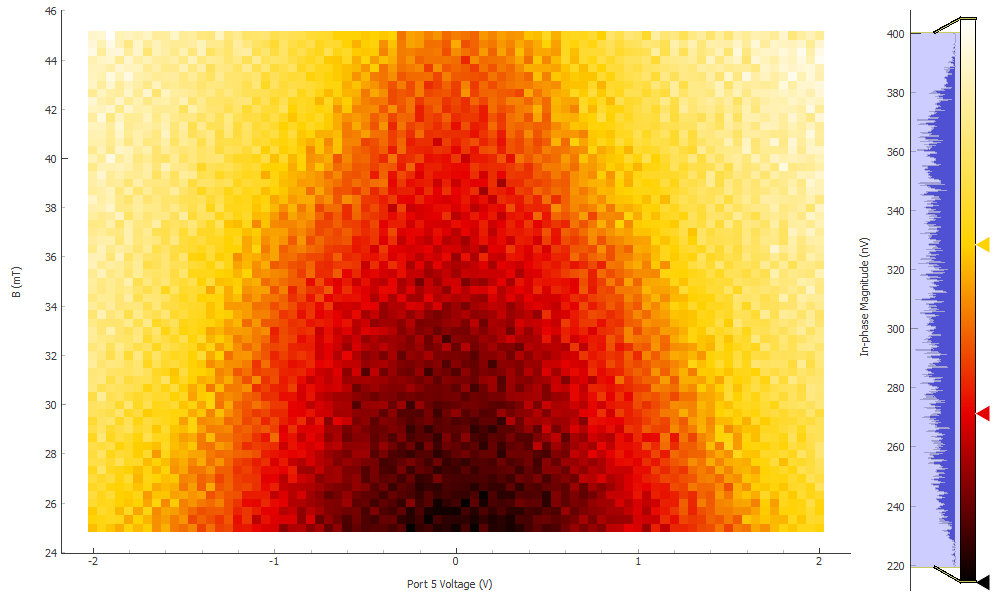

In [163]:
plot21[0]

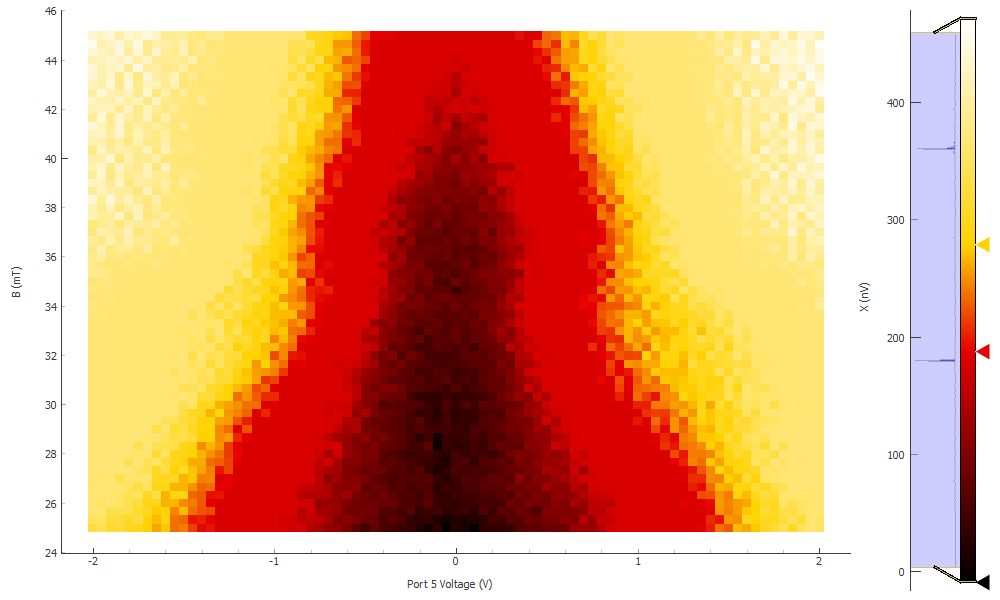

In [164]:
plot21[2]

In [165]:
srframe.volt_p1(-4.5)
time.sleep(15)
gvals = np.linspace(-4.5, 4.7, 369)
data22, plot22 = npd.single_param_sweep(srframe.volt_p1, gvals, 3, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, DataName='M20_21-45_865_16-47_830_baseT_disconnected_1nA_6T')
srframe.volt_p1(0)

Started at 2019-12-05 13:17:12
DataSet:
   location = 'data/2019-12-05/#002_M20_21-45_865_16-47_830_baseT_disconnected_1nA_6T_13-17-10'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (369,)
   Measured | lockin865_X         | X            | (369,)
   Measured | lockin865_Y         | Y            | (369,)
   Measured | lockin830_X         | X            | (369,)
   Measured | lockin830_Y         | Y            | (369,)
Finished at 2019-12-05 13:36:47


<IPython.core.display.Javascript object>


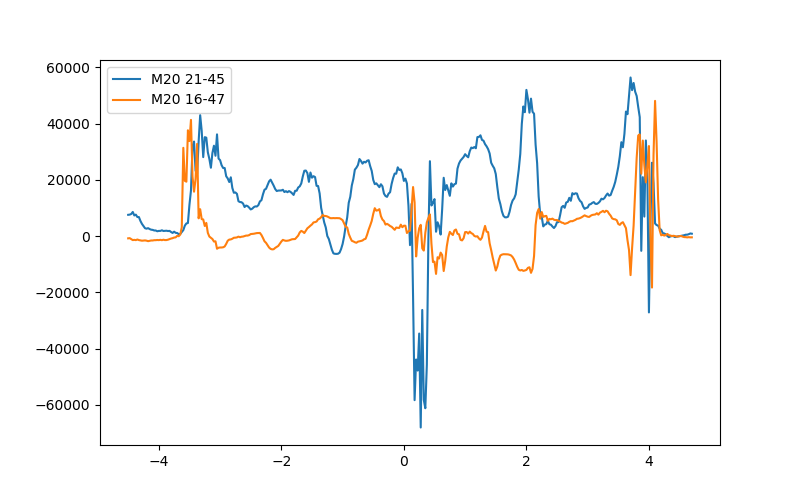

In [169]:
plt.figure(figsize=(8, 5))
plt.plot(gvals, (data22.lockin865_X[:]/1e-9), label='M20 21-45')
plt.plot(gvals, (data22.lockin830_X[:]/1e-9), label='M20 16-47')
plt.legend()

In [174]:
srframe.volt_p1(-3)
time.sleep(15)
gvals = np.linspace(-3, 3, 451)
data23, plot23 = npd.single_param_sweep(srframe.volt_p1, gvals, 3, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, DataName='M20_21-45_865_16-47_830_baseT_disconnected_1nA_3.5T')
srframe.volt_p1(0)
plt.figure(figsize=(8, 5))
plt.semilogy(gvals, np.abs(data23.lockin865_X[:]/1e-9), label='M20 21-45')
plt.semilogy(gvals, np.abs(data23.lockin830_X[:]/1e-9), label='M20 16-47')
plt.legend()

KeyboardInterrupt: 

In [183]:
srframe.volt_p1(1.94)

<IPython.core.display.Javascript object>


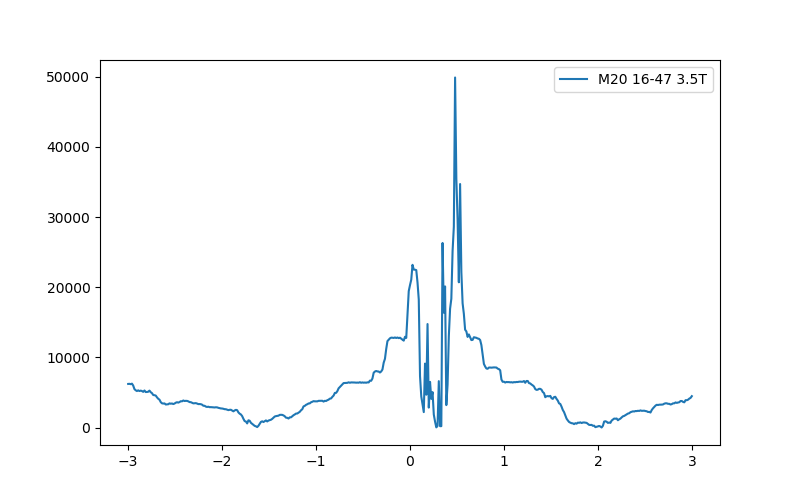

In [181]:
plt.figure(figsize=(8, 5))
#plt.semilogy(gvals, np.abs(data23.lockin865_X[:]/1e-9), label='M20 21-45')
plt.plot(gvals, np.abs(data23.lockin830_X[:]/1e-9), label='M20 16-47 3.5T')
#plt.semilogy(gvals, np.abs(data22.lockin830_X[:]/1e-9), label='M20 16-47 6T')
plt.legend()

In [184]:
bvals = np.linspace(5.15, 5.95, 81)
data24, plot24 = npd.single_param_sweep(triton.field_set_stable, bvals, 1, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, DataName='M20_21-45_865_16-47_830_baseT_disconnected_0.5nA_5.15Tto5.95Tup')

Started at 2019-12-05 15:31:02
Please wait 10.006 seconds for the field sweep, plus the time required for operating the switch...
Please wait 13.996 seconds for the field sweep, plus the time required for operating the switch...
Please wait 14.001999999999999 seconds for the field sweep, plus the time required for operating the switch...
Please wait 14.001999999999999 seconds for the field sweep, plus the time required for operating the switch...
Please wait 13.99 seconds for the field sweep, plus the time required for operating the switch...
Please wait 13.996 seconds for the field sweep, plus the time required for operating the switch...
Please wait 14.001999999999999 seconds for the field sweep, plus the time required for operating the switch...
Please wait 14.001999999999999 seconds for the field sweep, plus the time required for operating the switch...
Please wait 14.001999999999999 seconds for the field sweep, plus the time required for operating the switch...
Please wait 13.996 

<IPython.core.display.Javascript object>


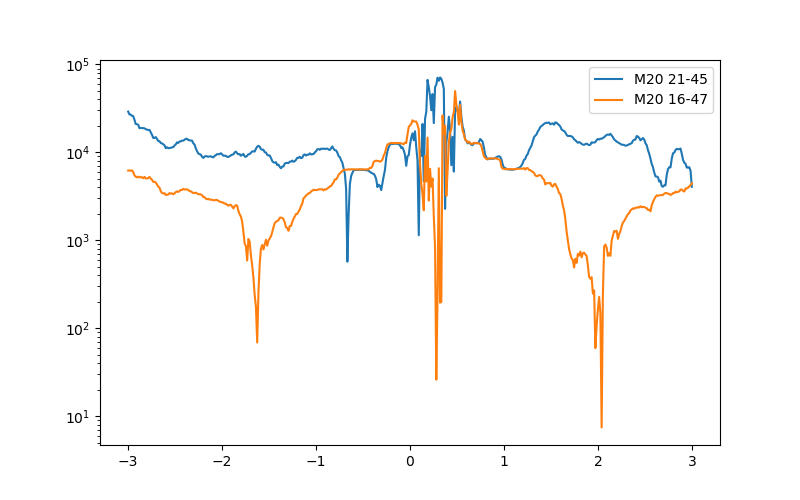

In [206]:
plt.figure(figsize=(8, 5))
plt.semilogy(gvals, np.abs(data23.lockin865_X[:]/1e-9), label='M20 21-45')
plt.semilogy(gvals, np.abs(data23.lockin830_X[:]/1e-9), label='M20 16-47')
plt.legend()

In [187]:
triton.field()

5.600048

In [188]:
triton.field()

5.600048

In [189]:
triton.magnet_POC()

1

In [190]:
triton.magnet_swh()

0

In [191]:
triton.magnet_POC(0)

In [202]:
triton.magnet_swh(1)

Wait 5 min for the switch to warm


In [203]:
triton.magnet_sweeprate()

0.15

In [204]:
srframe.volt_p1(1.98) # go to where the peak happens at high magnetic fields

In [207]:
triton.magnet_sweeprate(0.15)
triton.field_set_stable(6.5)  # start at a high field and go down
triton.magnet_POC(1)

Please wait 369.976 seconds for the field sweep, plus the time required for operating the switch...


In [210]:
lockin830.sensitivity(50e-6

In [211]:
triton.magnet_sweeprate(0.1)  # come back to this same spot later and do an Rxx measurement. 0.5nA amplitude (actually 21-45 on 865, 47-16 on 830)
triton.field(4.5)
data25, plot25 = npd.data_log(1, triton.field, lockin865.X, lockin865.Y, lockin865.R, lockin830.X, lockin830.Y, lockin830.R, breakif=npd.breakat(triton.field, 4.5, 0.01, 20), minutes=24, DataName='M20_865_21-45_830_16-45_Rxy_fieldsweepdown_1p98vbg', XParam=triton.field, YParam=[lockin865.R, lockin830.R])

Sweep time approximately 1210.0 seconds
Started at 2019-12-05 19:08:07
DataSet:
   location = 'data/2019-12-05/#005_M20_865_21-45_830_16-45_Rxy_fieldsweepdown_1p98vbg_19-08-06'
   <Type>   | <array_id>   | <array.name> | <array.shape>
   Setpoint | count_set    | count        | (1440,)
   Measured | time0        | time0        | (1440,)
   Measured | triton_field | field        | (1440,)
   Measured | lockin865_X  | X            | (1440,)
   Measured | lockin865_Y  | Y            | (1440,)
   Measured | lockin865_R  | R            | (1440,)
   Measured | lockin830_X  | X            | (1440,)
   Measured | lockin830_Y  | Y            | (1440,)
   Measured | lockin830_R  | R            | (1440,)
Finished at 2019-12-05 19:28:32


In [212]:
triton.magnet_swh(1)

Wait 5 min for the switch to warm


In [213]:
triton.magnet_sweeprate(0.1)  # come back to this same spot later and do an Rxx measurement. 0.5nA amplitude
triton.field(6.5)
data26, plot26 = npd.data_log(1, triton.field, lockin865.X, lockin865.Y, lockin865.R, lockin830.X, lockin830.Y, lockin830.R, breakif=npd.breakat(triton.field, 6.5, 0.01, 20), minutes=24, DataName='M20_865_21-45_830_16-45_Rxy_fieldsweepup_1p98vbg', XParam=triton.field, YParam=[lockin865.R, lockin830.R])

Sweep time approximately 1209.988 seconds
Started at 2019-12-05 19:43:20
DataSet:
   location = 'data/2019-12-05/#006_M20_865_21-45_830_16-45_Rxy_fieldsweepup_1p98vbg_19-43-19'
   <Type>   | <array_id>   | <array.name> | <array.shape>
   Setpoint | count_set    | count        | (1440,)
   Measured | time0        | time0        | (1440,)
   Measured | triton_field | field        | (1440,)
   Measured | lockin865_X  | X            | (1440,)
   Measured | lockin865_Y  | Y            | (1440,)
   Measured | lockin865_R  | R            | (1440,)
   Measured | lockin830_X  | X            | (1440,)
   Measured | lockin830_Y  | Y            | (1440,)
   Measured | lockin830_R  | R            | (1440,)
Finished at 2019-12-05 20:03:44


In [214]:
# change the lockin830 sensitivity back up to do the Rxy field sweep
lockin830.sensitivity(500e-6)

<IPython.core.display.Javascript object>


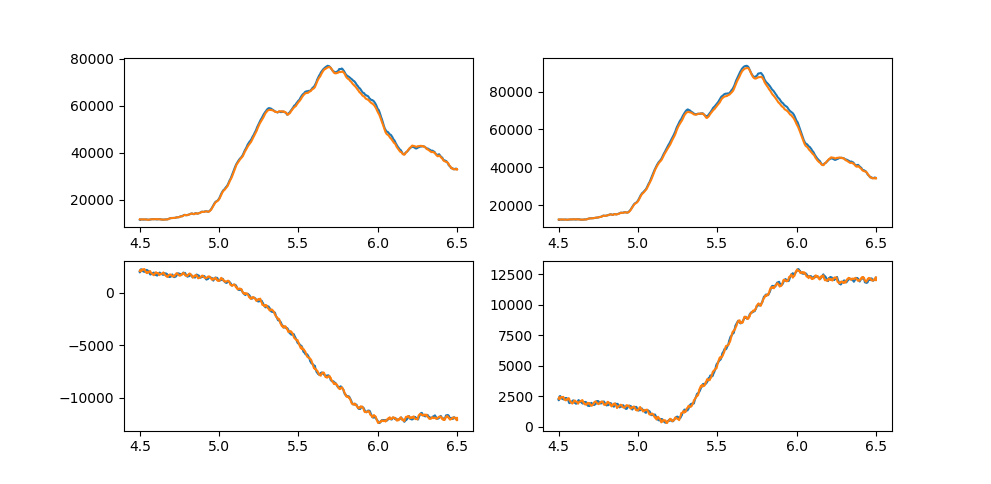

In [216]:
fig, ax = plt.subplots(2, 2)  # no clear hysteresis in X or in R, on either of the 2 pairs of contacts.
ax[0, 0].plot(data25.triton_field, data25.lockin865_X[:]/0.5e-9)
ax[0, 0].plot(data26.triton_field, data26.lockin865_X[:]/0.5e-9)
ax[1, 0].plot(data25.triton_field, data25.lockin830_X[:]/0.5e-9)
ax[1, 0].plot(data26.triton_field, data26.lockin830_X[:]/0.5e-9)
ax[0, 1].plot(data25.triton_field, data25.lockin865_R[:]/0.5e-9)
ax[0, 1].plot(data26.triton_field, data26.lockin865_R[:]/0.5e-9)
ax[1, 1].plot(data25.triton_field, data25.lockin830_R[:]/0.5e-9)
ax[1, 1].plot(data26.triton_field, data26.lockin830_R[:]/0.5e-9)

In [217]:
srframe.volt_p1(0)

In [218]:
bvals = np.linspace(7, 0, 141)
gvals = np.linspace(-4, 4, 401)
data27, plot27 = npd.twod_param_sweep(triton.field_set_stable, bvals, srframe.volt_p1, gvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, SetDelay1=10, SetDelay2=1.3, Param2_SetBetween=0, DataName='M20_865_21-45_830_16-45_Rxy_twodfan_0p5nA')

Started at 2019-12-05 22:32:12
Please wait 309.988 seconds for the field sweep, plus the time required for operating the switch...
Please wait 40.03 seconds for the field sweep, plus the time required for operating the switch...
Please wait 40.006 seconds for the field sweep, plus the time required for operating the switch...
Please wait 40.018 seconds for the field sweep, plus the time required for operating the switch...
Please wait 40.042 seconds for the field sweep, plus the time required for operating the switch...
Please wait 40.012 seconds for the field sweep, plus the time required for operating the switch...
Please wait 40.006 seconds for the field sweep, plus the time required for operating the switch...
Please wait 40.018 seconds for the field sweep, plus the time required for operating the switch...
Please wait 40.006 seconds for the field sweep, plus the time required for operating the switch...
Please wait 39.97 seconds for the field sweep, plus the time required for oper

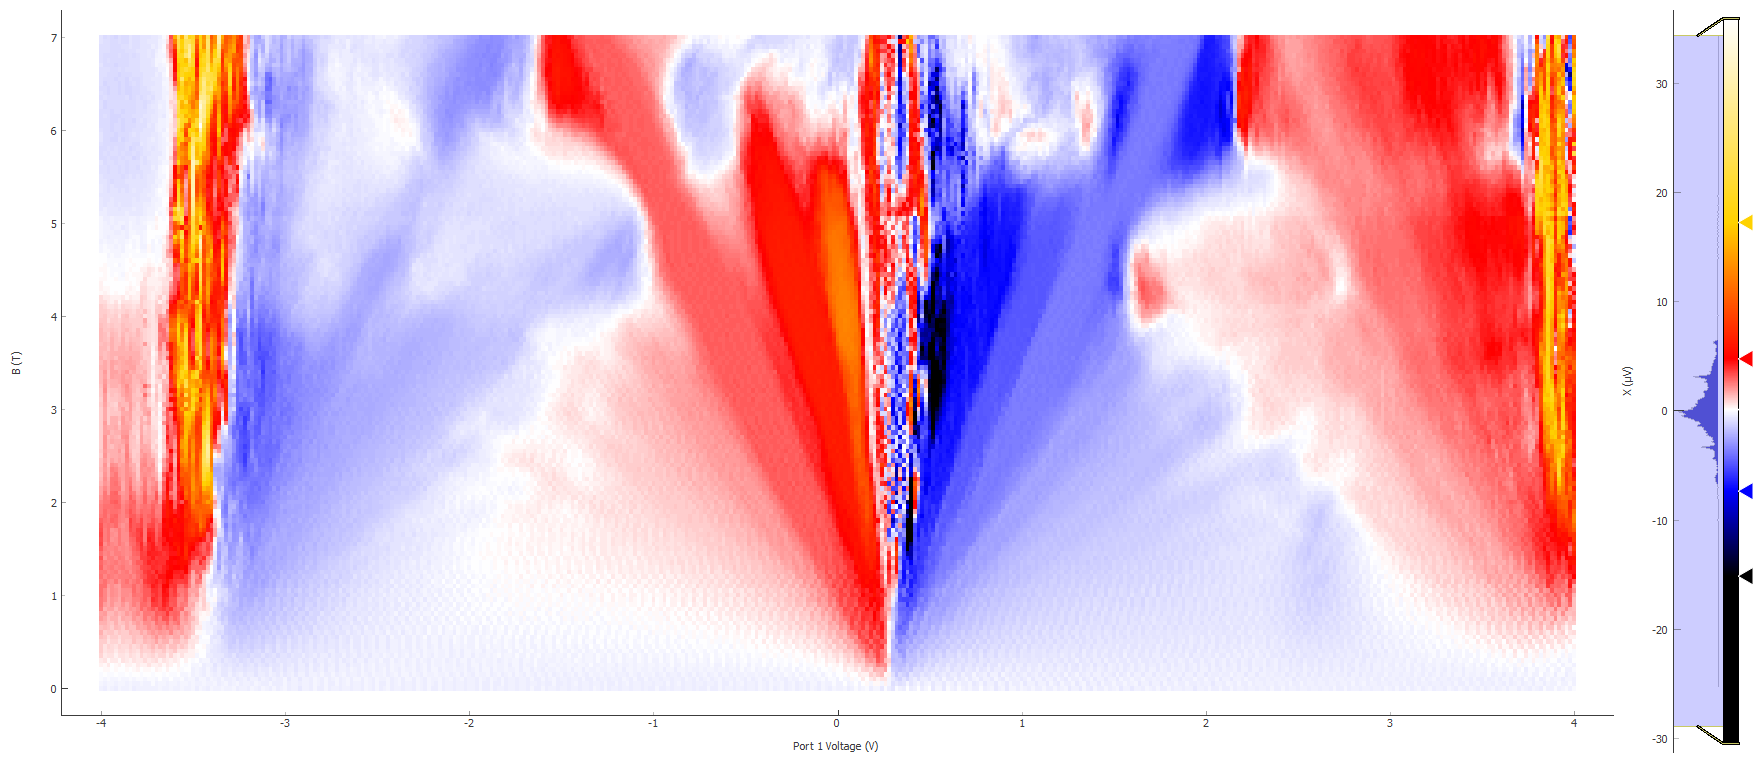

In [222]:
plot27[2] # 16-45


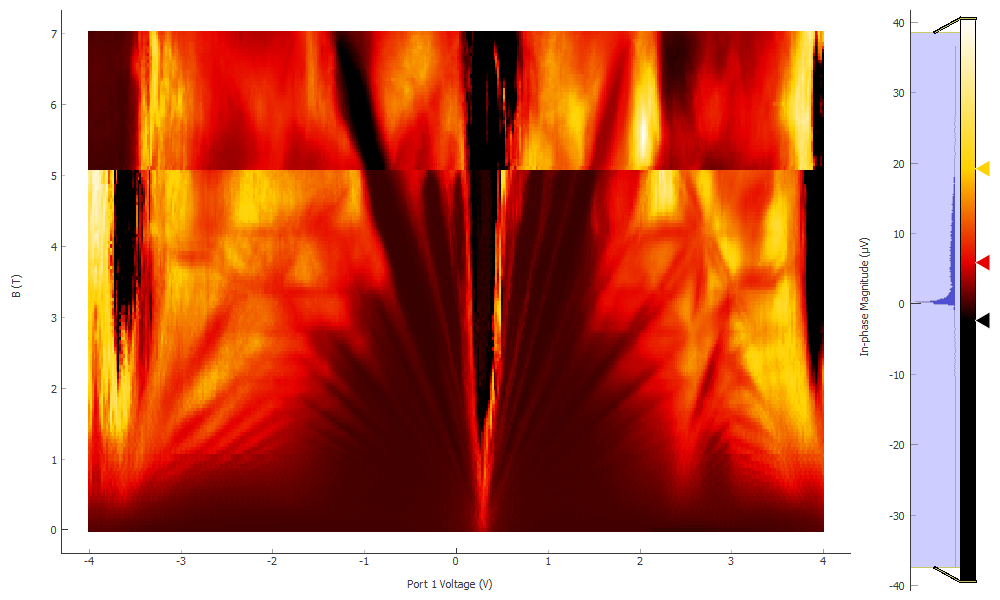

In [224]:
plot27[0] #16-15 on lockin865 (from 5T down)

In [7]:
bvals = np.linspace(-0.1, -7, 70)
gvals = np.linspace(-4, 4, 401)
data28, plot28 = npd.twod_param_sweep(triton.field_set_stable, bvals, srframe.volt_p1, gvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, SetDelay1=10, SetDelay2=1.3, Param2_SetBetween=0, DataName='M20_865_16-15_830_16-45_Rxy_twodfan_0p5nA_ton7T')

Started at 2019-12-08 16:49:15
Please wait 69.982 seconds for the field sweep, plus the time required for operating the switch...
Please wait 69.994 seconds for the field sweep, plus the time required for operating the switch...
Please wait 69.994 seconds for the field sweep, plus the time required for operating the switch...
Please wait 70.0 seconds for the field sweep, plus the time required for operating the switch...
Please wait 69.982 seconds for the field sweep, plus the time required for operating the switch...
Please wait 69.976 seconds for the field sweep, plus the time required for operating the switch...
Please wait 69.994 seconds for the field sweep, plus the time required for operating the switch...
Please wait 69.994 seconds for the field sweep, plus the time required for operating the switch...
Please wait 69.994 seconds for the field sweep, plus the time required for operating the switch...
Please wait 69.994 seconds for the field sweep, plus the time required for opera

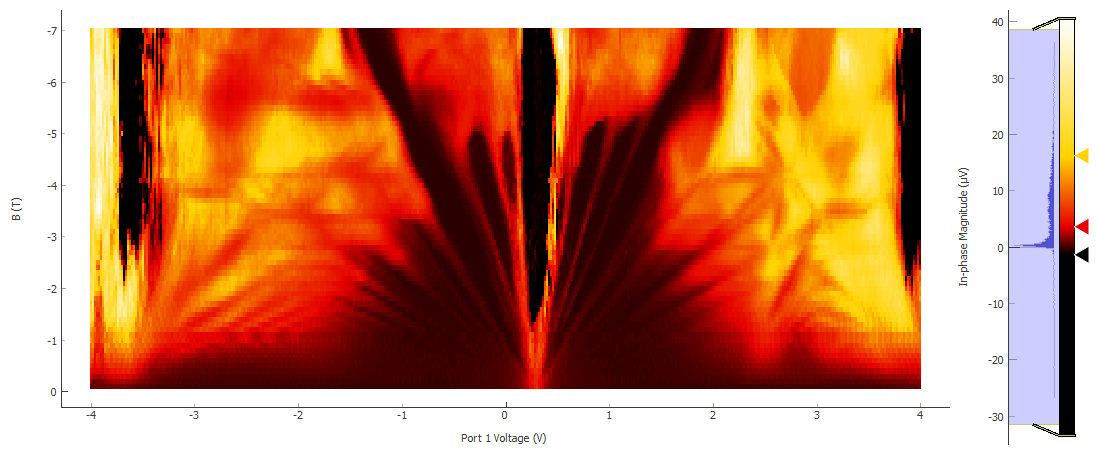

In [8]:
plot28[0]

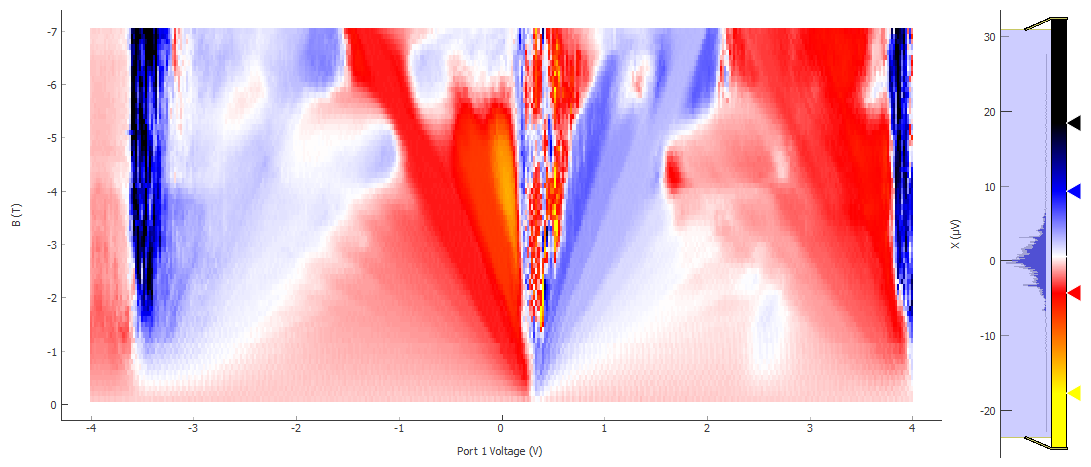

In [9]:
plot28[2]

In [10]:
triton.field(-8)

Sweep time approximately 610.006 seconds


In [11]:
triton.field(-7)

Sweep time approximately 610.006 seconds


In [12]:
bvals = np.linspace(-6.3, -5.8, 6)
gvals = np.linspace(-4, 4, 401)
data29, plot29 = npd.twod_param_sweep(triton.field_set_stable, bvals, srframe.volt_p1, gvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, SetDelay1=10, SetDelay2=1.1, Param2_SetBetween=0, DataName='M20_865_16-15_830_16-45_Rxy_twodfan_0p5nA_to-6.3Tto-5.8T')

Started at 2019-12-09 20:31:39
Please wait 610.006 seconds for the field sweep, plus the time required for operating the switch...
Please wait 1089.988 seconds for the field sweep, plus the time required for operating the switch...
Please wait 70.006 seconds for the field sweep, plus the time required for operating the switch...
Please wait 69.982 seconds for the field sweep, plus the time required for operating the switch...
Please wait 69.982 seconds for the field sweep, plus the time required for operating the switch...
Please wait 70.0 seconds for the field sweep, plus the time required for operating the switch...
DataSet:
   location = 'data/2019-12-09/#001_M20_865_16-15_830_16-45_Rxy_twodfan_0p5nA_to-6.3Tto-5.8T_20-31-36'
   <Type>   | <array_id>                  | <array.name>     | <array.shape>
   Setpoint | triton_field_set_stable_set | field_set_stable | (6,)
   Setpoint | srframe_volt_p1_set         | volt_p1          | (6, 401)
   Measured | lockin865_X                 | X

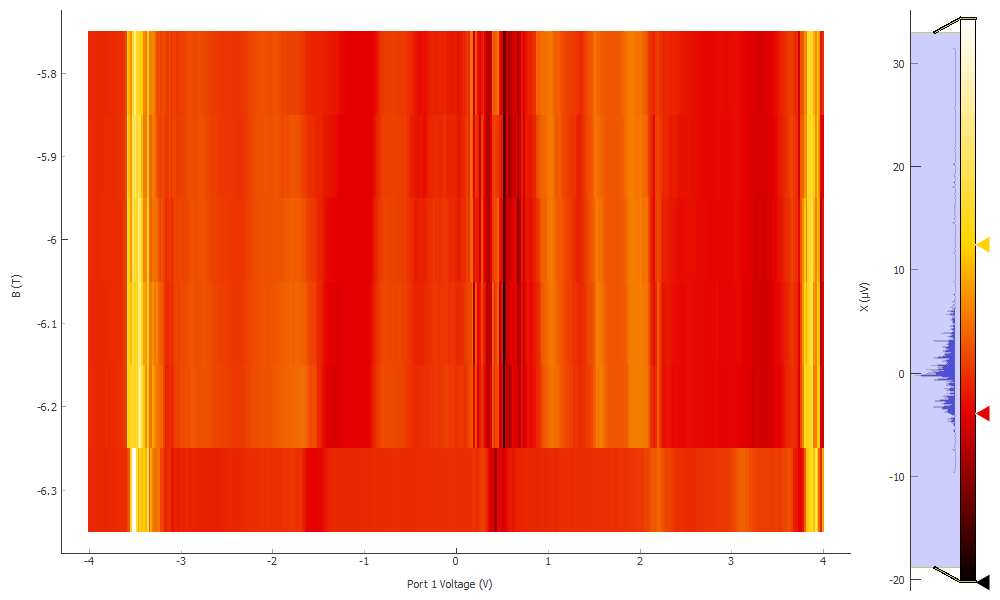

In [13]:
plot29[2]

In [14]:
srframe.volt_p5(0)
srframe.volt_p1(0)
triton.field(-0.001)
lockin865.amplitude(0.03)
offvals = np.linspace(4000e-3, -4000e-3, 201)
gvals = np.linspace(1.9, 3.6, 35)
data30, plot30 = npd.twod_param_sweep(srframe.volt_p1, gvals, srframe.volt_p5, offvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, SetDelay1=6, SetDelay2=1.1, DataName='M20_16-15_865_16-45_830_vbgsweep_AC0.3nAdvdi_baseT_b=-1mT')
srframe.volt_p5(0)
srframe.volt_p1(0)

Sweep time approximately 3489.394 seconds
Started at 2019-12-09 23:22:22
DataSet:
   location = 'data/2019-12-09/#002_M20_16-15_865_16-45_830_vbgsweep_AC0.3nAdvdi_baseT_b=-1mT_23-22-20'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (35,)
   Setpoint | srframe_volt_p5_set | volt_p5      | (35, 201)
   Measured | lockin865_X         | X            | (35, 201)
   Measured | lockin865_Y         | Y            | (35, 201)
   Measured | lockin830_X         | X            | (35, 201)
   Measured | lockin830_Y         | Y            | (35, 201)
Finished at 2019-12-10 01:56:04


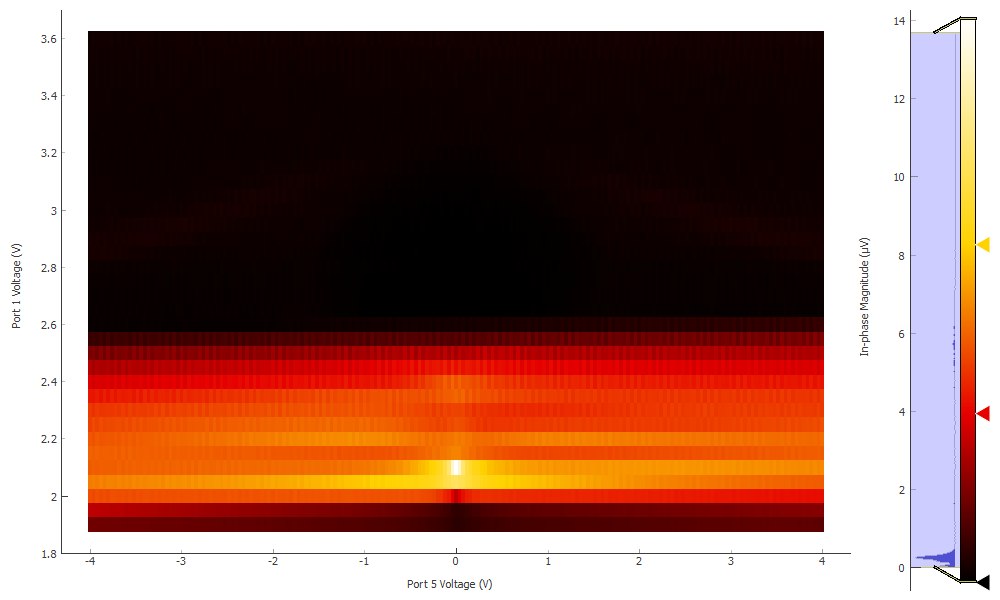

In [15]:
plot30[0]

In [16]:
triton.magnet_POC(0)
lockin865.amplitude(0.05)
srframe.volt_p1(2.3)
offvals = np.linspace(3500e-3, -3500e-3, 141)
bvals = np.linspace(0.05, -0.05, 151)
data31, plot31 = npd.twod_param_sweep(triton.field_set_stable, bvals, srframe.volt_p5, offvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, SetDelay1=8, SetDelay2=1.05, DataName='M20_16-15_865_16-45_830_Bsweep_vbg=2.3V_AC0.5nAdvdi_baseT')
srframe.volt_p5(0)
srframe.volt_p1(0)

Started at 2019-12-10 01:56:26
Please wait 40.57600000000001 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.402 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.402 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.42 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.396 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.402 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.408 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.396 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.414 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.396 seconds for the field sweep, plus the time requir

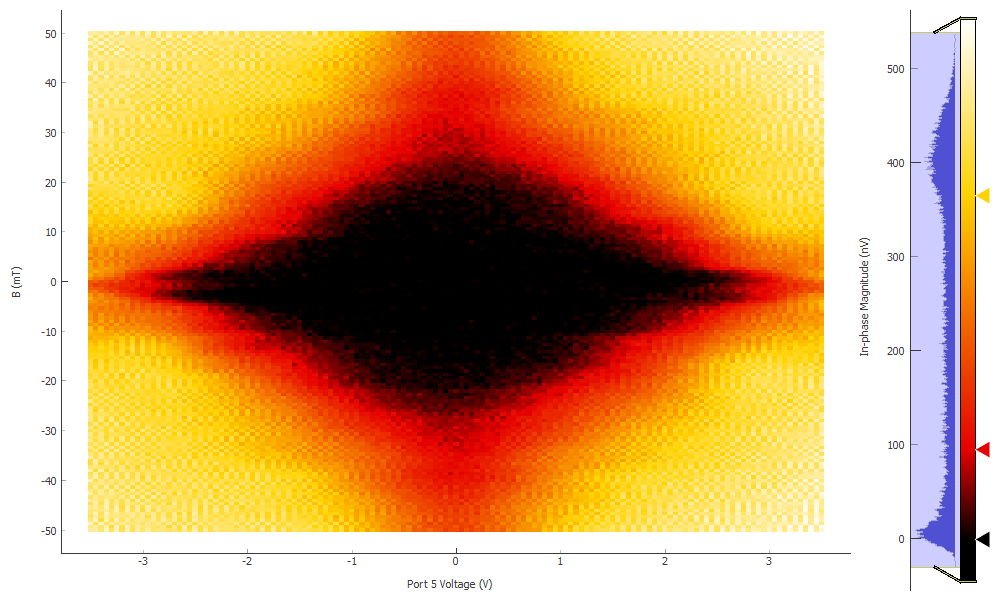

In [17]:
plot31[0]

In [18]:
triton.field(0)
triton.magnet_swh(0)

Sweep time approximately 39.988 seconds
Wait 5 min for the switch to cool


In [19]:
lockin865.amplitude(0.05)
srframe.volt_p1(2.3)
offvals = np.linspace(3400e-3, -3400e-3, 137)
bvals = np.linspace(0.005, -0.006, 45)
data32, plot32 = npd.twod_param_sweep(triton.field_set_stable, bvals, srframe.volt_p5, offvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, SetDelay1=12, SetDelay2=2.5, DataName='M20_15-16_865_16-45_830_Bsweep_vbg=2.3V_AC0.5nAdvdi_baseT_zoominaround0')
srframe.volt_p5(0)
srframe.volt_p1(0)

Started at 2019-12-10 10:09:22
Please wait 12.994 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.15 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.126 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.168 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.18 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.132 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.138 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.162 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.162 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.174 seconds for the field sweep, plus the time required for opera

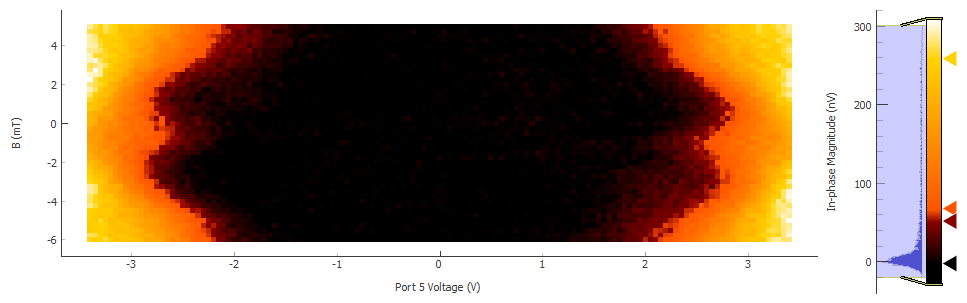

In [22]:
plot32[0]

In [23]:
srframe.volt_p1(-4.5)
time.sleep(15)
gvals = np.linspace(-4.5, 4.7, 369)
data33, plot33 = npd.single_param_sweep(srframe.volt_p1, gvals, 1.1, lockin865.X, lockin865.Y, DataName='M20_15-45_865_baseT_disconnected_1nA_-0.2T')
srframe.volt_p1(0)

Started at 2019-12-10 15:06:16
DataSet:
   location = 'data/2019-12-10/#003_M20_15-45_865_baseT_disconnected_1nA_-0.2T_15-06-15'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (369,)
   Measured | lockin865_X         | X            | (369,)
   Measured | lockin865_Y         | Y            | (369,)
Finished at 2019-12-10 15:13:44


In [24]:
srframe.volt_p1(-4.5)
time.sleep(30)
gvals = np.linspace(-4.5, 4.7, 369)
data34, plot34 = npd.single_param_sweep(srframe.volt_p1, gvals, 1.1, lockin865.X, lockin865.Y, DataName='M20_15-45_865_baseT_disconnected_1nA_+0.2T')
srframe.volt_p1(0)

Started at 2019-12-10 15:19:56
DataSet:
   location = 'data/2019-12-10/#004_M20_15-45_865_baseT_disconnected_1nA_+0.2T_15-19-55'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (369,)
   Measured | lockin865_X         | X            | (369,)
   Measured | lockin865_Y         | Y            | (369,)
Finished at 2019-12-10 15:27:24


<IPython.core.display.Javascript object>


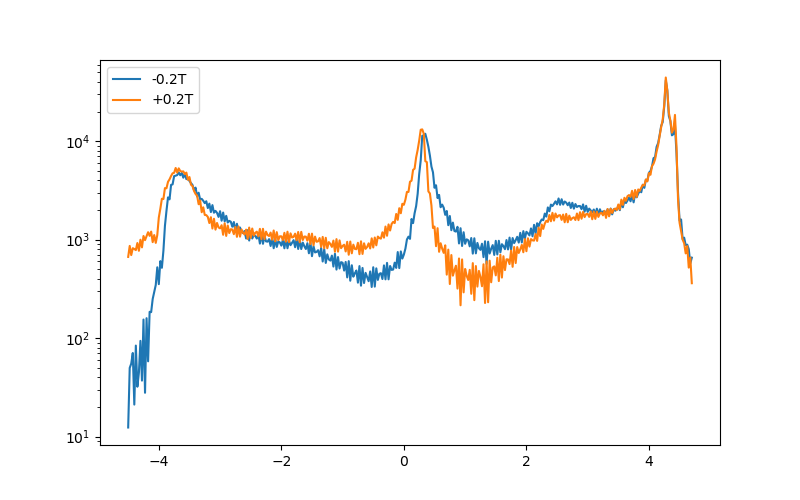

In [25]:
plt.figure(figsize=(8, 5))
plt.semilogy(gvals, np.abs(data33.lockin865_X[:]/1e-9), label='-0.2T')
plt.semilogy(gvals, np.abs(data34.lockin865_X[:]/1e-9), label='+0.2T')
plt.legend()

In [26]:
srframe.volt_p1(2.53)

In [29]:
srframe.volt_p1(-4.5)
time.sleep(25)
gvals = np.linspace(-4.5, 4.7, 737)
data35, plot35 = npd.single_param_sweep(srframe.volt_p1, gvals, 2.8, lockin865.X, lockin865.Y, DataName='M20_14-21_865_baseT_disconnected_0.2nA_-1.2mT')
srframe.volt_p1(0)

Started at 2019-12-10 16:24:47
DataSet:
   location = 'data/2019-12-10/#007_M20_14-21_865_baseT_disconnected_0.2nA_-1.2mT_16-24-46'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (737,)
   Measured | lockin865_X         | X            | (737,)
   Measured | lockin865_Y         | Y            | (737,)
Finished at 2019-12-10 17:00:36


<IPython.core.display.Javascript object>


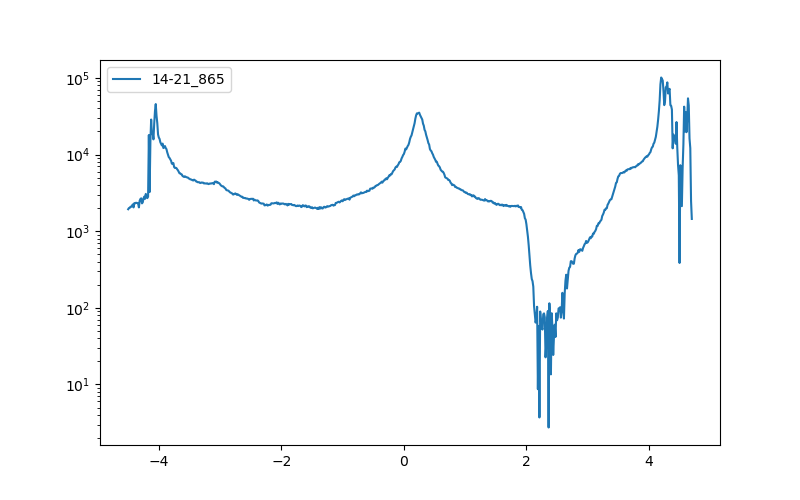

In [30]:
plt.figure(figsize=(8, 5))
plt.semilogy(gvals, np.abs(data35.lockin865_X[:]/0.2e-9), label='14-21_865')
plt.legend()

In [31]:
srframe.volt_p1(1.8)
time.sleep(15)
offvals = np.linspace(4000e-3, -4000e-3, 161)
gvals = np.linspace(1.8, 3.4, 33)
data36, plot36 = npd.twod_param_sweep(srframe.volt_p1, gvals, srframe.volt_p5, offvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, SetDelay1=10, SetDelay2=1.1, DataName='M20_16-15_830_21-14_865_vbgsweep_AC0.5nAdvdi_baseT_b=-1.2mT')
srframe.volt_p5(0)
srframe.volt_p1(0)

Started at 2019-12-10 17:07:45
DataSet:
   location = 'data/2019-12-10/#008_M20_16-15_830_21-14_865_vbgsweep_AC0.5nAdvdi_baseT_b=-1.2mT_17-07-42'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (33,)
   Setpoint | srframe_volt_p5_set | volt_p5      | (33, 161)
   Measured | lockin865_X         | X            | (33, 161)
   Measured | lockin865_Y         | Y            | (33, 161)
   Measured | lockin830_X         | X            | (33, 161)
   Measured | lockin830_Y         | Y            | (33, 161)
Finished at 2019-12-10 19:00:58
Keyboard Interrupt


Low-field Hall measurements. One at 200 mT, one at -200 mT. Connecting 45 (since that is the main electrode that works on that side) to 16 and 22.

Lockin865 16-45, lockin830 21-45

In [32]:
triton.field_set_stable(200)

Please wait 10.0 seconds for the field sweep, plus the time required for operating the switch...


In [33]:
lockin865.amplitude(0.2)  # 2 nA
gvals = np.linspace(-5, 5, 1001)
data37, plot37 = npd.single_param_sweep(srframe.volt_p1, gvals, 1.2, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, DataName='M20_16-45_865_21-45_830_Rxy-vbgsweep_2nA_200mT')
srframe.volt_p1(0)

Started at 2019-12-10 20:02:16
DataSet:
   location = 'data/2019-12-10/#009_M20_16-45_865_21-45_830_Rxy-vbgsweep_2nA_200mT_20-02-14'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (1001,)
   Measured | lockin865_X         | X            | (1001,)
   Measured | lockin865_Y         | Y            | (1001,)
   Measured | lockin830_X         | X            | (1001,)
   Measured | lockin830_Y         | Y            | (1001,)
Finished at 2019-12-10 20:25:42


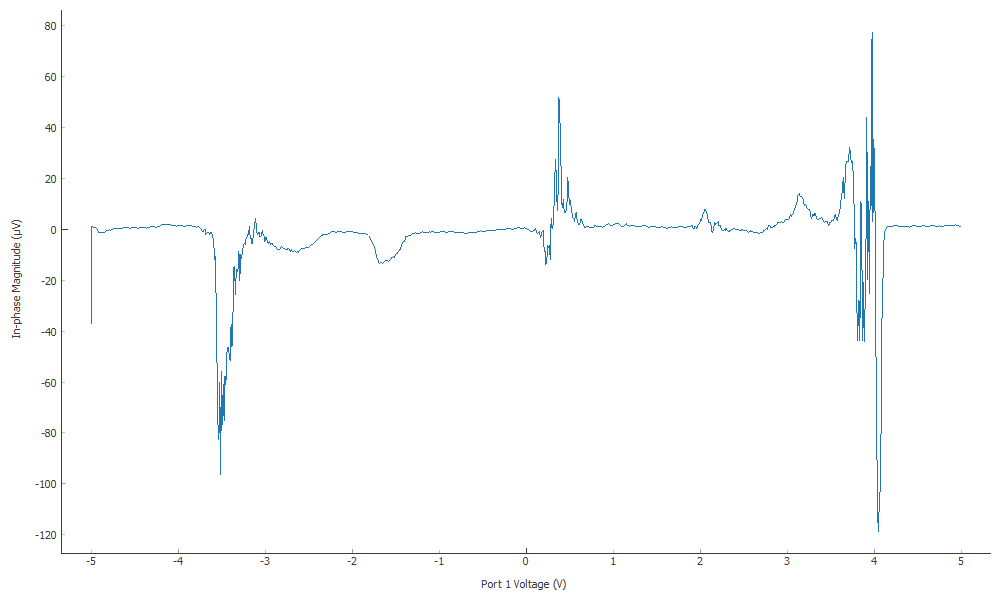

In [37]:
plot37[0]

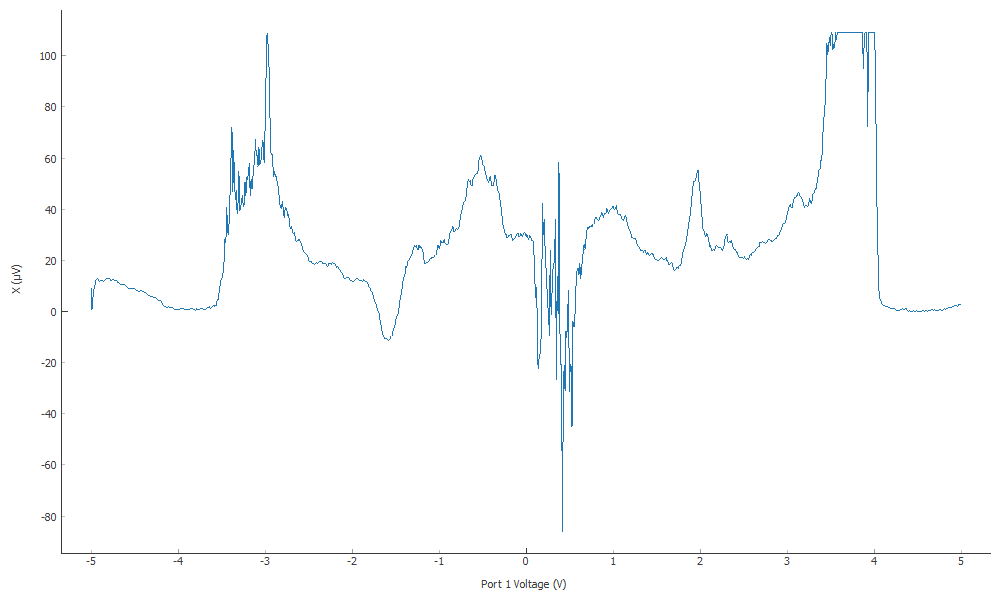

In [40]:
plot37[2]

In [34]:
triton.field_set_stable(-200)

Please wait 10.0 seconds for the field sweep, plus the time required for operating the switch...


In [35]:
gvals = np.linspace(-5, 5, 1001)
data38, plot38 = npd.single_param_sweep(srframe.volt_p1, gvals, 1.2, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, DataName='M20_16-45_865_21-45_830_Rxy-vbgsweep_2nA_-200mT')
srframe.volt_p1(0)

Started at 2019-12-10 22:13:14
DataSet:
   location = 'data/2019-12-10/#010_M20_16-45_865_21-45_830_Rxy-vbgsweep_2nA_-200mT_22-13-13'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (1001,)
   Measured | lockin865_X         | X            | (1001,)
   Measured | lockin865_Y         | Y            | (1001,)
   Measured | lockin830_X         | X            | (1001,)
   Measured | lockin830_Y         | Y            | (1001,)
Finished at 2019-12-10 22:36:41


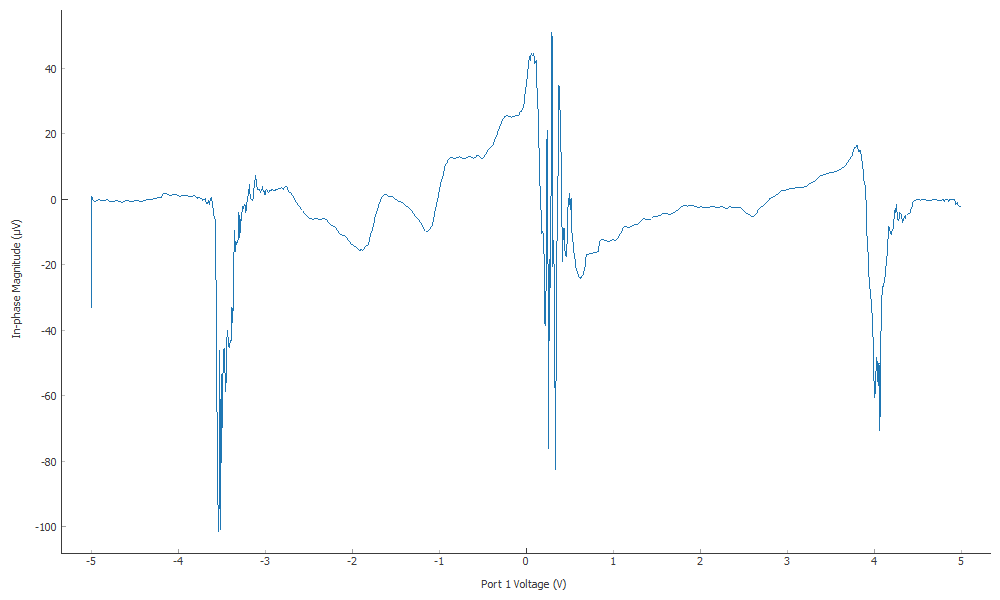

In [38]:
plot38[0]

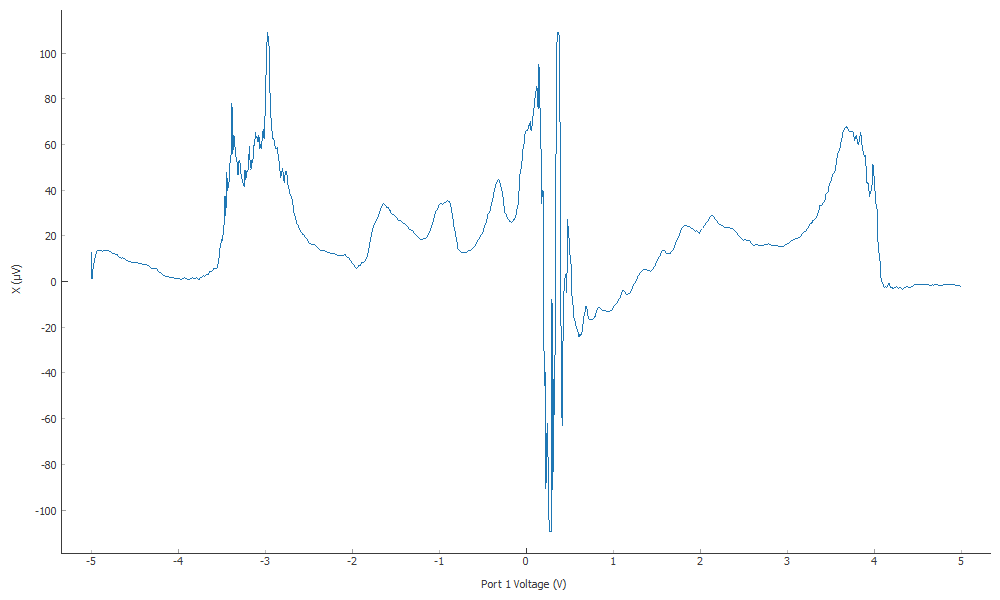

In [39]:
plot38[2]

In [16]:
data37 = qc.load_data('data/2019-12-10/#009_M20_16-45_865_21-45_830_Rxy-vbgsweep_2nA_200mT_20-02-14')
data38 = qc.load_data('data/2019-12-10/#010_M20_16-45_865_21-45_830_Rxy-vbgsweep_2nA_-200mT_22-13-13')
gs = data37.srframe_volt_p1_set[:]
Rxy1645symm = (data37.lockin865_X[:] - data38.lockin865_X[:])/2e-9
Rxy2145symm = (data37.lockin830_X[:] - data38.lockin830_X[:])/2e-9

In [18]:
esqh = 1.602e-19**2/6.626e-34

<IPython.core.display.Javascript object>


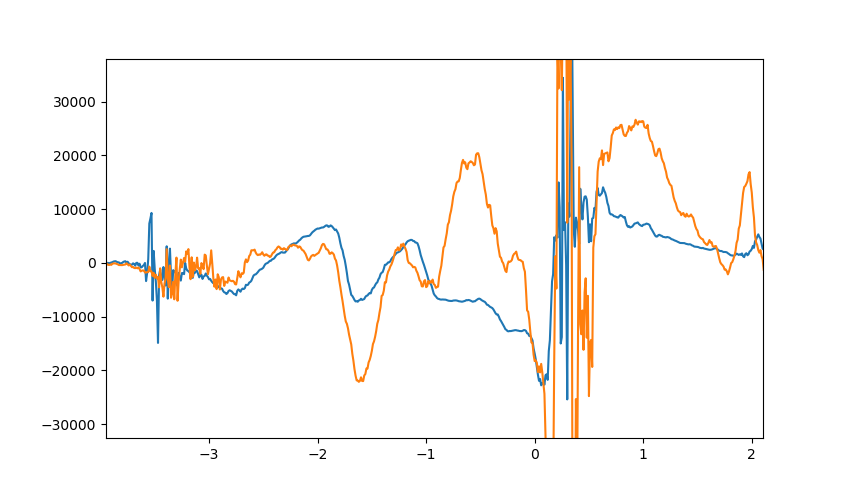

In [20]:
plt.figure()
plt.plot(gs, Rxy1645symm)
plt.plot(gs, Rxy2145symm)

In [41]:
lockin865.amplitude(0)

In [42]:
srframe.volt_p1()

0.0

In [43]:
srframe.volt_p5()

0.0

In [44]:
lockin865.amplitude()

0.0

In [45]:
lockin865.close()
lockin830.close()
srframe.close()
triton.close()

# After the power reset 12/11

In [5]:
triton.read_temps()

MC - on:  20.5384 K
MC_cernox - on:  20.4057 K
still - on:  22.6172 K
cold_plate - on:  21.755 K
magnet - on:  25.0148 K
PT2h - on:  18.4092 K
PT2p - on:  19.6086 K
PT1h - on:  66.8665 K
PT1p - on:  104.611 K


2-point measurements

In [25]:
gval = np.linspace(-4.5, 4.8, 466)  # 16-14
data2pt_0, plot2pt_0 = npd.single_param_sweep(srframe.volt_p1, gval, 1.3, lockin865.X, lockin865.Y, DataName='M20_16-14_865_2pt')
srframe.volt_p1(0)

Started at 2019-12-12 15:29:31
DataSet:
   location = 'data/2019-12-12/#002_M20_16-14_865_2pt_15-29-30'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (466,)
   Measured | lockin865_X         | X            | (466,)
   Measured | lockin865_Y         | Y            | (466,)
Finished at 2019-12-12 15:40:38


In [26]:
gval = np.linspace(-4.5, 4.8, 466)  # 14-13
data2pt_1, plot2pt_1 = npd.single_param_sweep(srframe.volt_p1, gval, 1.3, lockin865.X, lockin865.Y, DataName='M20_14-13_865_2pt')
srframe.volt_p1(0)

Started at 2019-12-12 15:41:39
DataSet:
   location = 'data/2019-12-12/#003_M20_14-13_865_2pt_15-41-38'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (466,)
   Measured | lockin865_X         | X            | (466,)
   Measured | lockin865_Y         | Y            | (466,)
Finished at 2019-12-12 15:52:45


In [27]:
gval = np.linspace(-4.5, 4.8, 466)  # 21-16
data2pt_2, plot2pt_2 = npd.single_param_sweep(srframe.volt_p1, gval, 1.3, lockin865.X, lockin865.Y, DataName='M20_21-16_865_2pt')
srframe.volt_p1(0)

Started at 2019-12-12 15:55:58
DataSet:
   location = 'data/2019-12-12/#004_M20_21-16_865_2pt_15-55-57'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (466,)
   Measured | lockin865_X         | X            | (466,)
   Measured | lockin865_Y         | Y            | (466,)
Finished at 2019-12-12 16:07:05


In [28]:
gval = np.linspace(-4.5, 4.8, 466)  # 21-14
data2pt_3, plot2pt_3 = npd.single_param_sweep(srframe.volt_p1, gval, 1.3, lockin865.X, lockin865.Y, DataName='M20_21-14_865_2pt')
srframe.volt_p1(0)

Started at 2019-12-12 16:08:34
DataSet:
   location = 'data/2019-12-12/#005_M20_21-14_865_2pt_16-08-33'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (466,)
   Measured | lockin865_X         | X            | (466,)
   Measured | lockin865_Y         | Y            | (466,)
Finished at 2019-12-12 16:19:40


In [29]:
srframe.volt_p1(-4.5)
time.sleep(5)
gval = np.linspace(-4.5, 4.8, 466)  # 16-45
data2pt_4, plot2pt_4 = npd.single_param_sweep(srframe.volt_p1, gval, 1.3, lockin865.X, lockin865.Y, DataName='M20_16-45_865_2pt')
srframe.volt_p1(0)

Started at 2019-12-12 16:21:53
DataSet:
   location = 'data/2019-12-12/#006_M20_16-45_865_2pt_16-21-52'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (466,)
   Measured | lockin865_X         | X            | (466,)
   Measured | lockin865_Y         | Y            | (466,)
Finished at 2019-12-12 16:33:03


In [280]:
plt.figure(6,6)
plt.plot(gval[7:], 1/data2pt_0.lockin865_X[7:]*0.5e-9*10**6, label='16-14')  # probably should actually use R to show the insulating behavior...
plt.plot(gval[7:], 1/data2pt_1.lockin865_X[7:]*0.5e-9*10**6, label='14-13')
plt.plot(gval[7:], 1/data2pt_2.lockin865_X[7:]*0.5e-9*10**6, label='21-16')
plt.plot(gval[7:], 1/data2pt_3.lockin865_X[7:]*0.5e-9*10**6, label='21-14')
plt.plot(gval, 1/data2pt_4.lockin865_X[:]*0.5e-9*10**6, label='16-45')
plt.legend()

NameError: name 'data2pt_0' is not defined

Before connecting temp cables: 16-14 and 21-14, current 24-13

In [24]:
srframe.volt_p1(0)

In [41]:
srframe.volt_p1(-5)
time.sleep(10)
gval = np.linspace(-5, 5, 501)
data39, plot39 = npd.single_param_sweep(srframe.volt_p1, gval, 1.3, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, DataName='M20_16-14_865_21-14_830_gatesweepbasetemp', YParam=[lockin865.X, lockin830.X])
srframe.volt_p1(0)

Started at 2019-12-12 16:47:05
DataSet:
   location = 'data/2019-12-12/#007_M20_16-14_865_21-14_830_gatesweepbasetemp_16-47-04'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (501,)
   Measured | lockin865_X         | X            | (501,)
   Measured | lockin865_Y         | Y            | (501,)
   Measured | lockin830_X         | X            | (501,)
   Measured | lockin830_Y         | Y            | (501,)
Finished at 2019-12-12 16:59:09


In [42]:
triton.pid_setpoint(0.03)

In [43]:
triton.pid_mode(1)

In [44]:
triton.pid_range(1)

In [45]:
triton.pid_setpoint(0.05)

In [46]:
triton.pid_range(10)

In [47]:
Tvals = np.linspace(0.05, 1, 20)
gvals = np.linspace(-5, 5, 501)
data40, plot40 = npd.twod_param_sweep(triton.pid_setpoint, Tvals, srframe.volt_p1, gvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, SetDelay1=180, SetDelay2=1.3, Param2_SetBetween=0, DataName='M20_16-14_865_21-14_830_gateTsweepto1K_0p5nA')

Started at 2019-12-12 17:06:19
DataSet:
   location = 'data/2019-12-12/#008_M20_16-14_865_21-14_830_gateTsweepto1K_0p5nA_17-06-17'
   <Type>   | <array_id>              | <array.name> | <array.shape>
   Setpoint | triton_pid_setpoint_set | pid_setpoint | (20,)
   Setpoint | srframe_volt_p1_set     | volt_p1      | (20, 501)
   Measured | lockin865_X             | X            | (20, 501)
   Measured | lockin865_Y             | Y            | (20, 501)
   Measured | lockin830_X             | X            | (20, 501)
   Measured | lockin830_Y             | Y            | (20, 501)
Finished at 2019-12-12 22:09:28


In [9]:
data40 = qc.load_data('data/2019-12-12/#008_M20_16-14_865_21-14_830_gateTsweepto1K_0p5nA_17-06-17')

In [10]:
plot40 = qc.QtPlot(data40.lockin865_X)

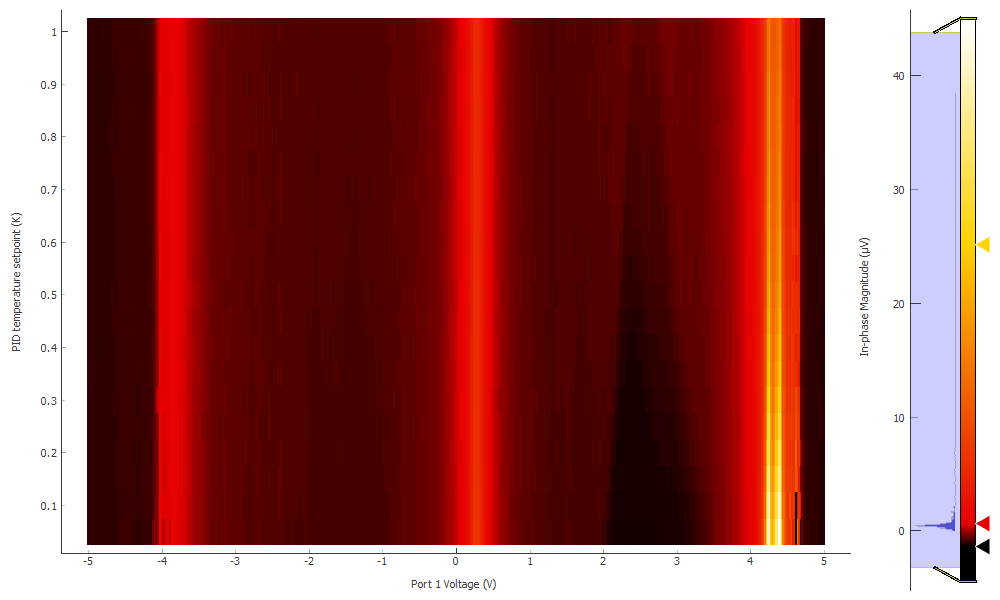

In [11]:
plot40

In [48]:
triton.pid_range(31.6)
time.sleep(3)

In [49]:
Tvals = np.linspace(1.1, 1.4, 4)
gvals = np.linspace(-5, 5, 501)
data41, plot41 = npd.twod_param_sweep(triton.pid_setpoint, Tvals, srframe.volt_p1, gvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, SetDelay1=180, SetDelay2=1.3, Param2_SetBetween=0, DataName='M20_16-14_865_21-14_830_gateTsweep1p1to1p4K_0p5nA', ZParam=[lockin865.X, lockin830.X])

Started at 2019-12-12 22:09:33
DataSet:
   location = 'data/2019-12-12/#009_M20_16-14_865_21-14_830_gateTsweep1p1to1p4K_0p5nA_22-09-32'
   <Type>   | <array_id>              | <array.name> | <array.shape>
   Setpoint | triton_pid_setpoint_set | pid_setpoint | (4,)
   Setpoint | srframe_volt_p1_set     | volt_p1      | (4, 501)
   Measured | lockin865_X             | X            | (4, 501)
   Measured | lockin865_Y             | Y            | (4, 501)
   Measured | lockin830_X             | X            | (4, 501)
   Measured | lockin830_Y             | Y            | (4, 501)
Finished at 2019-12-12 23:10:01


In [14]:
data41 = qc.load_data('data/2019-12-12/#009_M20_16-14_865_21-14_830_gateTsweep1p1to1p4K_0p5nA_22-09-32')
plot41 = qc.QtPlot(data41.lockin865_X)

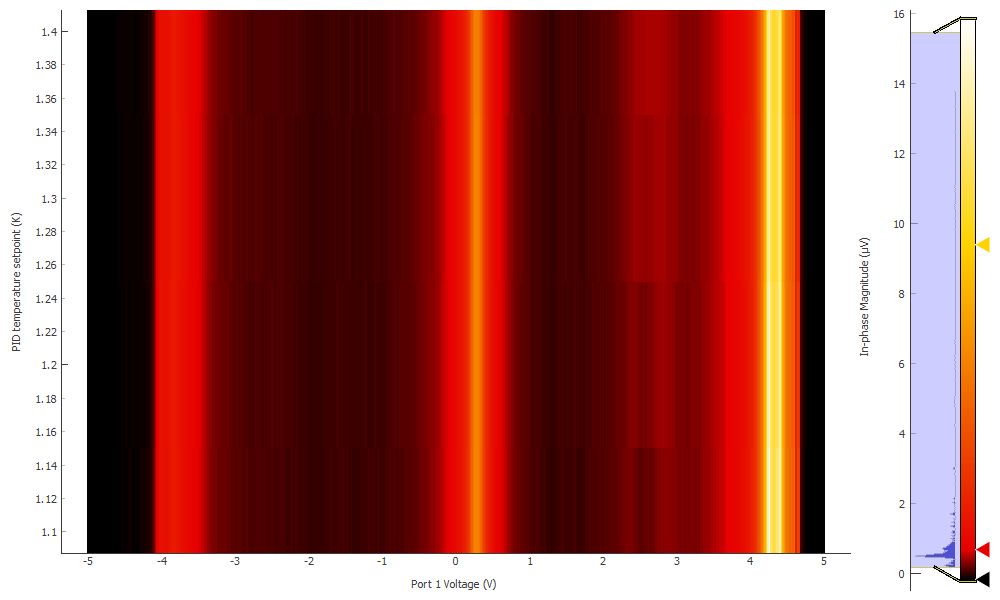

In [15]:
plot41

In [50]:
triton.pid_range(100)
time.sleep(3)

In [51]:
Tvals = np.linspace(1.5, 2, 6)
gvals = np.linspace(-5, 5, 501)
data42, plot42 = npd.twod_param_sweep(triton.pid_setpoint, Tvals, srframe.volt_p1, gvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, SetDelay1=180, SetDelay2=1.3, Param2_SetBetween=0, DataName='M20_16-14_865_21-14_830_gateTsweep1p5to2K_0p5nA', ZParam=[lockin865.X, lockin830.X])

Started at 2019-12-12 23:10:06
DataSet:
   location = 'data/2019-12-12/#010_M20_16-14_865_21-14_830_gateTsweep1p5to2K_0p5nA_23-10-05'
   <Type>   | <array_id>              | <array.name> | <array.shape>
   Setpoint | triton_pid_setpoint_set | pid_setpoint | (6,)
   Setpoint | srframe_volt_p1_set     | volt_p1      | (6, 501)
   Measured | lockin865_X             | X            | (6, 501)
   Measured | lockin865_Y             | Y            | (6, 501)
   Measured | lockin830_X             | X            | (6, 501)
   Measured | lockin830_Y             | Y            | (6, 501)
Finished at 2019-12-13 00:40:25


In [6]:
data42 = qc.load_data('data/2019-12-12/#010_M20_16-14_865_21-14_830_gateTsweep1p5to2K_0p5nA_23-10-05')

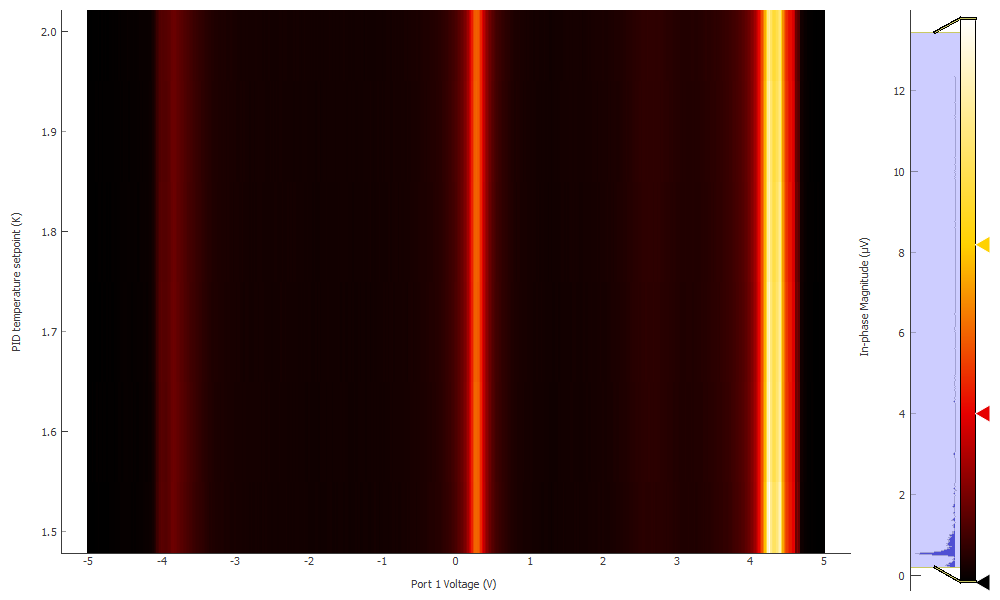

In [8]:
plot42 = qc.QtPlot(data42.lockin865_X)
plot42

Now turn of turbo, switch off V9, on V4 (let the helium refill the tank partway and the turbo spin down while temperature control is on at 2K). Then

In [17]:
triton.pid_mode(0)  # then switch to the cernox sensor by changing 8 to 5 in the pid window, turning off 8 and on 5.

In [18]:
triton.pid_mode(1)

In [19]:
triton.pid_setpoint(2)
triton.pid_range(100)

In [20]:
triton.pid_setpoint(2.1)

In [21]:
Tvals = np.linspace(2.1, 10, 80)
gvals = np.linspace(-5, 5, 501)
data43, plot43 = npd.twod_param_sweep(triton.pid_setpoint, Tvals, srframe.volt_p1, gvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, SetDelay1=180, SetDelay2=1.3, Param2_SetBetween=0, DataName='M20_16-14_865_21-14_830_gateTsweep2.1Kto10K_0p5nA', ZParam=[lockin865.X, lockin830.X])

Started at 2019-12-13 15:34:13
DataSet:
   location = 'data/2019-12-13/#001_M20_16-14_865_21-14_830_gateTsweep2.1Kto10K_0p5nA_15-34-12'
   <Type>   | <array_id>              | <array.name> | <array.shape>
   Setpoint | triton_pid_setpoint_set | pid_setpoint | (80,)
   Setpoint | srframe_volt_p1_set     | volt_p1      | (80, 501)
   Measured | lockin865_X             | X            | (80, 501)
   Measured | lockin865_Y             | Y            | (80, 501)
   Measured | lockin830_X             | X            | (80, 501)
   Measured | lockin830_Y             | Y            | (80, 501)
Finished at 2019-12-14 11:43:35


In [22]:
offvals = np.linspace(2500e-3, -2500e-3, 126)
bvals = np.linspace(0.015, -0.018, 199)
data44, plot44 = npd.twod_param_sweep(triton.field_set_stable, bvals, srframe.volt_p5, offvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, SetDelay1=12, SetDelay2=3, DataName='M20_14-16_865_14-21_830_Bsweep_vbg=2.3V_AC0.3nAdvdi_baseT')
srframe.volt_p5(0)
srframe.volt_p1(0)

Started at 2019-12-17 13:59:09
Are you sure you want to use the magnet? [y/n]: y
Please wait 14.734 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.054 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.048 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.054 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.048 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.054 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.054 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.048 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.048 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.048 seconds f

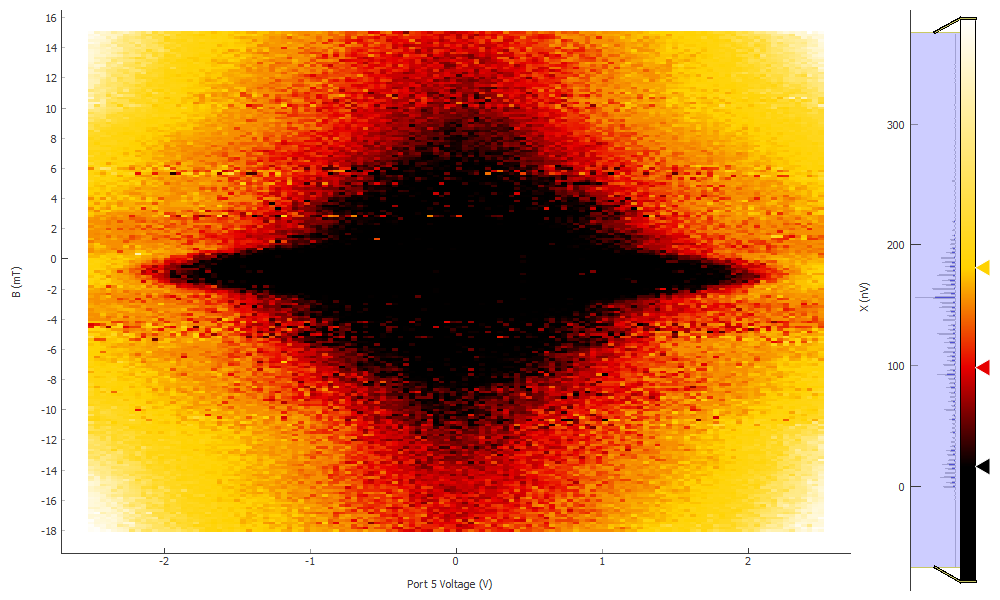

In [23]:
plot44[2]

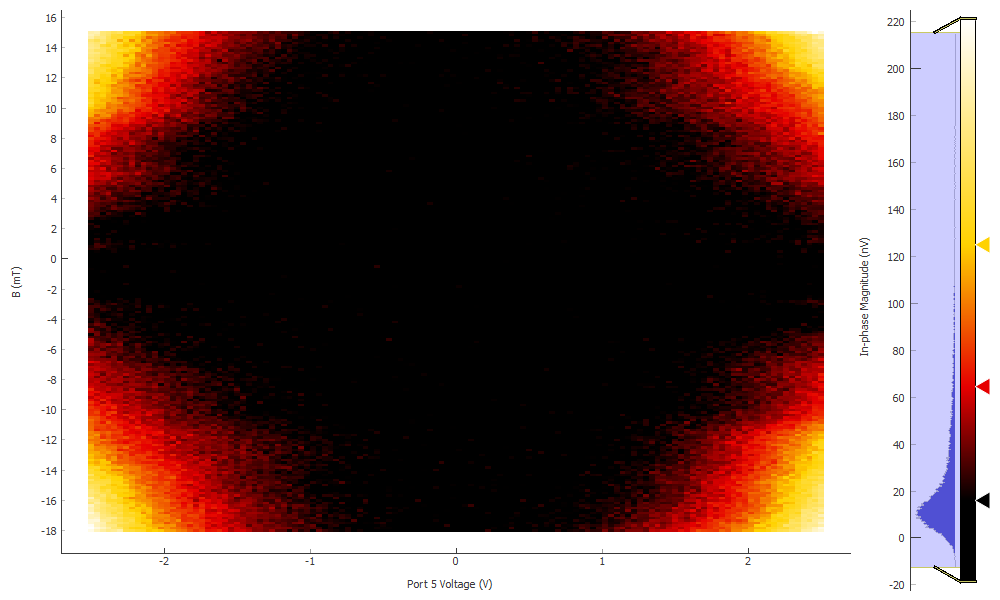

In [24]:
plot44[0]

In [25]:
srframe.volt_p1(-8)
time.sleep(15)
gvals = np.linspace(-8, 8, 321)
data45, plot45 = npd.single_param_sweep(srframe.volt_p1, gvals, 3, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, DataName='M20_21-22_865_16-21_830_baseT_disconnected_0.2nA_25mT')
srframe.volt_p1(0)

Started at 2019-12-18 13:32:39
DataSet:
   location = 'data/2019-12-18/#001_M20_21-22_865_16-21_830_baseT_disconnected_0.2nA_25mT_13-32-37'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (321,)
   Measured | lockin865_X         | X            | (321,)
   Measured | lockin865_Y         | Y            | (321,)
   Measured | lockin830_X         | X            | (321,)
   Measured | lockin830_Y         | Y            | (321,)
Finished at 2019-12-18 13:49:40


In [26]:
triton.field(-0.001)

Sweep time approximately 17.614 seconds


In [27]:
srframe.volt_p1(-8)
time.sleep(15)
gvals = np.linspace(-8, 8, 321)
data46, plot46 = npd.single_param_sweep(srframe.volt_p1, gvals, 3, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, DataName='M20_21-22_865_16-21_830_baseT_disconnected_0.2nA_-1mT')
srframe.volt_p1(0)

Started at 2019-12-18 13:50:30
DataSet:
   location = 'data/2019-12-18/#002_M20_21-22_865_16-21_830_baseT_disconnected_0.2nA_-1mT_13-50-29'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (321,)
   Measured | lockin865_X         | X            | (321,)
   Measured | lockin865_Y         | Y            | (321,)
   Measured | lockin830_X         | X            | (321,)
   Measured | lockin830_Y         | Y            | (321,)
Finished at 2019-12-18 14:07:32


<IPython.core.display.Javascript object>


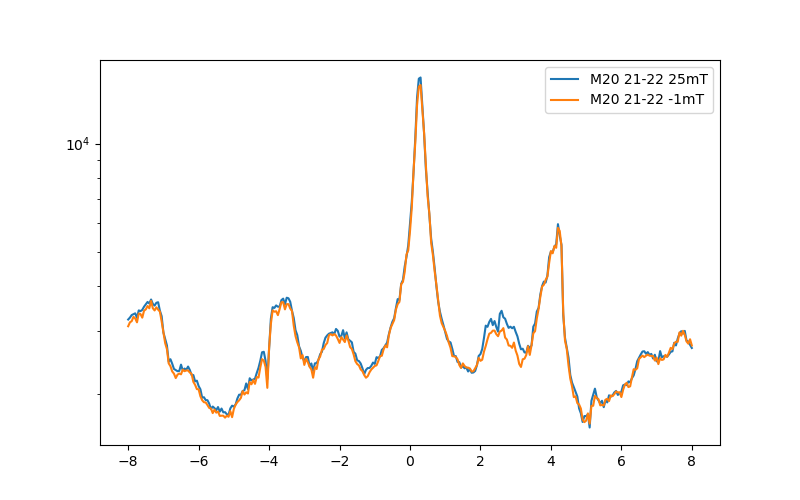

In [28]:
plt.figure(figsize=(8, 5))
plt.semilogy(gvals, np.abs(data45.lockin865_X[:]/0.2e-9), label='M20 21-22 25mT')
plt.semilogy(gvals, np.abs(data46.lockin865_X[:]/0.2e-9), label='M20 21-22 -1mT')
plt.legend()

<IPython.core.display.Javascript object>


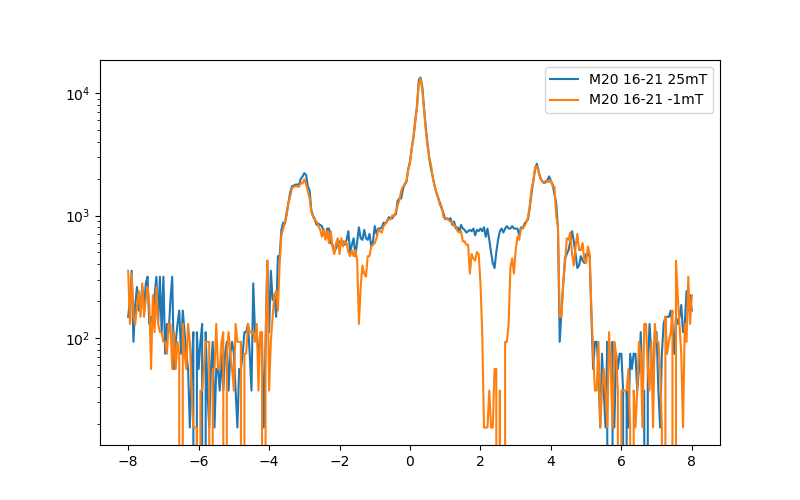

In [29]:
plt.figure(figsize=(8, 5))
plt.semilogy(gvals, np.abs(data45.lockin830_X[:]/0.2e-9), label='M20 16-21 25mT')
plt.semilogy(gvals, np.abs(data46.lockin830_X[:]/0.2e-9), label='M20 16-21 -1mT')
plt.legend()

In [30]:
srframe.volt_p1(-1.5)

In [31]:
srframe.volt_p1(-3)
time.sleep(30)
gvals = np.linspace(-3, 3, 241)
data47, plot47 = npd.single_param_sweep(srframe.volt_p1, gvals, 10, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, DataName='M20_21-22_865_16-21_830_baseT_disconnected_0.15nA_-1mT')
srframe.volt_p1(0)

Started at 2019-12-18 14:44:10
DataSet:
   location = 'data/2019-12-18/#003_M20_21-22_865_16-21_830_baseT_disconnected_0.15nA_-1mT_14-44-08'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (241,)
   Measured | lockin865_X         | X            | (241,)
   Measured | lockin865_Y         | Y            | (241,)
   Measured | lockin830_X         | X            | (241,)
   Measured | lockin830_Y         | Y            | (241,)
Finished at 2019-12-18 15:25:11


<IPython.core.display.Javascript object>


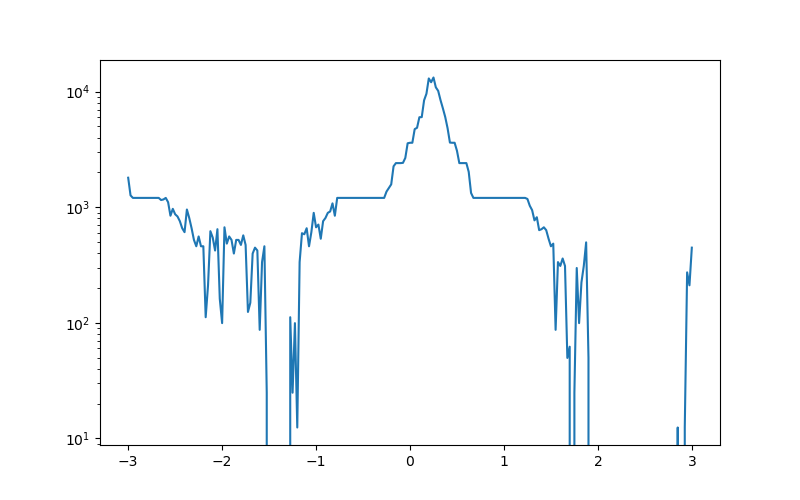

In [32]:
plt.figure(figsize=(8, 5))
plt.semilogy(gvals, np.abs(data47.lockin830_X[:]/0.15e-9), label='M20 16-21 -1mT')

In [33]:
offvals = np.linspace(-1, 1, 101)
data48, plot48 = npd.single_param_sweep(srframe.volt_p5, offvals, 9, lockin830.X, lockin830.Y, DataName='M20_21-16_basetemp_-1mT_dvdi')

Started at 2019-12-18 15:42:39
DataSet:
   location = 'data/2019-12-18/#004_M20_21-16_basetemp_-1mT_dvdi_15-42-38'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p5_set | volt_p5      | (101,)
   Measured | lockin830_X         | X            | (101,)
   Measured | lockin830_Y         | Y            | (101,)
Finished at 2019-12-18 15:58:02


<IPython.core.display.Javascript object>


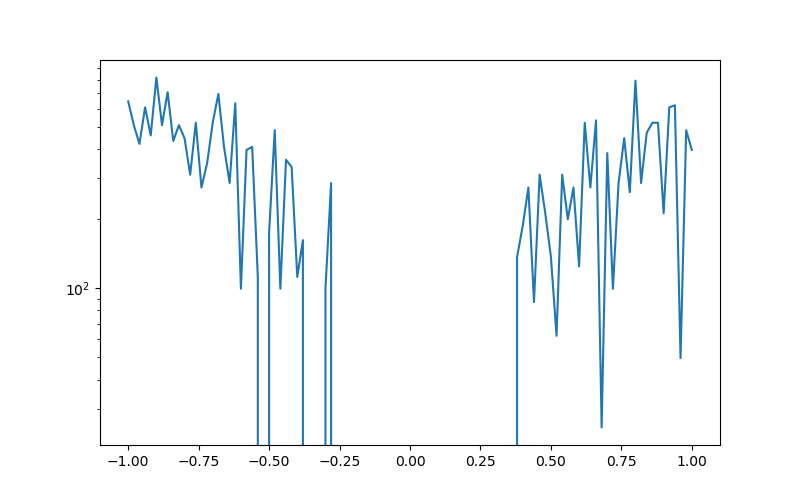

In [34]:
plt.figure(figsize=(8, 5))
plt.semilogy(offvals, np.abs(data48.lockin830_X[:]/0.15e-9), label='M20 dvdi -1mT')

In [35]:
offvals = np.linspace(1, -1, 101)
data49, plot49 = npd.single_param_sweep(srframe.volt_p5, offvals, 9, lockin830.X, lockin830.Y, DataName='M20_21-16_basetemp_-1mT_dvdi_+to-')

Started at 2019-12-18 15:58:03
DataSet:
   location = 'data/2019-12-18/#005_M20_21-16_basetemp_-1mT_dvdi_+to-_15-58-02'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p5_set | volt_p5      | (101,)
   Measured | lockin830_X         | X            | (101,)
   Measured | lockin830_Y         | Y            | (101,)
Finished at 2019-12-18 16:13:25


In [36]:
offvals = np.linspace(1, -1, 101)
data50, plot50 = npd.single_param_sweep(srframe.volt_p5, offvals, 9, lockin865.X, lockin865.Y, DataName='M20_21-16_865_basetemp_-1mT_dvdi_+to-')

Started at 2019-12-18 16:29:03
DataSet:
   location = 'data/2019-12-18/#006_M20_21-16_865_basetemp_-1mT_dvdi_+to-_16-29-02'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p5_set | volt_p5      | (101,)
   Measured | lockin865_X         | X            | (101,)
   Measured | lockin865_Y         | Y            | (101,)
Finished at 2019-12-18 16:44:27


In [37]:
srframe.volt_p5(1)
time.sleep(30)
offvals = np.linspace(1, -1, 101)
data51, plot51 = npd.single_param_sweep(srframe.volt_p5, offvals, 9, lockin830.X, lockin830.Y, DataName='M20_21-16_830_basetemp_-1mT_0.1nAdvdi_+to-')

Started at 2019-12-18 16:56:51
DataSet:
   location = 'data/2019-12-18/#007_M20_21-16_830_basetemp_-1mT_0.1nAdvdi_+to-_16-56-50'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p5_set | volt_p5      | (101,)
   Measured | lockin830_X         | X            | (101,)
   Measured | lockin830_Y         | Y            | (101,)
Finished at 2019-12-18 16:57:00
Keyboard Interrupt


In [38]:
srframe.volt_p1(-5)
time.sleep(15)
gvals = np.linspace(-5, 5, 501)
data52, plot52 = npd.single_param_sweep(srframe.volt_p1, gvals, 2.7, lockin830.X, lockin830.Y, DataName='M20_16-21_830_baseT_disconnected_0.1nA_-0.9mT')
srframe.volt_p1(0)

Started at 2019-12-18 17:52:42
DataSet:
   location = 'data/2019-12-18/#008_M20_16-21_830_baseT_disconnected_0.1nA_-0.9mT_17-52-41'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (501,)
   Measured | lockin830_X         | X            | (501,)
   Measured | lockin830_Y         | Y            | (501,)
Finished at 2019-12-18 18:16:18


In [39]:
triton.magnet_POC(0)

In [41]:
#sensitivity 20uV, 1s integration
srframe.volt_p1(-5)
time.sleep(40)
gvals = np.linspace(-5, 5, 501)
data53, plot53 = npd.single_param_sweep(srframe.volt_p1, gvals, 12, lockin830.X, lockin830.Y, DataName='M20_16-21_830_baseT_disconnected_0.1nA_-1.1mT')
srframe.volt_p1(0)

Started at 2019-12-18 18:57:20
DataSet:
   location = 'data/2019-12-18/#009_M20_16-21_830_baseT_disconnected_0.1nA_-1.1mT_18-57-19'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (501,)
   Measured | lockin830_X         | X            | (501,)
   Measured | lockin830_Y         | Y            | (501,)
Finished at 2019-12-18 20:38:51


In [42]:
triton.field(0.025)

Sweep time approximately 17.644000000000002 seconds


In [43]:
#sensitivity 20uV, 1s integration
srframe.volt_p1(-5)
time.sleep(40)
gvals = np.linspace(-5, 5, 501)
data54, plot54 = npd.single_param_sweep(srframe.volt_p1, gvals, 10, lockin830.X, lockin830.Y, DataName='M20_16-21_830_baseT_disconnected_0.1nA_25mT')
srframe.volt_p1(0)

Started at 2019-12-18 20:39:54
DataSet:
   location = 'data/2019-12-18/#010_M20_16-21_830_baseT_disconnected_0.1nA_25mT_20-39-53'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (501,)
   Measured | lockin830_X         | X            | (501,)
   Measured | lockin830_Y         | Y            | (501,)
Finished at 2019-12-18 22:21:07


In [236]:
data53 = qc.load_data('data/2019-12-18/#009_M20_16-21_830_baseT_disconnected_0.1nA_-1.1mT_18-57-19')
data54 = qc.load_data('data/2019-12-18/#010_M20_16-21_830_baseT_disconnected_0.1nA_25mT_20-39-53')

<IPython.core.display.Javascript object>


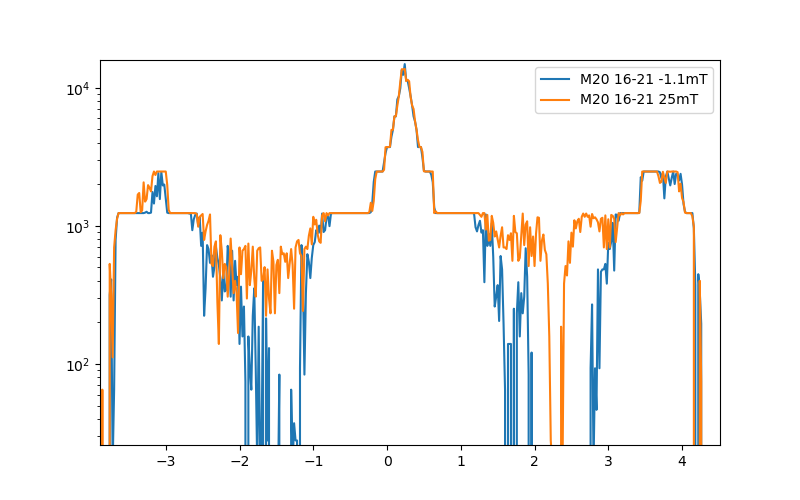

In [44]:
plt.figure(figsize=(8, 5))
plt.semilogy(gvals, np.abs(data53.lockin830_X[:]/0.1e-9), label='M20 16-21 -1.1mT')
plt.semilogy(gvals, np.abs(data54.lockin830_X[:]/0.1e-9), label='M20 16-21 25mT')
plt.legend()

<IPython.core.display.Javascript object>


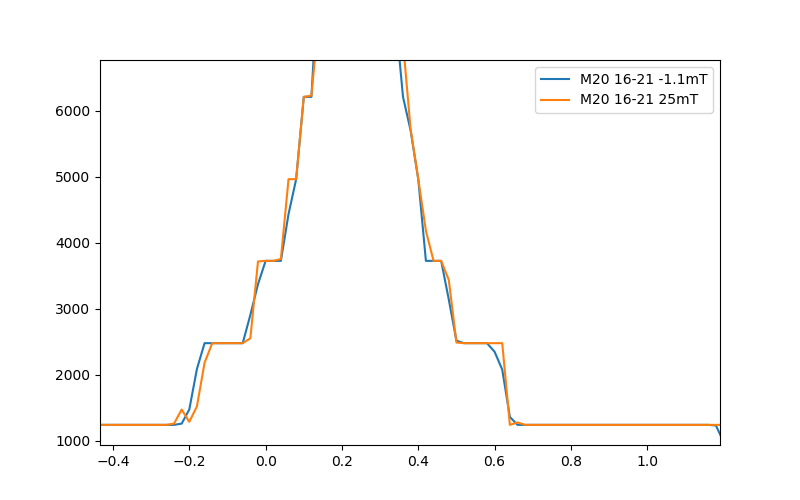

In [238]:
plt.figure(figsize=(8, 5))
plt.plot(data53.srframe_volt_p1_set, np.abs(data53.lockin830_X[:]/0.1e-9), label='M20 16-21 -1.1mT')
plt.plot(data54.srframe_volt_p1_set, np.abs(data54.lockin830_X[:]/0.1e-9), label='M20 16-21 25mT')
plt.legend()

In [46]:
triton.field(-0.025)

Sweep time approximately 24.634 seconds


In [48]:
triton.field()

-0.02492

In [49]:
srframe.volt_p1(-3.7)
time.sleep(40)
gvals = np.linspace(-3.7, -2.4, 66)
data55, plot55 = npd.single_param_sweep(srframe.volt_p1, gvals, 10, lockin830.X, lockin830.Y, DataName='M20_16-21_830_baseT_disconnected_0.1nA_-25mT_zoom')
srframe.volt_p1(0)

Started at 2019-12-18 22:26:32
DataSet:
   location = 'data/2019-12-18/#011_M20_16-21_830_baseT_disconnected_0.1nA_-25mT_zoom_22-26-31'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (66,)
   Measured | lockin830_X         | X            | (66,)
   Measured | lockin830_Y         | Y            | (66,)
Finished at 2019-12-18 22:37:44


In [51]:
lockin865.amplitude()

0.0099999997765

In [52]:
lockin865.amplitude(0.05)

In [53]:
lockin865.amplitude()

0.04999999702

In [54]:
srframe.volt_p1(-3.7)
time.sleep(40)
gvals = np.linspace(-3.7, -2.4, 66)
data56, plot56 = npd.single_param_sweep(srframe.volt_p1, gvals, 10.5, lockin830.X, lockin830.Y, DataName='M20_16-21_830_baseT_disconnected_0.5nA_-25mT_zoom')
srframe.volt_p1(0)

Started at 2019-12-18 22:40:08
DataSet:
   location = 'data/2019-12-18/#012_M20_16-21_830_baseT_disconnected_0.5nA_-25mT_zoom_22-40-08'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (66,)
   Measured | lockin830_X         | X            | (66,)
   Measured | lockin830_Y         | Y            | (66,)
Finished at 2019-12-18 22:51:50


<IPython.core.display.Javascript object>


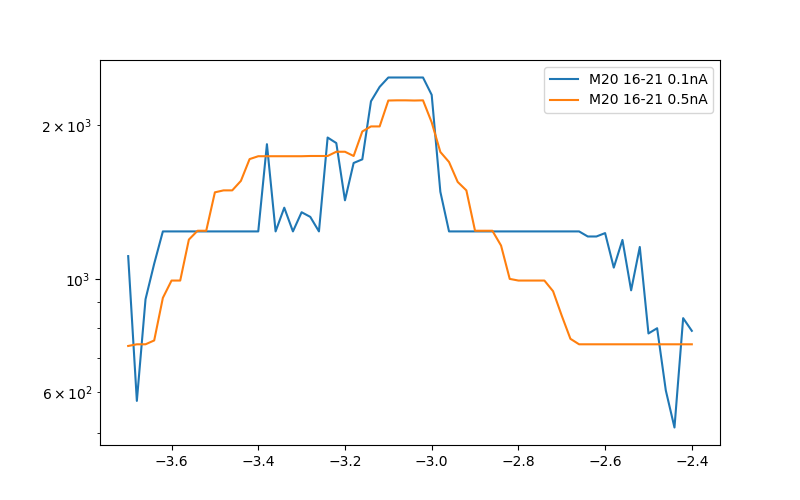

In [56]:
plt.figure(figsize=(8, 5))
plt.semilogy(gvals, np.abs(data55.lockin830_X[:]/0.1e-9), label='M20 16-21 0.1nA')
plt.semilogy(gvals, np.abs(data56.lockin830_X[:]/0.5e-9), label='M20 16-21 0.5nA')
plt.legend()

In [57]:
lockin865.amplitude(0.03)
srframe.volt_p1(-3.7)
time.sleep(40)
gvals = np.linspace(-3.7, -2.4, 66)
data57, plot57 = npd.single_param_sweep(srframe.volt_p1, gvals, 10, lockin830.X, lockin830.Y, DataName='M20_16-21_830_baseT_disconnected_0.3nA_-25mT_zoom')
srframe.volt_p1(0)

Started at 2019-12-18 22:55:48
DataSet:
   location = 'data/2019-12-18/#013_M20_16-21_830_baseT_disconnected_0.3nA_-25mT_zoom_22-55-47'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (66,)
   Measured | lockin830_X         | X            | (66,)
   Measured | lockin830_Y         | Y            | (66,)
Finished at 2019-12-18 23:06:56


<IPython.core.display.Javascript object>


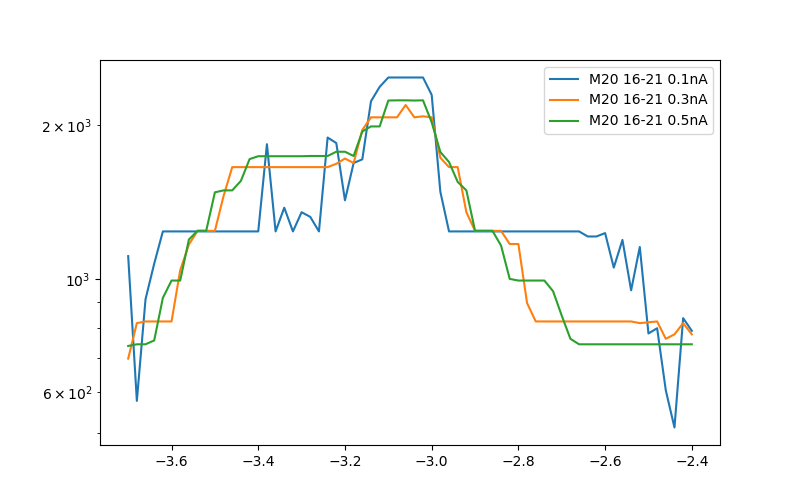

In [59]:
plt.figure(figsize=(8, 5))
plt.semilogy(gvals, np.abs(data55.lockin830_X[:]/0.1e-9), label='M20 16-21 0.1nA')
plt.semilogy(gvals, np.abs(data57.lockin830_X[:]/0.3e-9), label='M20 16-21 0.3nA')
plt.semilogy(gvals, np.abs(data56.lockin830_X[:]/0.5e-9), label='M20 16-21 0.5nA')
plt.legend()

In [60]:
lockin865.amplitude(0.015)
srframe.volt_p1(-3.7)
time.sleep(40)
gvals = np.linspace(-3.7, -2.4, 66)
data58, plot58 = npd.single_param_sweep(srframe.volt_p1, gvals, 10, lockin830.X, lockin830.Y, DataName='M20_16-21_830_baseT_disconnected_0.15nA_-25mT_zoom')
srframe.volt_p1(0)

Started at 2019-12-18 23:10:15
DataSet:
   location = 'data/2019-12-18/#014_M20_16-21_830_baseT_disconnected_0.15nA_-25mT_zoom_23-10-14'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (66,)
   Measured | lockin830_X         | X            | (66,)
   Measured | lockin830_Y         | Y            | (66,)
Finished at 2019-12-18 23:21:23


In [61]:
lockin865.amplitude(0.01)
srframe.volt_p1(-3.7)
time.sleep(40)
gvals = np.linspace(-3.7, -2.4, 66)
data59, plot59 = npd.single_param_sweep(srframe.volt_p1, gvals, 10, lockin830.X, lockin830.Y, DataName='M20_16-21_830_baseT_disconnected_0.1nA_-25mT_zoom_repeat')
srframe.volt_p1(0)

Started at 2019-12-18 23:22:16
DataSet:
   location = 'data/2019-12-18/#015_M20_16-21_830_baseT_disconnected_0.1nA_-25mT_zoom_repeat_23-22-15'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (66,)
   Measured | lockin830_X         | X            | (66,)
   Measured | lockin830_Y         | Y            | (66,)
Finished at 2019-12-18 23:33:24


<IPython.core.display.Javascript object>


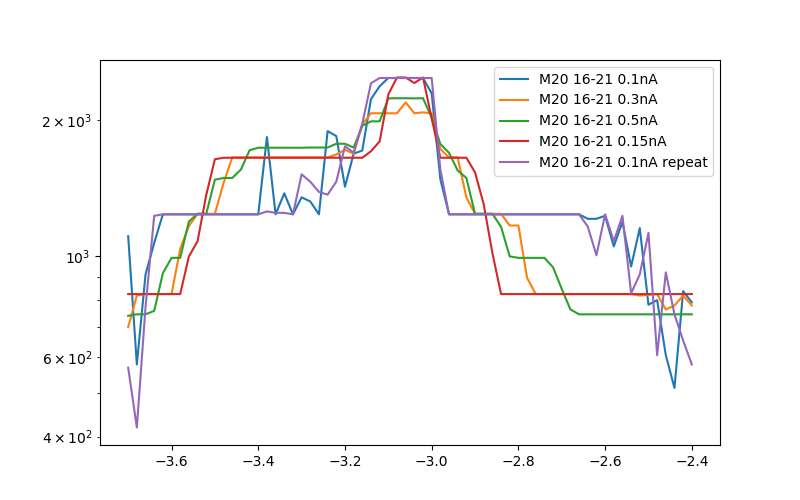

In [62]:
plt.figure(figsize=(8, 5))
plt.semilogy(gvals, np.abs(data55.lockin830_X[:]/0.1e-9), label='M20 16-21 0.1nA')
plt.semilogy(gvals, np.abs(data57.lockin830_X[:]/0.3e-9), label='M20 16-21 0.3nA')
plt.semilogy(gvals, np.abs(data56.lockin830_X[:]/0.5e-9), label='M20 16-21 0.5nA')
plt.semilogy(gvals, np.abs(data58.lockin830_X[:]/0.15e-9), label='M20 16-21 0.15nA')
plt.semilogy(gvals, np.abs(data59.lockin830_X[:]/0.1e-9), label='M20 16-21 0.1nA repeat')
plt.legend()

In [ ]:
srframe.volt_p1(-1.4)
triton.field(0.006)
srframe.volt_p5(2.5)
time.sleep(40)
offvals = np.linspace(2500e-3, -2500e-3, 126)
bvals = np.linspace(0.006, -0.007, 53)
data60, plot60 = npd.twod_param_sweep(triton.field_set_stable, bvals, srframe.volt_p5, offvals, lockin830.X, lockin830.Y, SetDelay1=30, SetDelay2=10, DataName='M20_16-21_830_Bsweep_vbg=-1.4V_AC0.1nAdvdi_baseT')
srframe.volt_p5(0)
srframe.volt_p1(0)

Sweep time approximately 19.096 seconds
Started at 2019-12-18 23:39:33
Please wait 10.006 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.072 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.078 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.066 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.06 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.084 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.072 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.078 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.072 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.054 seconds for the fiel

# testing superconducting dome. going to 60mT 0.5nA current. 14-15 on 865 and 16-21 on 830. 300ms Integration

In [12]:
gvals = np.linspace(-5, 5, 501)
bvals = np.linspace(-0.001, 0.059, 31)
data61, plot61 = npd.twod_param_sweep(triton.field_set_stable, bvals, srframe.volt_p1, gvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, SetDelay1=10, SetDelay2=3, Param2_SetBetween=-5, DataName='M20_16-21_830_14-15_865_baseT_disconnected_0.5nA_59mTto-1mT')
srframe.volt_p5(0)
srframe.volt_p1(0)

Started at 2019-12-19 14:59:43
Please wait 10.0 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.582 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.588 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.582 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.576 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.582 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.582 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.588 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.588 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.582 seconds for the field sweep, plus the time required for opera

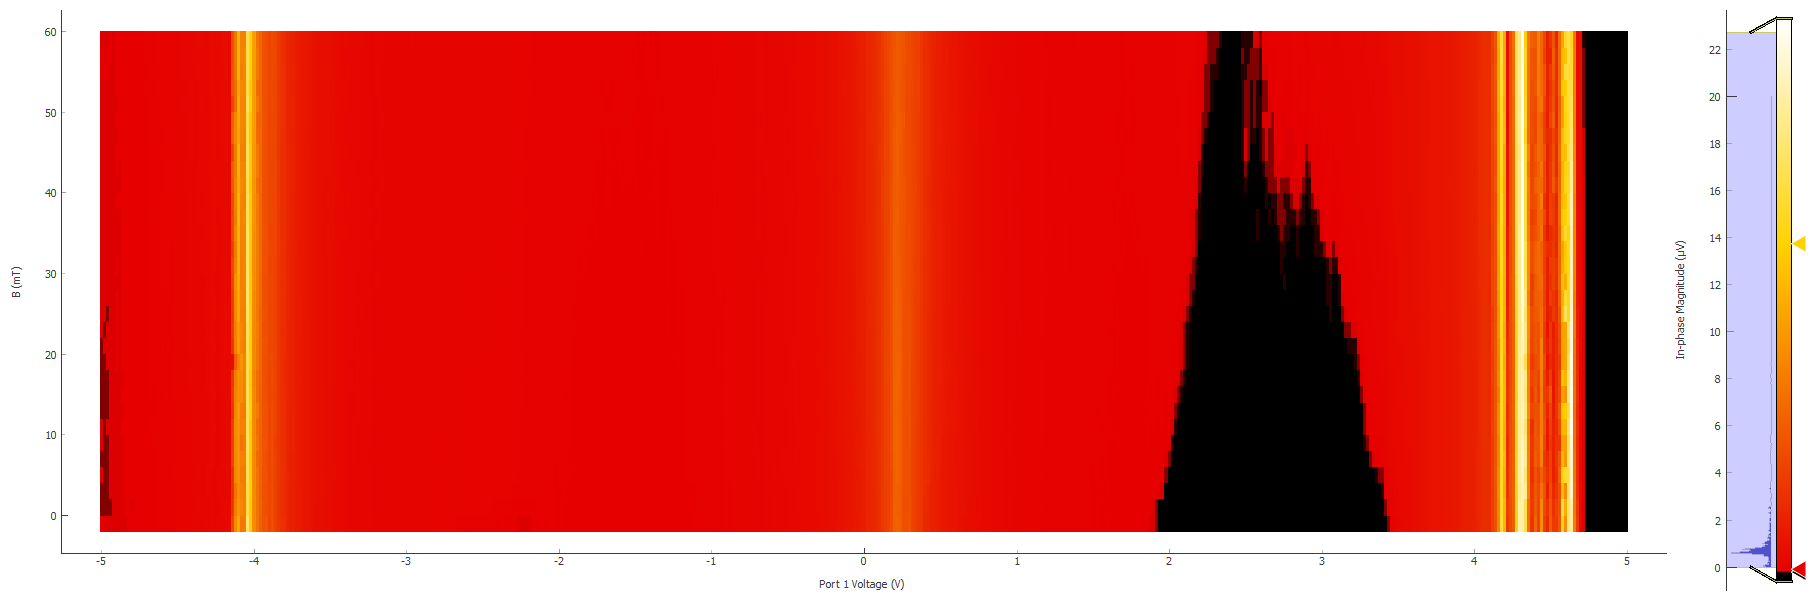

In [18]:
plot61[0]

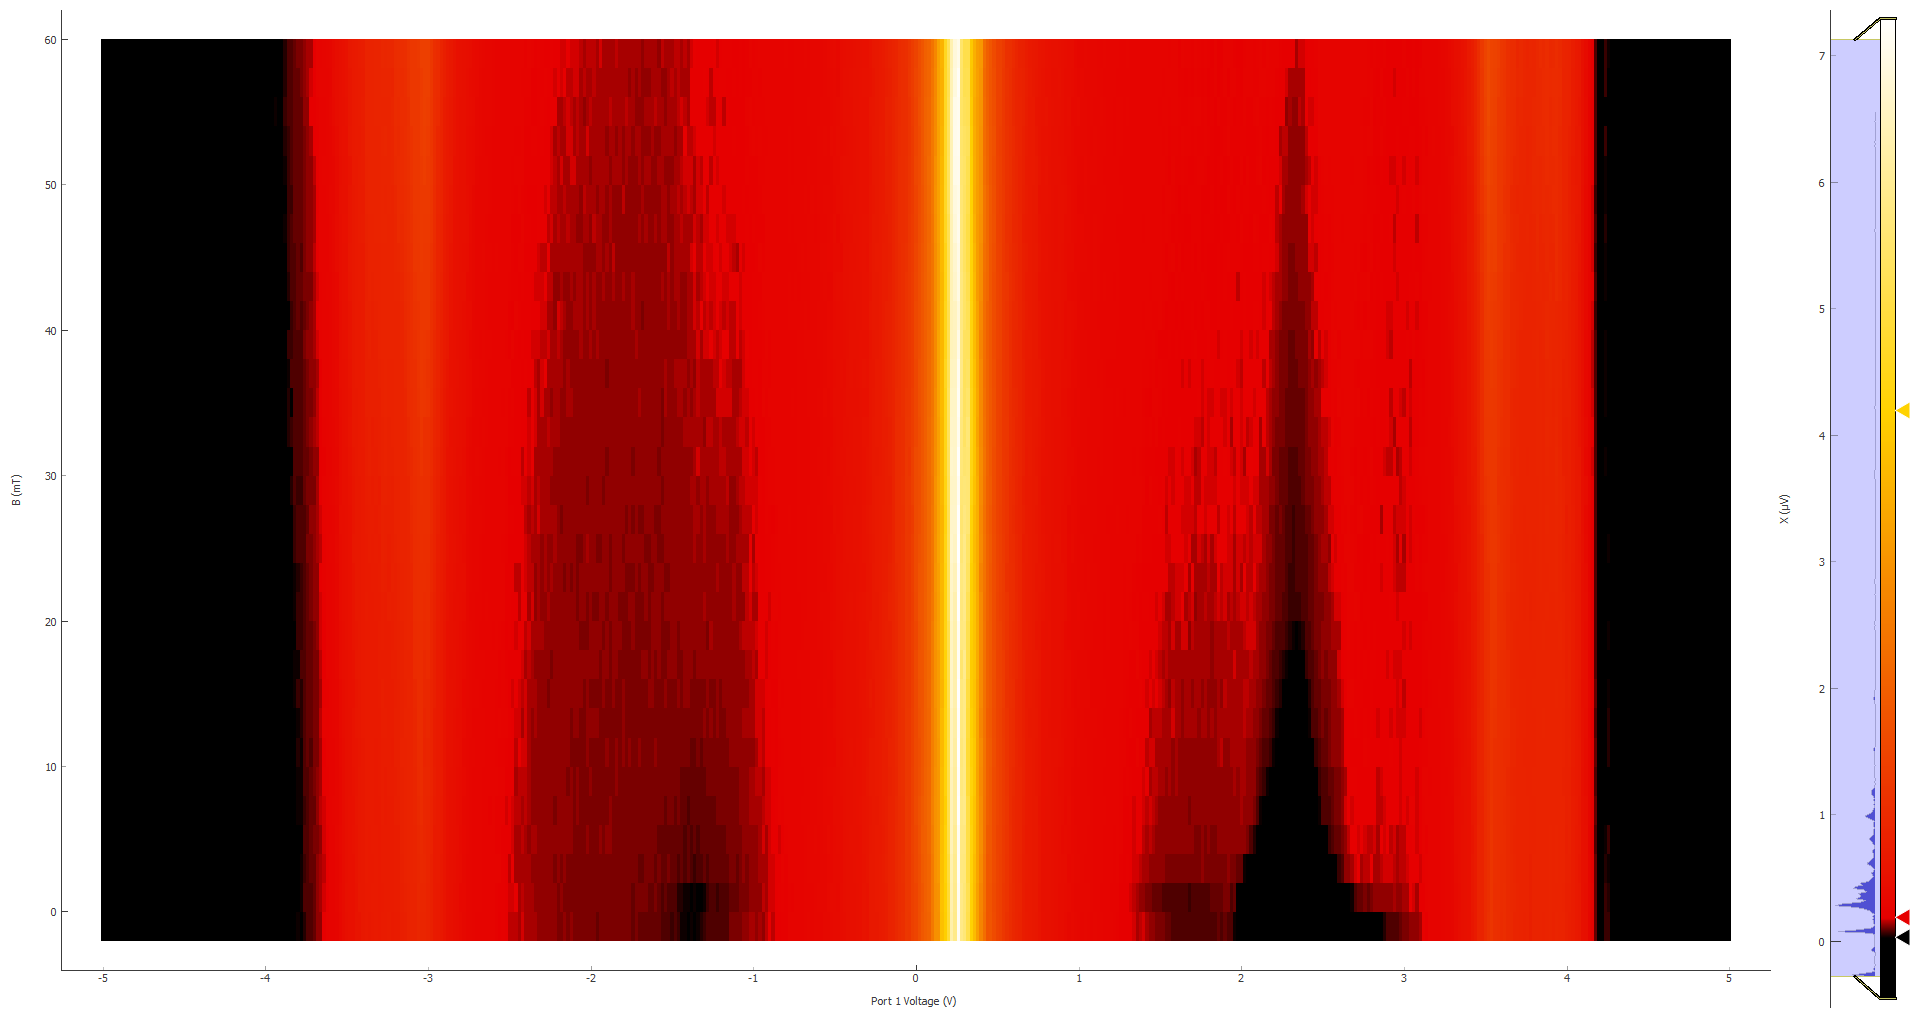

In [19]:
plot61[2]

In [13]:
gvals = np.linspace(-5, 5, 501)
bvals = np.linspace(-0.003, -0.021, 10)
data62, plot62 = npd.twod_param_sweep(triton.field_set_stable, bvals, srframe.volt_p1, gvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, SetDelay1=10, SetDelay2=3, Param2_SetBetween=-5, DataName='M20_16-21_830_14-15_865_baseT_disconnected_0.5nA_-3mTto-21mT')
srframe.volt_p5(0)
srframe.volt_p1(0)

Started at 2019-12-20 04:44:22
Please wait 28.144 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.588 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.588 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.588 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.582 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.588 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.588 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.588 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.582 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.618 seconds for the field sweep, plus the time required for ope

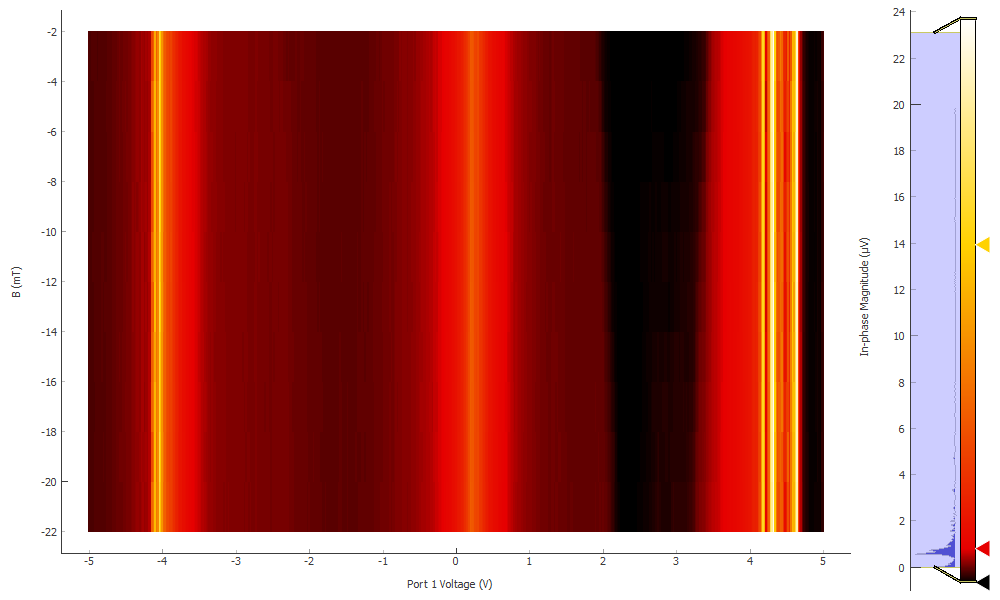

In [20]:
plot62[0]

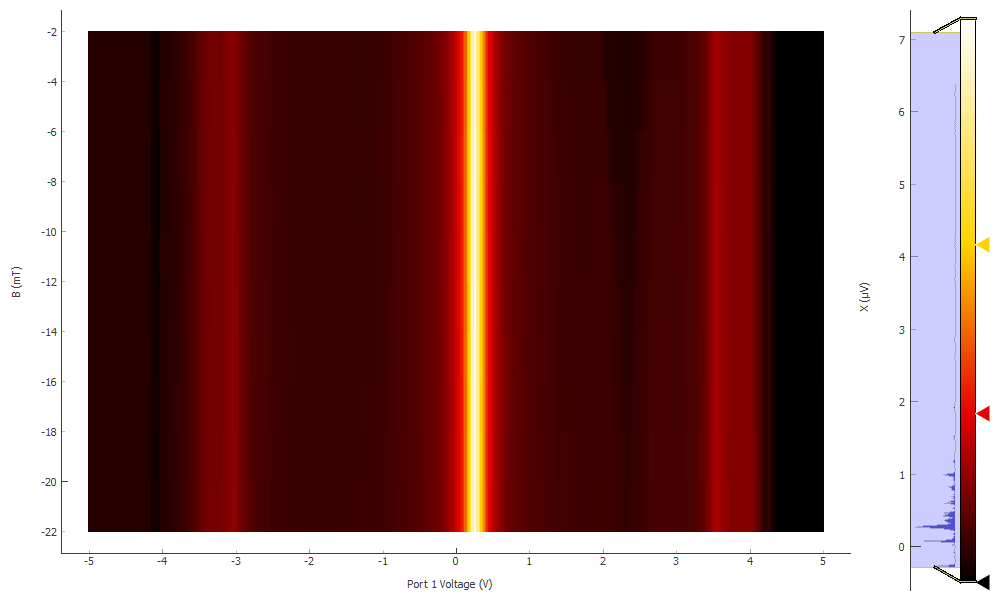

In [21]:
plot62[2]

# 1s sensitivity

In [14]:
gvals = np.linspace(-5, 5, 501)
bvals = np.linspace(-0.060, 0.060, 13)
data63, plot63 = npd.twod_param_sweep(triton.field_set_stable, bvals, srframe.volt_p1, gvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, SetDelay1=20, SetDelay2=10, Param2_SetBetween=-5, DataName='M20_16-21_830_14-15_865_baseT_disconnected_0.1nA_-60mTto60mT')
srframe.volt_p5(0)
srframe.volt_p1(0)

Started at 2019-12-20 12:22:09
Please wait 21.406 seconds for the field sweep, plus the time required for operating the switch...
Please wait 12.916 seconds for the field sweep, plus the time required for operating the switch...
Please wait 12.898 seconds for the field sweep, plus the time required for operating the switch...
Please wait 12.928 seconds for the field sweep, plus the time required for operating the switch...
DataSet:
   location = 'data/2019-12-20/#002_M20_16-21_830_14-15_865_baseT_disconnected_0.1nA_-60mTto60mT_12-22-07'
   <Type>   | <array_id>                  | <array.name>     | <array.shape>
   Setpoint | triton_field_set_stable_set | field_set_stable | (13,)
   Setpoint | srframe_volt_p1_set         | volt_p1          | (13, 501)
   Measured | lockin865_X                 | X                | (13, 501)
   Measured | lockin865_Y                 | Y                | (13, 501)
   Measured | lockin830_X                 | X                | (13, 501)
   Measured | locki

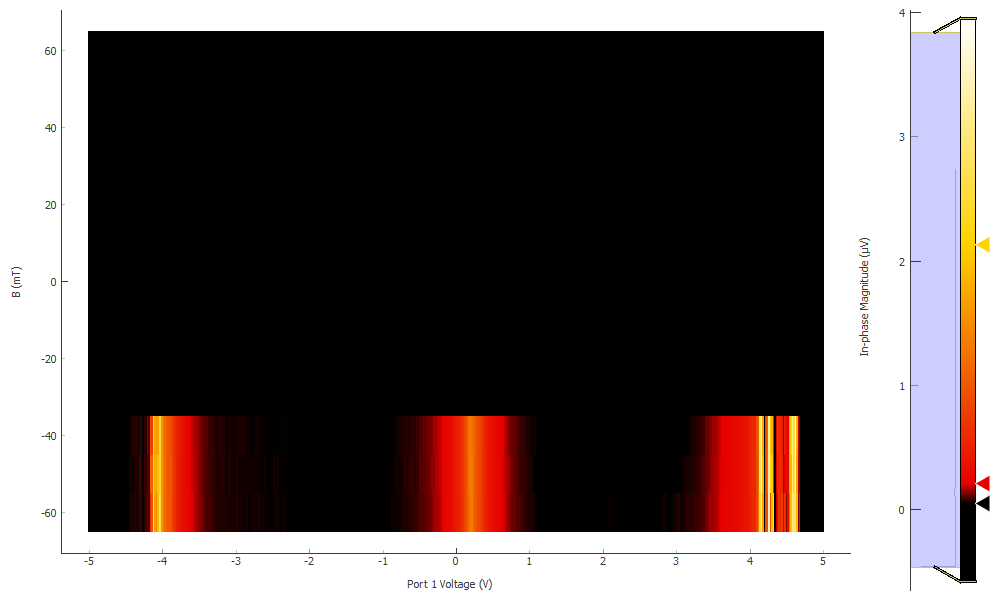

In [15]:
plot63[0]

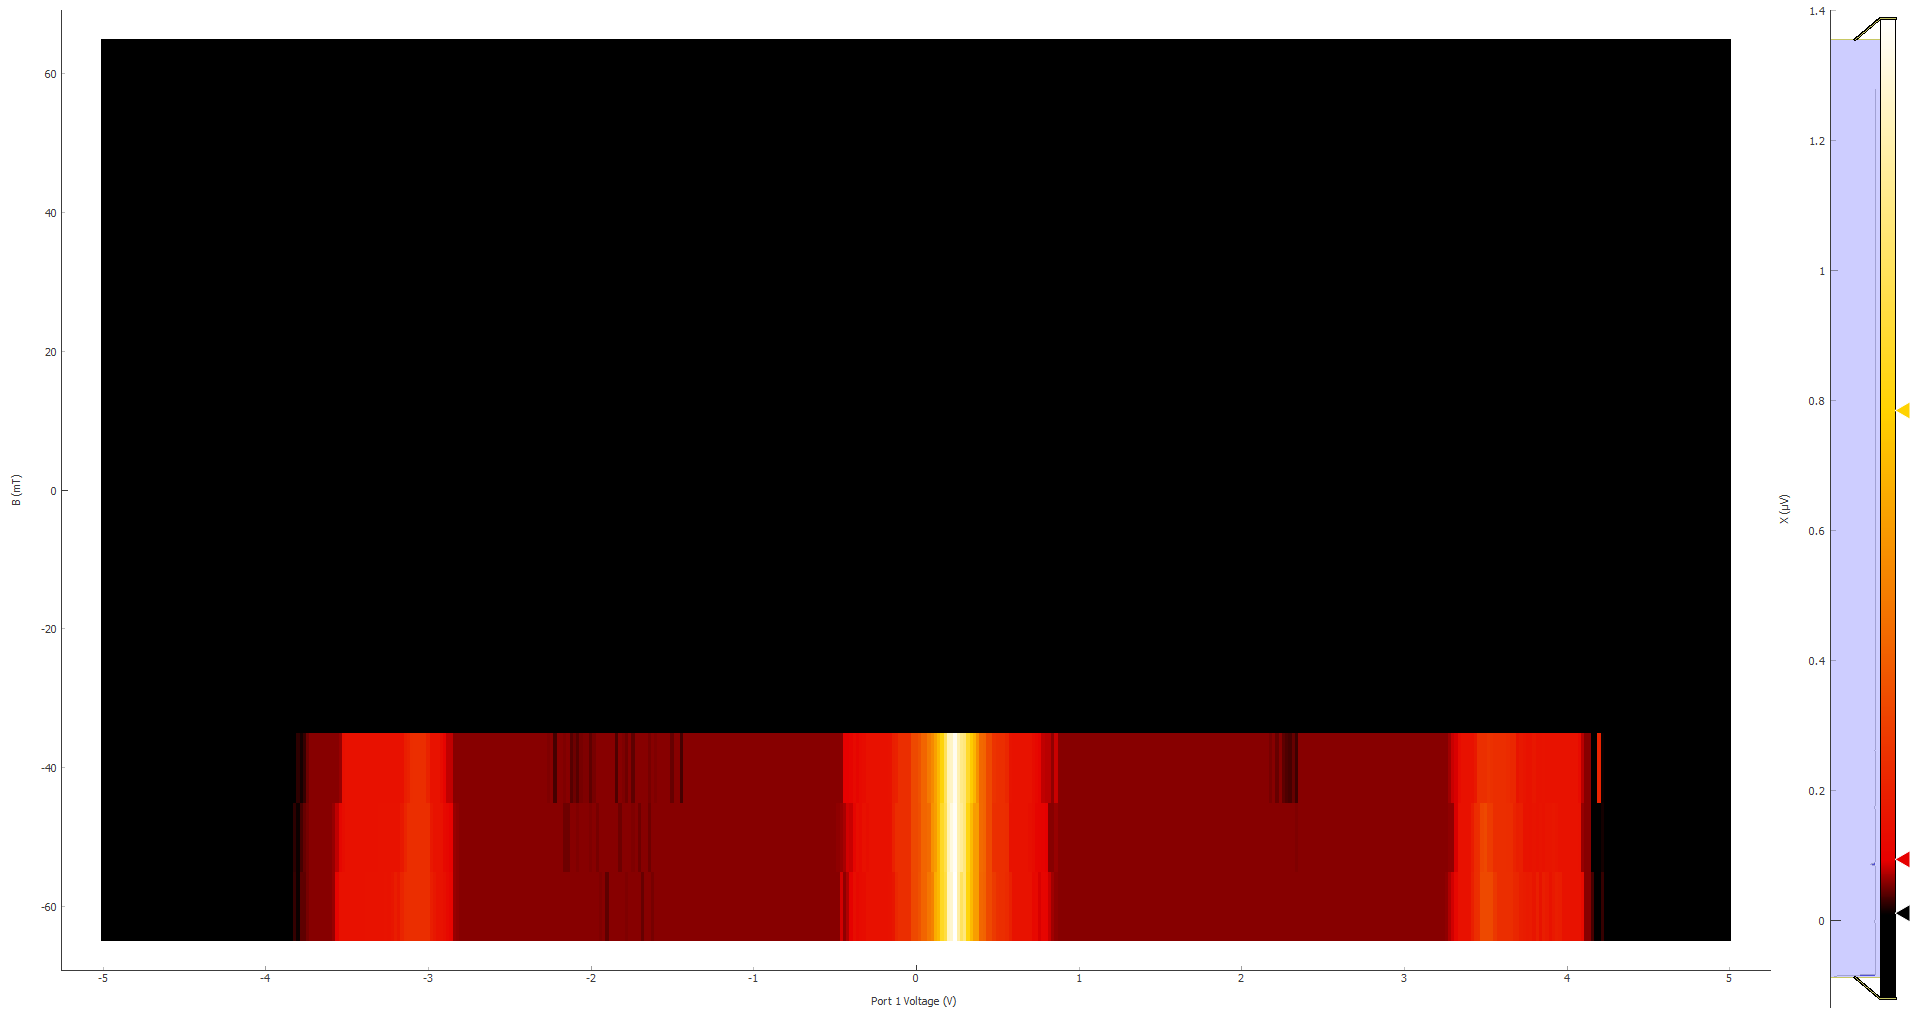

In [16]:
plot63[2]

# Fan diagram repeat. 300ms integration 2.15 s wait time 1nA excitation. 16-15 on 865 and 21-16 on 830. 13.7777 Hz

In [22]:
bvals = np.linspace(8, 0, 161)
gvals = np.linspace(-4, 4, 401)
data64, plot64 = npd.twod_param_sweep(triton.field_set_stable, bvals, srframe.volt_p1, gvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, SetDelay1=10, SetDelay2=2.15, Param2_SetBetween=-4, DataName='M20_865_16-15_830_16-21_twodfan_1nA')

Started at 2019-12-20 17:41:05
Please wait 4827.976 seconds for the field sweep, plus the time required for operating the switch...
Please wait 40.006 seconds for the field sweep, plus the time required for operating the switch...
DataSet:
   location = 'data/2019-12-20/#003_M20_865_16-15_830_16-21_twodfan_1nA_17-41-03'
   <Type>   | <array_id>                  | <array.name>     | <array.shape>
   Setpoint | triton_field_set_stable_set | field_set_stable | (161,)
   Setpoint | srframe_volt_p1_set         | volt_p1          | (161, 401)
   Measured | lockin865_X                 | X                | (161, 401)
   Measured | lockin865_Y                 | Y                | (161, 401)
   Measured | lockin830_X                 | X                | (161, 401)
   Measured | lockin830_Y                 | Y                | (161, 401)
Finished at 2019-12-20 22:50:08
Keyboard Interrupt


In [27]:
triton.field()

8.000014

In [26]:
triton.magnet_POC()

1

In [33]:
bvals = np.linspace(0, 6, 121)
gvals = np.linspace(-4, 4, 401)
data64, plot64 = npd.twod_param_sweep(triton.field_set_stable, bvals, srframe.volt_p1, gvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, SetDelay1=10, SetDelay2=2.15, Param2_SetBetween=-4, DataName='M20_865_16-15_830_16-21_twodfan_1nA_0Tto6T')

Started at 2019-12-21 15:16:13
Please wait 4810.0 seconds for the field sweep, plus the time required for operating the switch...
Please wait 40.018 seconds for the field sweep, plus the time required for operating the switch...
Please wait 40.006 seconds for the field sweep, plus the time required for operating the switch...
Please wait 39.988 seconds for the field sweep, plus the time required for operating the switch...
Please wait 39.994 seconds for the field sweep, plus the time required for operating the switch...
Please wait 39.994 seconds for the field sweep, plus the time required for operating the switch...
Please wait 39.994 seconds for the field sweep, plus the time required for operating the switch...
Please wait 39.994 seconds for the field sweep, plus the time required for operating the switch...
Please wait 40.0 seconds for the field sweep, plus the time required for operating the switch...
Please wait 40.012 seconds for the field sweep, plus the time required for opera

In [32]:
triton.magnet_POC()

1

In [34]:
lockin830.sensitivity(20e-6)
lockin865.sensitivity(20e-6)
lockin865.amplitude(0.04)
srframe.volt_p5(0)
srframe.volt_p1(2.3)

In [35]:
triton.magnet_POC(0)

In [36]:
triton.field(0)

Sweep time approximately 3610.0060000000003 seconds


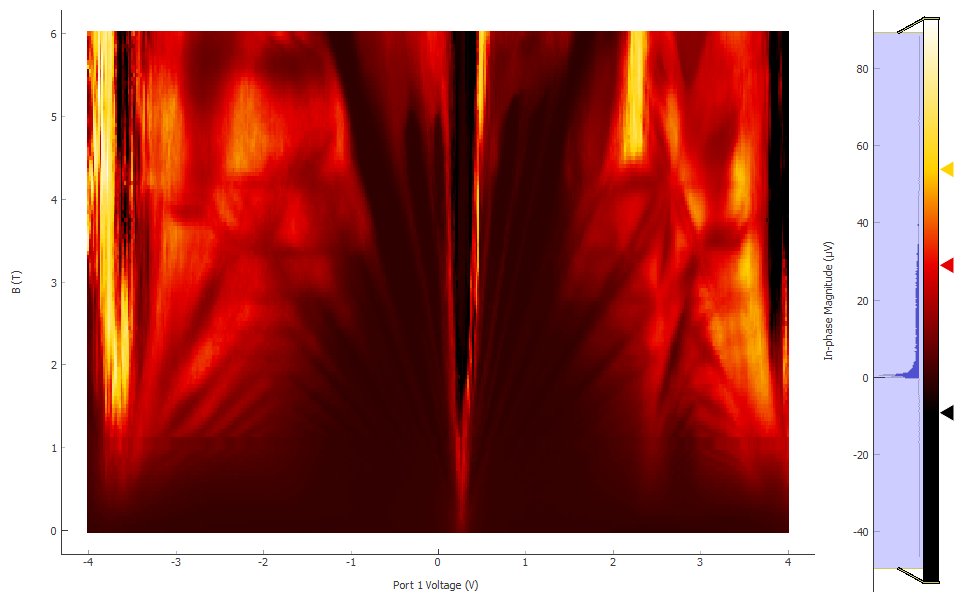

In [37]:
plot64[0]

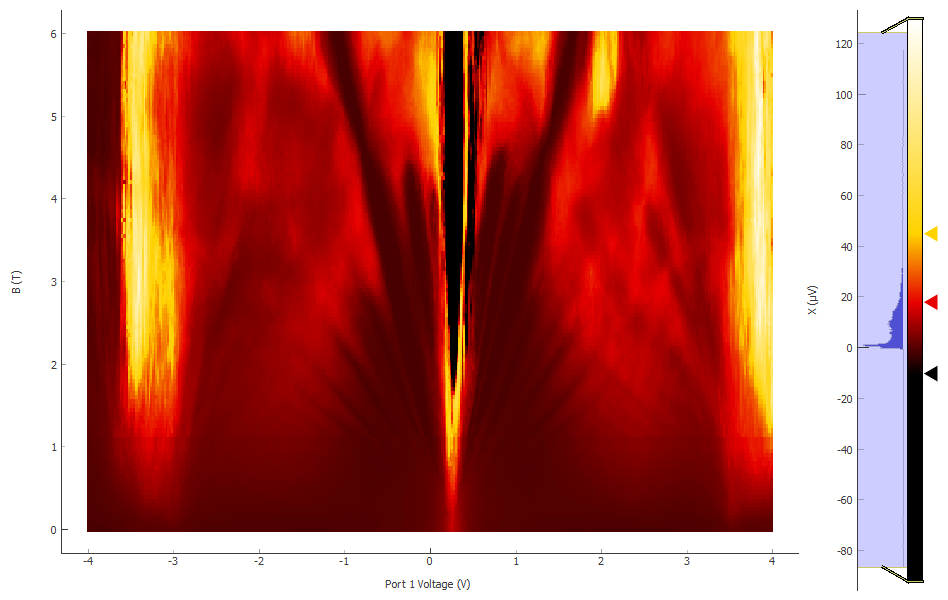

In [38]:
plot64[2]

In [39]:
srframe.volt_p1(2.3)
offvals = np.linspace(3400e-3, -3400e-3, 137)
bvals = np.linspace(0.015, -0.016, 125)
data65, plot65 = npd.twod_param_sweep(triton.field_set_stable, bvals, srframe.volt_p5, offvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, SetDelay1=12, SetDelay2=2.15, Param2_SetBetween=0, DataName='M20_16-15_865_16-21_830_Bsweep_vbg=2.3V_AC0.4nAdvdi_baseT')
srframe.volt_p5(0)
srframe.volt_p1(0)

Started at 2019-12-24 00:46:10
Please wait 3610.0060000000003 seconds for the field sweep, plus the time required for operating the switch...
Please wait 18.862000000000002 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.156 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.156 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.156 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.138 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.162 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.15 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.156 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.15 seconds for the field sweep, plus the

In [40]:
triton.field(0.5)

Sweep time approximately 319.6 seconds


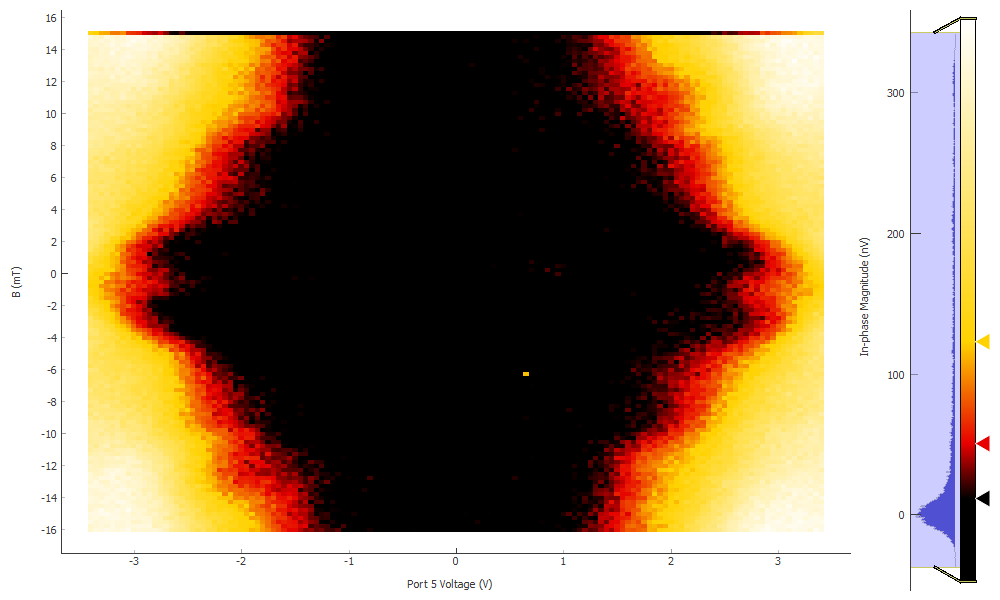

In [41]:
plot65[0]

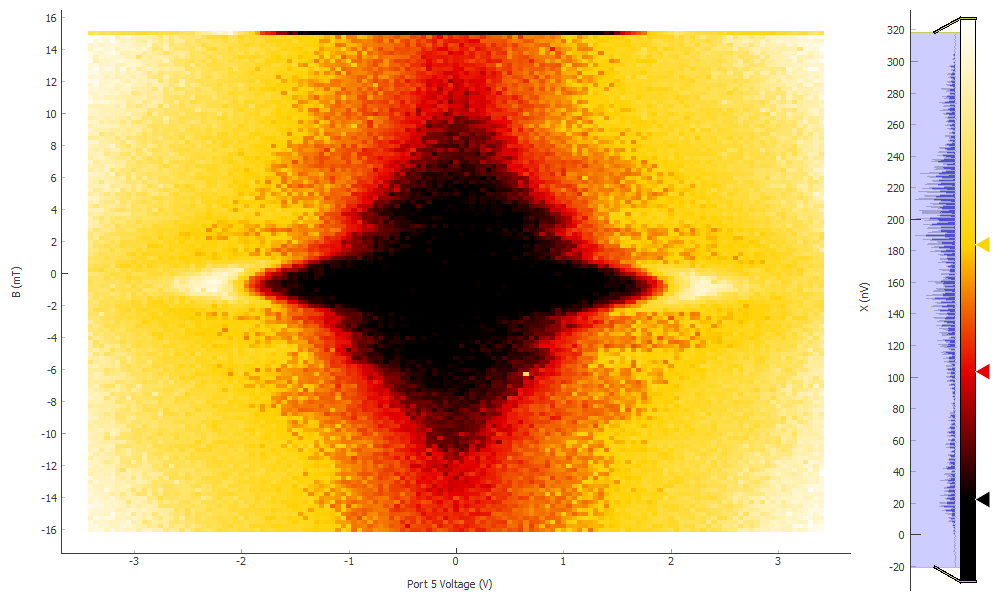

In [42]:
plot65[2]

# Temp sweep on 0.87 and 0.83 degrees

Despite what it says in the files, lockin865 measured 15-14 and lockin830 16-15

In [44]:
lockin865.amplitude(0.04)

In [46]:
srframe.volt_p1(-5)
time.sleep(10)
gval = np.linspace(-5, 5, 501)
data66, plot66 = npd.single_param_sweep(srframe.volt_p1, gval, 2.1, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, DataName='M20_15-16_865_15-14_830_gatesweepbasetemp_0p4nA', YParam=[lockin865.X, lockin830.X])
srframe.volt_p1(0)

Started at 2019-12-24 14:26:13
DataSet:
   location = 'data/2019-12-24/#003_M20_15-16_865_15-14_830_gatesweepbasetemp_0p4nA_14-26-12'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (501,)
   Measured | lockin865_X         | X            | (501,)
   Measured | lockin865_Y         | Y            | (501,)
   Measured | lockin830_X         | X            | (501,)
   Measured | lockin830_Y         | Y            | (501,)
Finished at 2019-12-24 14:44:56


In [49]:
triton.pid_setpoint(0.03)

In [48]:
triton.pid_mode(1)

In [50]:
triton.pid_range(1)

In [51]:
triton.pid_setpoint(0.05)

In [52]:
triton.pid_range(10)

In [53]:
Tvals = np.linspace(0.05, 1, 20)
gvals = np.linspace(-5, 5, 501)
data67, plot67 = npd.twod_param_sweep(triton.pid_setpoint, Tvals, srframe.volt_p1, gvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, SetDelay1=180, SetDelay2=2.1, Param2_SetBetween=0, DataName='M20_15-16_865_15-14_830_gateTsweepto1K_0p4nA', ZParam=[lockin865.X, lockin830.X])

Started at 2019-12-24 14:49:39
DataSet:
   location = 'data/2019-12-24/#004_M20_15-16_865_15-14_830_gateTsweepto1K_0p4nA_14-49-37'
   <Type>   | <array_id>              | <array.name> | <array.shape>
   Setpoint | triton_pid_setpoint_set | pid_setpoint | (20,)
   Setpoint | srframe_volt_p1_set     | volt_p1      | (20, 501)
   Measured | lockin865_X             | X            | (20, 501)
   Measured | lockin865_Y             | Y            | (20, 501)
   Measured | lockin830_X             | X            | (20, 501)
   Measured | lockin830_Y             | Y            | (20, 501)
Finished at 2019-12-24 22:04:42


In [54]:
triton.pid_range(31.6)
time.sleep(3)

In [55]:
Tvals = np.linspace(1.1, 1.4, 4)
gvals = np.linspace(-5, 5, 501)
data68, plot68 = npd.twod_param_sweep(triton.pid_setpoint, Tvals, srframe.volt_p1, gvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, SetDelay1=180, SetDelay2=2.1, Param2_SetBetween=0, DataName='M20_15-16_865_15-14_830_gateTsweep1p1to1p4K_0p4nA', ZParam=[lockin865.X, lockin830.X])

Started at 2019-12-24 22:04:47
DataSet:
   location = 'data/2019-12-24/#005_M20_15-16_865_15-14_830_gateTsweep1p1to1p4K_0p4nA_22-04-45'
   <Type>   | <array_id>              | <array.name> | <array.shape>
   Setpoint | triton_pid_setpoint_set | pid_setpoint | (4,)
   Setpoint | srframe_volt_p1_set     | volt_p1      | (4, 501)
   Measured | lockin865_X             | X            | (4, 501)
   Measured | lockin865_Y             | Y            | (4, 501)
   Measured | lockin830_X             | X            | (4, 501)
   Measured | lockin830_Y             | Y            | (4, 501)
Finished at 2019-12-24 23:31:39


In [56]:
triton.pid_range(100)
time.sleep(3)

In [57]:
Tvals = np.linspace(1.5, 2, 6)
gvals = np.linspace(-5, 5, 501)
data69, plot69 = npd.twod_param_sweep(triton.pid_setpoint, Tvals, srframe.volt_p1, gvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, SetDelay1=180, SetDelay2=2.1, Param2_SetBetween=0, DataName='M20_15-16_865_15-14_830_gateTsweep1p5to2K_0p4nA', ZParam=[lockin865.X, lockin830.X])

Started at 2019-12-24 23:31:44
DataSet:
   location = 'data/2019-12-24/#006_M20_15-16_865_15-14_830_gateTsweep1p5to2K_0p4nA_23-31-43'
   <Type>   | <array_id>              | <array.name> | <array.shape>
   Setpoint | triton_pid_setpoint_set | pid_setpoint | (6,)
   Setpoint | srframe_volt_p1_set     | volt_p1      | (6, 501)
   Measured | lockin865_X             | X            | (6, 501)
   Measured | lockin865_Y             | Y            | (6, 501)
   Measured | lockin830_X             | X            | (6, 501)
   Measured | lockin830_Y             | Y            | (6, 501)
Finished at 2019-12-25 01:42:12


In [58]:
triton.pid_mode(0)

In [59]:
triton.pid_mode(1)

In [60]:
triton.pid_setpoint(2)

In [61]:
triton.pid_range(100)

In [63]:
Tvals = np.linspace(2.2, 10, 40)
gvals = np.linspace(-5, 5, 501)
data70, plot70 = npd.twod_param_sweep(triton.pid_setpoint, Tvals, srframe.volt_p1, gvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, SetDelay1=180, SetDelay2=2.1, Param2_SetBetween=0, DataName='M20_15-16_865_15-14_830_gateTsweep2p2to10K_0p4nA', ZParam=[lockin865.X, lockin830.X])

Started at 2019-12-26 11:10:12
DataSet:
   location = 'data/2019-12-26/#001_M20_15-16_865_15-14_830_gateTsweep2p2to10K_0p4nA_11-10-10'
   <Type>   | <array_id>              | <array.name> | <array.shape>
   Setpoint | triton_pid_setpoint_set | pid_setpoint | (40,)
   Setpoint | srframe_volt_p1_set     | volt_p1      | (40, 501)
   Measured | lockin865_X             | X            | (40, 501)
   Measured | lockin865_Y             | Y            | (40, 501)
   Measured | lockin830_X             | X            | (40, 501)
   Measured | lockin830_Y             | Y            | (40, 501)
Finished at 2019-12-27 01:39:29


In [64]:
lockin865.time_constant(0.1)
lockin830.time_constant(0.1)

In [65]:
Tvals = np.linspace(11, 30, 20)
gvals = np.linspace(-5, 5, 501)
data71, plot71 = npd.twod_param_sweep(triton.pid_setpoint, Tvals, srframe.volt_p1, gvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, SetDelay1=240, SetDelay2=1, Param2_SetBetween=0, DataName='M20_15-16_865_15-14_830_gateTsweep11to30K_0p4nA', ZParam=[lockin865.X, lockin830.X])

Started at 2019-12-27 01:39:30
DataSet:
   location = 'data/2019-12-27/#001_M20_15-16_865_15-14_830_gateTsweep11to30K_0p4nA_01-39-29'
   <Type>   | <array_id>              | <array.name> | <array.shape>
   Setpoint | triton_pid_setpoint_set | pid_setpoint | (20,)
   Setpoint | srframe_volt_p1_set     | volt_p1      | (20, 501)
   Measured | lockin865_X             | X            | (20, 501)
   Measured | lockin865_Y             | Y            | (20, 501)
   Measured | lockin830_X             | X            | (20, 501)
   Measured | lockin830_Y             | Y            | (20, 501)
Finished at 2019-12-27 06:10:44


In [66]:
Tvals = np.linspace(31, 40, 10)
gvals = np.linspace(-5, 5, 501)
data72, plot72 = npd.twod_param_sweep(triton.pid_setpoint, Tvals, srframe.volt_p1, gvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, SetDelay1=240, SetDelay2=1, Param2_SetBetween=0, DataName='M20_15-16_865_15-14_830_gateTsweep31to40K_0p4nA', ZParam=[lockin865.X, lockin830.X])

Started at 2019-12-27 11:14:24
DataSet:
   location = 'data/2019-12-27/#002_M20_15-16_865_15-14_830_gateTsweep31to40K_0p4nA_11-14-22'
   <Type>   | <array_id>              | <array.name> | <array.shape>
   Setpoint | triton_pid_setpoint_set | pid_setpoint | (10,)
   Setpoint | srframe_volt_p1_set     | volt_p1      | (10, 501)
   Measured | lockin865_X             | X            | (10, 501)
   Measured | lockin865_Y             | Y            | (10, 501)
   Measured | lockin830_X             | X            | (10, 501)
   Measured | lockin830_Y             | Y            | (10, 501)
Finished at 2019-12-27 13:30:20


In [67]:
Tvals = np.linspace(41, 50, 10)
gvals = np.linspace(-5, 5, 501)
data73, plot73 = npd.twod_param_sweep(triton.pid_setpoint, Tvals, srframe.volt_p1, gvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, SetDelay1=300, SetDelay2=1, Param2_SetBetween=0, DataName='M20_15-16_865_15-14_830_gateTsweep41to50K_0p4nA', ZParam=[lockin865.X, lockin830.X])

Started at 2019-12-27 14:11:40
DataSet:
   location = 'data/2019-12-27/#003_M20_15-16_865_15-14_830_gateTsweep41to50K_0p4nA_14-11-39'
   <Type>   | <array_id>              | <array.name> | <array.shape>
   Setpoint | triton_pid_setpoint_set | pid_setpoint | (10,)
   Setpoint | srframe_volt_p1_set     | volt_p1      | (10, 501)
   Measured | lockin865_X             | X            | (10, 501)
   Measured | lockin865_Y             | Y            | (10, 501)
   Measured | lockin830_X             | X            | (10, 501)
   Measured | lockin830_Y             | Y            | (10, 501)
Finished at 2019-12-27 16:37:20


In [68]:
srframe.volt_p1(-5)
time.sleep(15)
gvals = np.linspace(-5, 5, 501)
data74, plot74 = npd.single_param_sweep(srframe.volt_p1, gvals, 2.1, lockin830.X, lockin830.Y, DataName='M20_16-21_830_50K_0.4nA')
srframe.volt_p1(0)

Started at 2019-12-27 17:00:35
DataSet:
   location = 'data/2019-12-27/#004_M20_16-21_830_50K_0.4nA_17-00-34'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (501,)
   Measured | lockin830_X         | X            | (501,)
   Measured | lockin830_Y         | Y            | (501,)
Finished at 2019-12-27 17:19:10


<IPython.core.display.Javascript object>


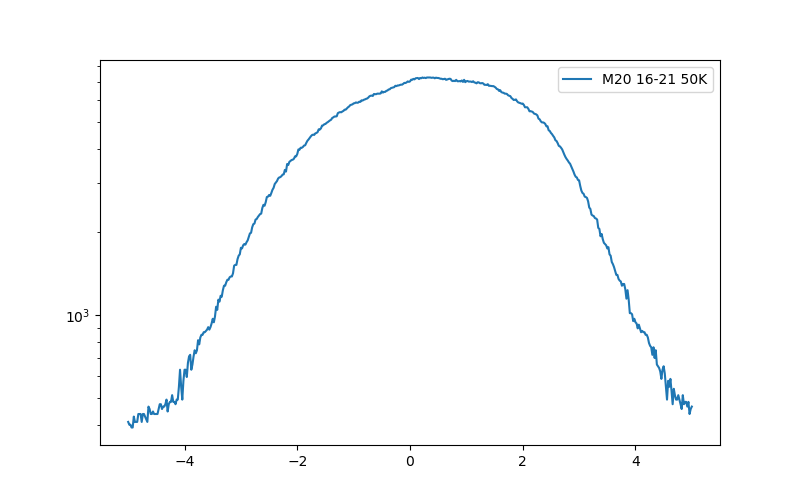

In [69]:
plt.figure(figsize=(8, 5))
plt.semilogy(gvals, np.abs(data74.lockin830_X[:]/0.4e-9), label='M20 16-21 50K')
plt.legend()

In [90]:
triton.read_temps()

MC - on:  0.0243546 K
MC_cernox - on:  321.181 K
still - on:  0.718366 K
cold_plate - off:  0.0630051 K
magnet - off:  4.45652 K
PT2h - on:  3.51411 K
PT2p - off:  3.70171 K
PT1h - off:  46.5149 K
PT1p - off:  61.6467 K


In [91]:
srframe.volt_p1(-4.5)
time.sleep(30)
gvals = np.linspace(-4.5, 4.5, 451)
data75, plot75 = npd.single_param_sweep(srframe.volt_p1, gvals, 7, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, DataName='M20_15-16_865_16-45_830_baseT_0.5Tcut_0.3nA')
srframe.volt_p1(0)

Started at 2019-12-28 10:37:37
DataSet:
   location = 'data/2019-12-28/#001_M20_15-16_865_16-45_830_baseT_0.5Tcut_0.3nA_10-37-36'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (451,)
   Measured | lockin865_X         | X            | (451,)
   Measured | lockin865_Y         | Y            | (451,)
   Measured | lockin830_X         | X            | (451,)
   Measured | lockin830_Y         | Y            | (451,)
Finished at 2019-12-28 11:31:44


<IPython.core.display.Javascript object>


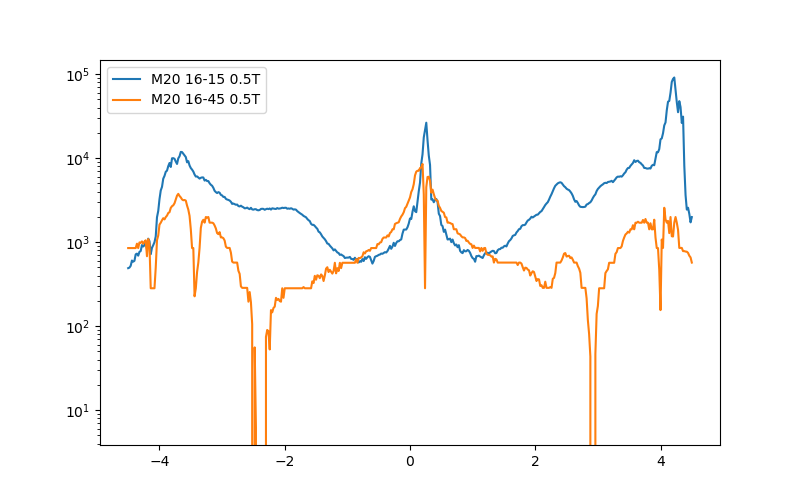

In [92]:
plt.figure(figsize=(8, 5))
plt.semilogy(gvals, np.abs(data75.lockin865_X[:]/0.3e-9), label='M20 16-15 0.5T')
plt.semilogy(gvals, np.abs(data75.lockin830_X[:]/0.3e-9), label='M20 16-45 0.5T')
plt.legend()

In [93]:
srframe.volt_p1(-4.5)
time.sleep(30)
gvals = np.linspace(-4.5, 4.5, 451)
data76, plot76 = npd.single_param_sweep(srframe.volt_p1, gvals, 7, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, DataName='M20_15-16_865_16-45_830_baseT_1Tcut_0.3nA')
srframe.volt_p1(0)

Started at 2019-12-28 12:01:59
DataSet:
   location = 'data/2019-12-28/#002_M20_15-16_865_16-45_830_baseT_1Tcut_0.3nA_12-01-57'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (451,)
   Measured | lockin865_X         | X            | (451,)
   Measured | lockin865_Y         | Y            | (451,)
   Measured | lockin830_X         | X            | (451,)
   Measured | lockin830_Y         | Y            | (451,)
Finished at 2019-12-28 12:55:58


<IPython.core.display.Javascript object>


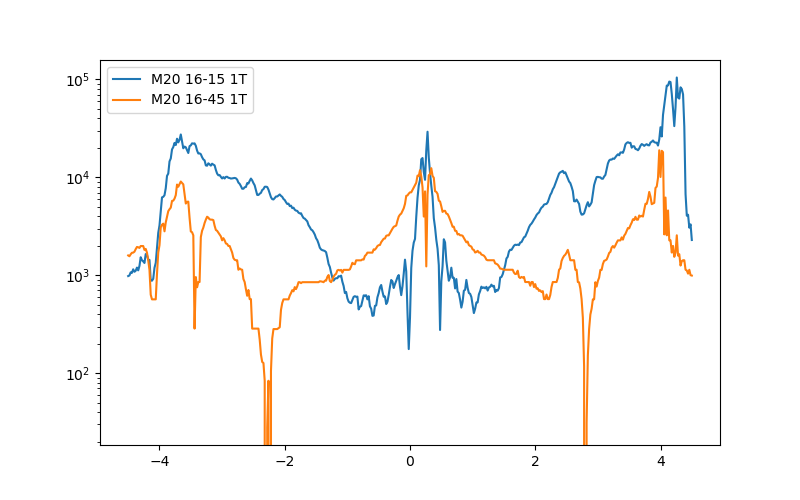

In [94]:
plt.figure(figsize=(8, 5))
plt.semilogy(gvals, np.abs(data76.lockin865_X[:]/0.3e-9), label='M20 16-15 1T')
plt.semilogy(gvals, np.abs(data76.lockin830_X[:]/0.3e-9), label='M20 16-45 1T')
plt.legend()

In [95]:
bvals = np.linspace(1.5, 2, 2)
gvals = np.linspace(-4.5, 4.5, 451)
data77, plot77 = npd.twod_param_sweep(triton.field_set_stable, bvals, srframe.volt_p1, gvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, SetDelay1=30, SetDelay2=7, Param2_SetBetween=-4.5, DataName='M20_865_16-15_830_16-45_0.3nA_1.5Tand2Tcuts')
srframe.volt_p1(0)

Started at 2019-12-28 12:56:10
Please wait 309.994 seconds for the field sweep, plus the time required for operating the switch...
Please wait 309.988 seconds for the field sweep, plus the time required for operating the switch...
DataSet:
   location = 'data/2019-12-28/#003_M20_865_16-15_830_16-45_0.3nA_1.5Tand2Tcuts_12-56-07'
   <Type>   | <array_id>                  | <array.name>     | <array.shape>
   Setpoint | triton_field_set_stable_set | field_set_stable | (2,)
   Setpoint | srframe_volt_p1_set         | volt_p1          | (2, 451)
   Measured | lockin865_X                 | X                | (2, 451)
   Measured | lockin865_Y                 | Y                | (2, 451)
   Measured | lockin830_X                 | X                | (2, 451)
   Measured | lockin830_Y                 | Y                | (2, 451)
Finished at 2019-12-28 15:18:05


In [96]:
gvals = np.linspace(3.9, 5, 166)
bvals = np.linspace(4, 0, 81)
data78, plot78 = npd.twod_param_sweep(triton.field_set_stable, bvals, srframe.volt_p1, gvals, lockin865.X, lockin865.Y, lockin865.R, lockin830.X, lockin830.Y, lockin830.R, SetDelay1=10, SetDelay2=1, DataName='M20_14_15_865and16_21_830_4to0T_3nA_3.9to5Vgate')
srframe.volt_p5(0)
srframe.volt_p1(0)

Started at 2019-12-28 15:31:24
Please wait 1209.988 seconds for the field sweep, plus the time required for operating the switch...
Please wait 39.994 seconds for the field sweep, plus the time required for operating the switch...
Please wait 40.0 seconds for the field sweep, plus the time required for operating the switch...
Please wait 40.0 seconds for the field sweep, plus the time required for operating the switch...
Please wait 40.0 seconds for the field sweep, plus the time required for operating the switch...
Please wait 40.012 seconds for the field sweep, plus the time required for operating the switch...
Please wait 40.0 seconds for the field sweep, plus the time required for operating the switch...
Please wait 40.012 seconds for the field sweep, plus the time required for operating the switch...
Please wait 40.006 seconds for the field sweep, plus the time required for operating the switch...
Please wait 40.006 seconds for the field sweep, plus the time required for operating

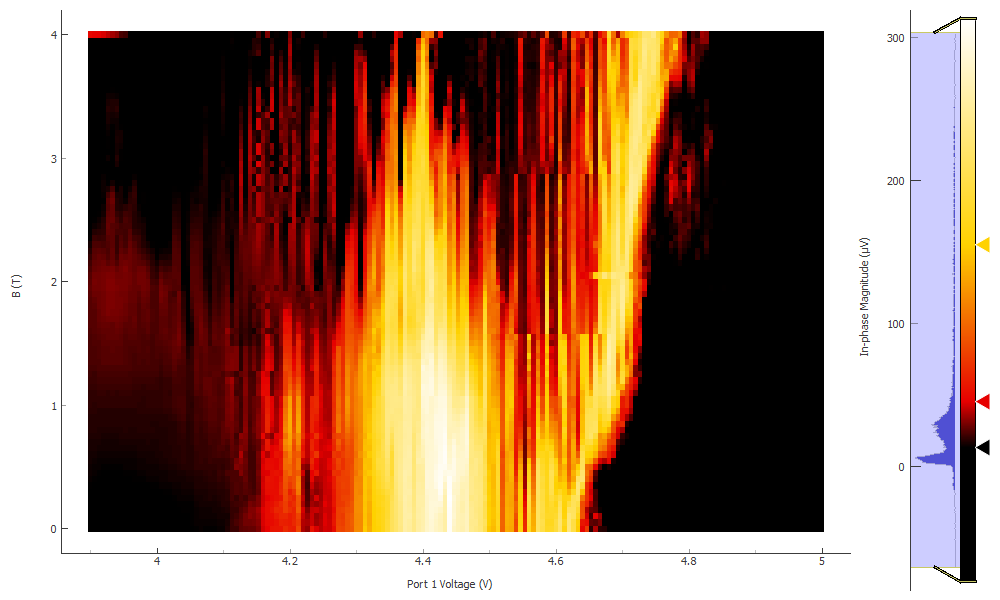

In [97]:
plot78[0]

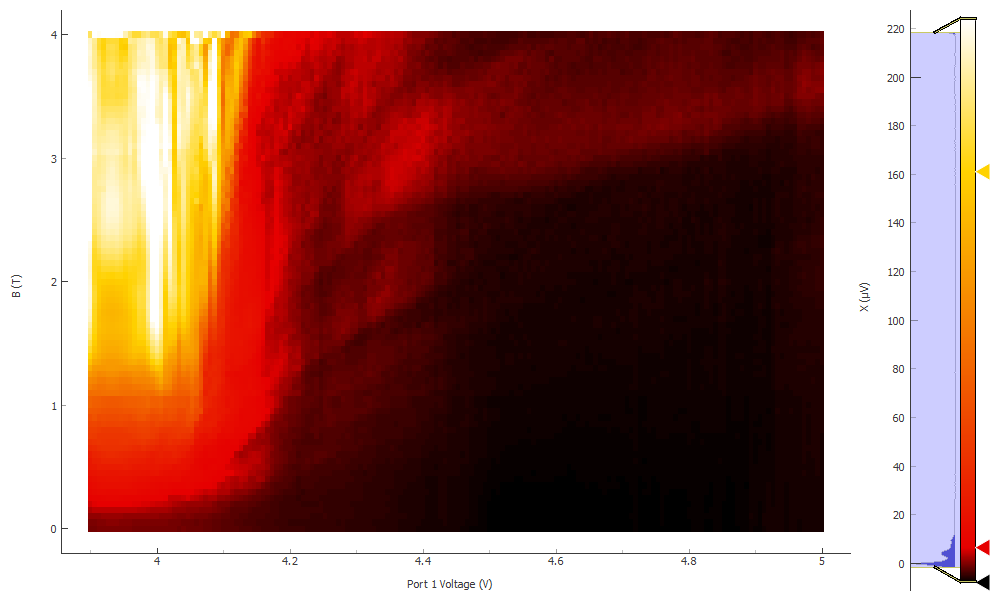

In [98]:
plot78[3]

In [99]:
lockin865.amplitude(0.1)
gvals = np.linspace(-5, 5, 1501)
bvals = np.linspace(1.2, 0.7, 11)
data79, plot79 = npd.twod_param_sweep(triton.field_set_stable, bvals, srframe.volt_p1, gvals, lockin865.X, lockin865.Y, lockin865.R, lockin830.X, lockin830.Y, lockin830.R, SetDelay1=10, SetDelay2=1, Param2_SetBetween=-5, DataName='M20_14_15_865and16_21_830_1.2Tto0.7T_1nA_-5Vto5Vgate')
srframe.volt_p5(0)
srframe.volt_p1(0)

Started at 2019-12-28 21:12:34
Please wait 730.006 seconds for the field sweep, plus the time required for operating the switch...
Please wait 40.006 seconds for the field sweep, plus the time required for operating the switch...
Please wait 40.012 seconds for the field sweep, plus the time required for operating the switch...
Please wait 69.4 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.606 seconds for the field sweep, plus the time required for operating the switch...
Please wait 40.0 seconds for the field sweep, plus the time required for operating the switch...
Please wait 40.012 seconds for the field sweep, plus the time required for operating the switch...
Please wait 40.0 seconds for the field sweep, plus the time required for operating the switch...
Please wait 40.006 seconds for the field sweep, plus the time required for operating the switch...
Please wait 40.0 seconds for the field sweep, plus the time required for operating 

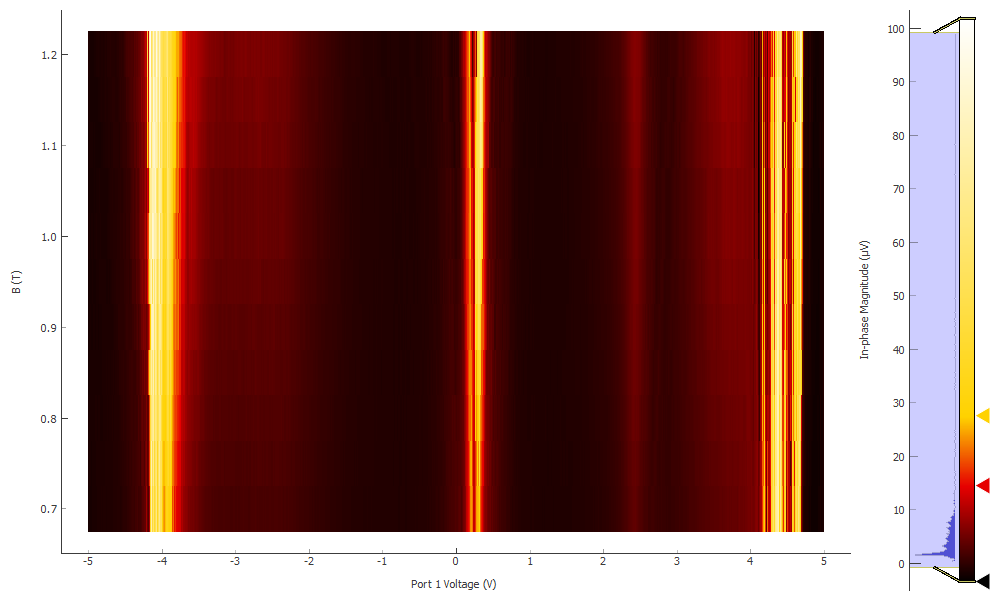

In [100]:
plot79[0]

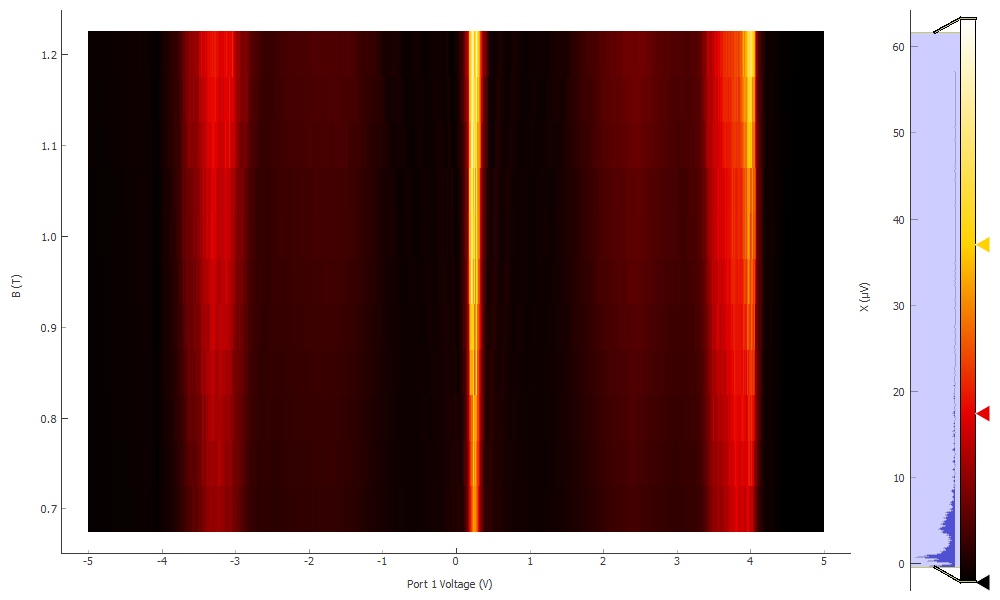

In [101]:
plot79[3]

In [102]:
triton.field(-0.001)
triton.magnet_swh(0)

Sweep time approximately 430.594 seconds
Wait 5 min for the switch to cool


In [103]:
srframe.volt_p1(-4.5)
time.sleep(20)
gvals = np.linspace(-4.5, 4.5, 451)
data80, plot80 = npd.single_param_sweep(srframe.volt_p1, gvals, 7, lockin865.X, lockin865.Y, DataName='M20_14-15_865_baseT_-1mT_0.1nA_1slockin')
srframe.volt_p1(0)

Started at 2019-12-29 10:24:24
DataSet:
   location = 'data/2019-12-29/#001_M20_14-15_865_baseT_-1mT_0.1nA_1slockin_10-24-12'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (451,)
   Measured | lockin865_X         | X            | (451,)
   Measured | lockin865_Y         | Y            | (451,)
Finished at 2019-12-29 11:17:54


In [104]:
lockin865.amplitude(0.03)

In [105]:
srframe.volt_p1(-4.5)
time.sleep(20)
gvals = np.linspace(-4.5, 4.5, 451)
data81, plot81 = npd.single_param_sweep(srframe.volt_p1, gvals, 7, lockin865.X, lockin865.Y, DataName='M20_14-15_865_baseT_-1mT_0.3nA_1slockin')
srframe.volt_p1(0)

Started at 2019-12-29 11:18:32
DataSet:
   location = 'data/2019-12-29/#002_M20_14-15_865_baseT_-1mT_0.3nA_1slockin_11-18-31'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (451,)
   Measured | lockin865_X         | X            | (451,)
   Measured | lockin865_Y         | Y            | (451,)
Finished at 2019-12-29 12:12:11


In [106]:
lockin865.amplitude(0.05)

In [107]:
srframe.volt_p1(-4.5)
time.sleep(20)
gvals = np.linspace(-4.5, 4.5, 451)
data82, plot82 = npd.single_param_sweep(srframe.volt_p1, gvals, 7, lockin865.X, lockin865.Y, DataName='M20_14-15_865_baseT_-1mT_0.5nA_1slockin')
srframe.volt_p1(0)

Started at 2019-12-29 12:12:49
DataSet:
   location = 'data/2019-12-29/#003_M20_14-15_865_baseT_-1mT_0.5nA_1slockin_12-12-48'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (451,)
   Measured | lockin865_X         | X            | (451,)
   Measured | lockin865_Y         | Y            | (451,)
Finished at 2019-12-29 13:06:18


<IPython.core.display.Javascript object>


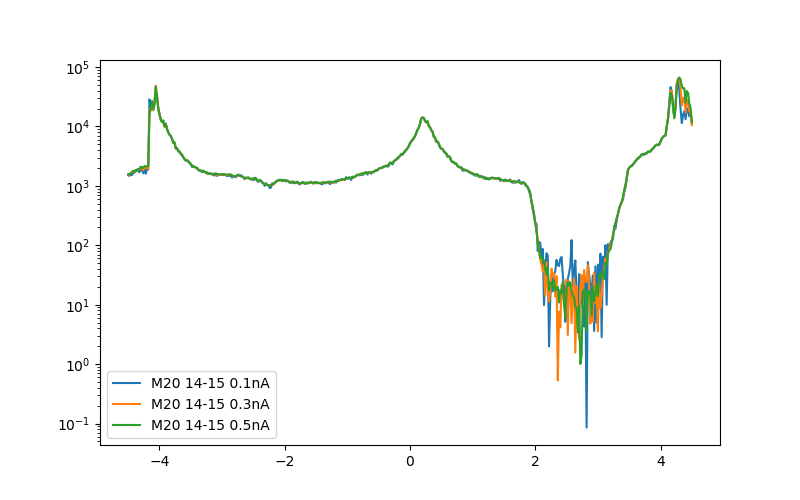

In [108]:
plt.figure(figsize=(8, 5))
plt.semilogy(gvals, np.abs(data80.lockin865_X[:]/0.1e-9), label='M20 14-15 0.1nA')
plt.semilogy(gvals, np.abs(data81.lockin865_X[:]/0.3e-9), label='M20 14-15 0.3nA')
plt.semilogy(gvals, np.abs(data82.lockin865_X[:]/0.5e-9), label='M20 14-15 0.5nA')
plt.legend()

In [109]:
lockin865.amplitude(0.1)

In [110]:
srframe.volt_p1(-4.5)
time.sleep(20)
gvals = np.linspace(-4.5, 4.5, 451)
data83, plot83 = npd.single_param_sweep(srframe.volt_p1, gvals, 7, lockin865.X, lockin865.Y, DataName='M20_14-15_865_baseT_-1mT_1nA_1slockin')
srframe.volt_p1(0)

Started at 2019-12-29 13:06:57
DataSet:
   location = 'data/2019-12-29/#004_M20_14-15_865_baseT_-1mT_1nA_1slockin_13-06-56'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (451,)
   Measured | lockin865_X         | X            | (451,)
   Measured | lockin865_Y         | Y            | (451,)
Finished at 2019-12-29 14:00:34


<IPython.core.display.Javascript object>


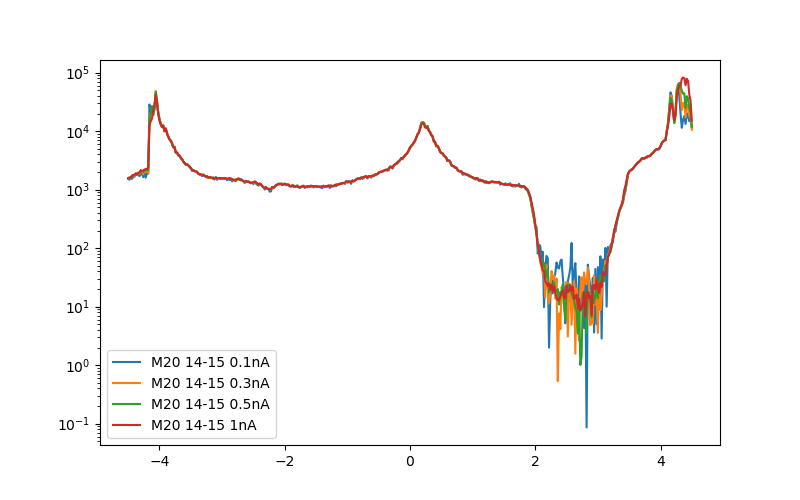

In [111]:
plt.figure(figsize=(8, 5))
plt.semilogy(gvals, np.abs(data80.lockin865_X[:]/0.1e-9), label='M20 14-15 0.1nA')
plt.semilogy(gvals, np.abs(data81.lockin865_X[:]/0.3e-9), label='M20 14-15 0.3nA')
plt.semilogy(gvals, np.abs(data82.lockin865_X[:]/0.5e-9), label='M20 14-15 0.5nA')
plt.semilogy(gvals, np.abs(data83.lockin865_X[:]/1e-9), label='M20 14-15 1nA')
plt.legend()

In [112]:
srframe.volt_p1(2.3)
offvals = np.linspace(2800e-3, -2800e-3, 113)
bvals = np.linspace(0.010, -0.011, 85)
data84, plot84 = npd.twod_param_sweep(triton.field_set_stable, bvals, srframe.volt_p5, offvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, SetDelay1=12, SetDelay2=7, Param2_SetBetween=0, DataName='M20_14-15_865_16-21_830_Bsweep_vbg=2.3V_AC1nAdvdi_baseT')
srframe.volt_p5(0)
srframe.volt_p1(0)

Started at 2019-12-29 14:14:33
Please wait 16.594 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.126 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.15 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.138 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.144 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.144 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.162 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.174 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.144 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.168 seconds for the field sweep, plus the time required for oper

Start at 10K and work up to 40 or 50K for the low angle (21-16)

In [117]:
triton.pid_mode(1)

In [118]:
triton.pid_setpoint(0.1)

In [119]:
triton.pid_range(10)

In [122]:
triton.pid_range(31.6)

In [124]:
triton.pid_setpoint(1.5)

In [125]:
triton.pid_range(100)

In [126]:
triton.pid_setpoint(2)

In [127]:
triton.pid_mode(0)

In [128]:
triton.pid_mode(1)
triton.pid_setpoint(2)

In [129]:
triton.pid_range(31.6)

In [130]:
triton.pid_setpoint(6)

In [131]:
triton.pid_range(100)

In [132]:
triton.pid_setpoint(10)

In [133]:
gvals = np.linspace(-4.5, 4.7, 461)
Tvals = np.linspace(10, 30, 21)
data85, plot85 = npd.twod_param_sweep(triton.pid_setpoint, Tvals, srframe.volt_p1, gvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, SetDelay1=240, SetDelay2=1, Param2_SetBetween=0, DataName='M20_15-14_865_21-16_830_gateTsweep10to30K_0p4nA', ZParam=[lockin865.X, lockin830.X])

Started at 2019-12-30 14:59:56
DataSet:
   location = 'data/2019-12-30/#001_M20_15-14_865_21-16_830_gateTsweep10to30K_0p4nA_14-59-55'
   <Type>   | <array_id>              | <array.name> | <array.shape>
   Setpoint | triton_pid_setpoint_set | pid_setpoint | (21,)
   Setpoint | srframe_volt_p1_set     | volt_p1      | (21, 461)
   Measured | lockin865_X             | X            | (21, 461)
   Measured | lockin865_Y             | Y            | (21, 461)
   Measured | lockin830_X             | X            | (21, 461)
   Measured | lockin830_Y             | Y            | (21, 461)
Finished at 2019-12-30 19:28:48


In [134]:
gvals = np.linspace(-4.5, 4.7, 461)
Tvals = np.linspace(31, 50, 20)
data86, plot86 = npd.twod_param_sweep(triton.pid_setpoint, Tvals, srframe.volt_p1, gvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, SetDelay1=600, SetDelay2=1, Param2_SetBetween=0, DataName='M20_15-14_865_21-16_830_gateTsweep31to50K_0p4nA', ZParam=[lockin865.X, lockin830.X])

Started at 2019-12-30 19:28:50
DataSet:
   location = 'data/2019-12-30/#002_M20_15-14_865_21-16_830_gateTsweep31to50K_0p4nA_19-28-49'
   <Type>   | <array_id>              | <array.name> | <array.shape>
   Setpoint | triton_pid_setpoint_set | pid_setpoint | (20,)
   Setpoint | srframe_volt_p1_set     | volt_p1      | (20, 461)
   Measured | lockin865_X             | X            | (20, 461)
   Measured | lockin865_Y             | Y            | (20, 461)
   Measured | lockin830_X             | X            | (20, 461)
   Measured | lockin830_Y             | Y            | (20, 461)
Finished at 2019-12-31 01:44:56


# Connected Preamp 560 to lockin 830. Gain 100

In [136]:
srframe.volt_p1(-4)
time.sleep(50)
gvals = np.linspace(-4, 4, 401)
data87, plot87 = npd.single_param_sweep(srframe.volt_p1, gvals, 10, lockin830.X, lockin830.Y, DataName='M20_16-21_830_baseT_-1mT_0.1nA_1slockin_Preamp')
srframe.volt_p1(0)

Started at 2020-01-02 18:06:06
DataSet:
   location = 'data/2020-01-02/#002_M20_16-21_830_baseT_-1mT_0.1nA_1slockin_Preamp_18-06-06'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (401,)
   Measured | lockin830_X         | X            | (401,)
   Measured | lockin830_Y         | Y            | (401,)
Finished at 2020-01-02 19:13:57


In [137]:
srframe.volt_p1(-4)
srframe.volt_p5(1.4)
time.sleep(50)
gvals = np.linspace(-4, 4, 401)
data88, plot88 = npd.single_param_sweep(srframe.volt_p1, gvals, 10, lockin830.X, lockin830.Y, DataName='M20_16-21_830_baseT_-1mT_0.1nA_14nA_DC_1slockin_Preamp')
srframe.volt_p1(0)
srframe.volt_p5(0)

Started at 2020-01-02 19:15:06
DataSet:
   location = 'data/2020-01-02/#003_M20_16-21_830_baseT_-1mT_0.1nA_14nA_DC_1slockin_Preamp_19-15-05'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (401,)
   Measured | lockin830_X         | X            | (401,)
   Measured | lockin830_Y         | Y            | (401,)
Finished at 2020-01-02 20:22:50


<IPython.core.display.Javascript object>


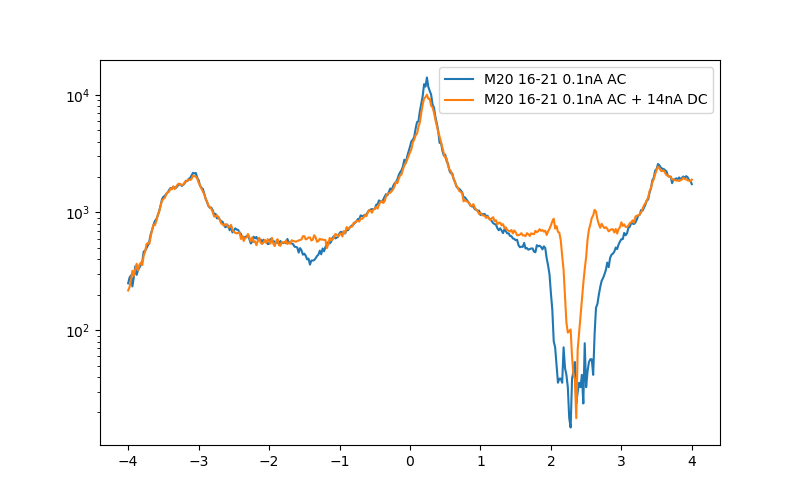

In [138]:
plt.figure(figsize=(8, 5))
plt.semilogy(gvals, np.abs(data87.lockin830_X[:]/10e-9), label='M20 16-21 0.1nA AC')
plt.semilogy(gvals, np.abs(data88.lockin830_X[:]/10e-9), label='M20 16-21 0.1nA AC + 14nA DC')
plt.legend()

In [162]:
lockin830.X()

6.55654e-06

In [142]:
srframe.volt_p1(-1.4)

In [163]:
srframe.volt_p5(0)

In [164]:
srframe.volt_p1(-4)
time.sleep(50)
gvals = np.linspace(-4, 4, 401)
data89, plot89 = npd.single_param_sweep(srframe.volt_p1, gvals, 10, lockin830.X, lockin830.Y, DataName='M20_15-16_830_baseT_-1mT_0.1nA_0nA_DC_1slockin_Preamp')
srframe.volt_p1(0)
srframe.volt_p5(0)

Started at 2020-01-03 09:54:21
DataSet:
   location = 'data/2020-01-03/#001_M20_15-16_830_baseT_-1mT_0.1nA_0nA_DC_1slockin_Preamp_09-54-20'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (401,)
   Measured | lockin830_X         | X            | (401,)
   Measured | lockin830_Y         | Y            | (401,)
Finished at 2020-01-03 11:02:02


<IPython.core.display.Javascript object>


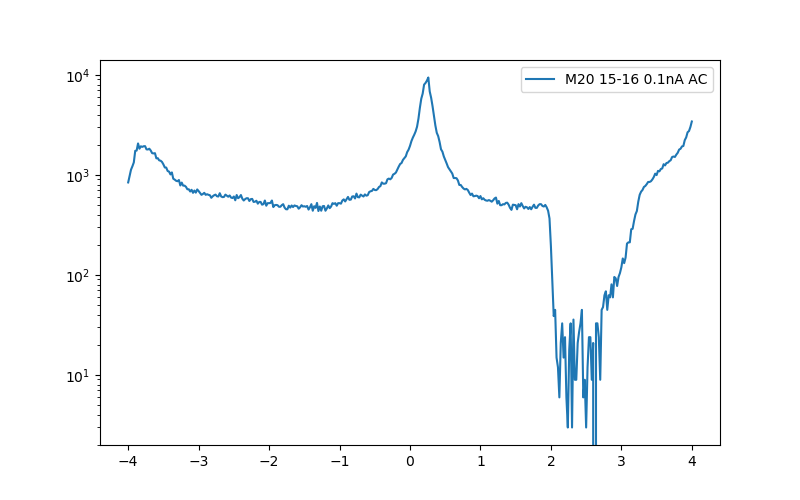

In [165]:
plt.figure(figsize=(8, 5))
plt.semilogy(gvals, np.abs(data89.lockin830_X[:]/10e-9), label='M20 15-16 0.1nA AC')
plt.legend()

In [166]:
srframe.volt_p1(-4)
time.sleep(50)
gvals = np.linspace(-4, 4.5, 426)
data90, plot90 = npd.single_param_sweep(srframe.volt_p1, gvals, 10, lockin830.X, lockin830.Y, DataName='M20_15-45_830_baseT_-1mT_0.1nA_0nA_DC_1slockin_Preamp')
srframe.volt_p1(0)
srframe.volt_p5(0)

Started at 2020-01-03 11:09:45
DataSet:
   location = 'data/2020-01-03/#002_M20_15-45_830_baseT_-1mT_0.1nA_0nA_DC_1slockin_Preamp_11-09-44'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (426,)
   Measured | lockin830_X         | X            | (426,)
   Measured | lockin830_Y         | Y            | (426,)
Finished at 2020-01-03 12:21:47


<IPython.core.display.Javascript object>


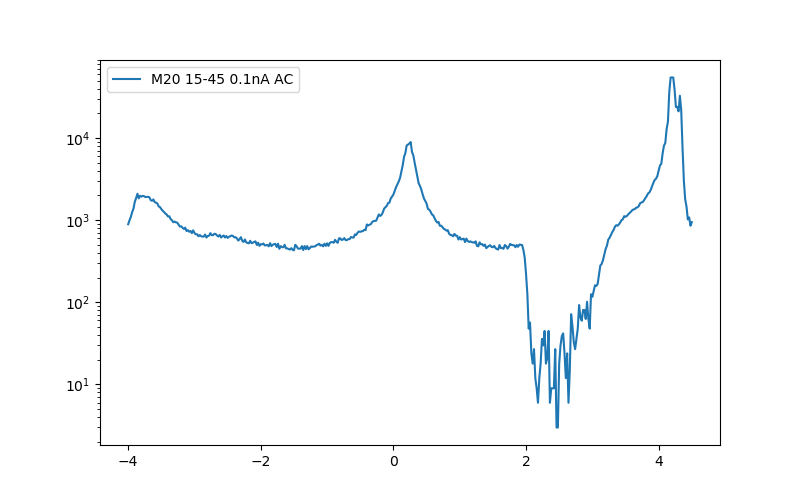

In [168]:
plt.figure(figsize=(8, 5))
plt.semilogy(gvals, np.abs(data90.lockin830_X[:]/10e-9), label='M20 15-45 0.1nA AC')
plt.legend()

In [169]:
srframe.volt_p1(-4)
time.sleep(50)
gvals = np.linspace(-4, 4.5, 426)
data91, plot91 = npd.single_param_sweep(srframe.volt_p1, gvals, 10, lockin830.X, lockin830.Y, DataName='M20_45-21_830_baseT_-1mT_0.1nA_0nA_DC_1slockin_Preamp')
srframe.volt_p1(0)
srframe.volt_p5(0)

Started at 2020-01-03 12:28:49
DataSet:
   location = 'data/2020-01-03/#003_M20_45-21_830_baseT_-1mT_0.1nA_0nA_DC_1slockin_Preamp_12-28-48'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (426,)
   Measured | lockin830_X         | X            | (426,)
   Measured | lockin830_Y         | Y            | (426,)
Finished at 2020-01-03 13:40:45


<IPython.core.display.Javascript object>


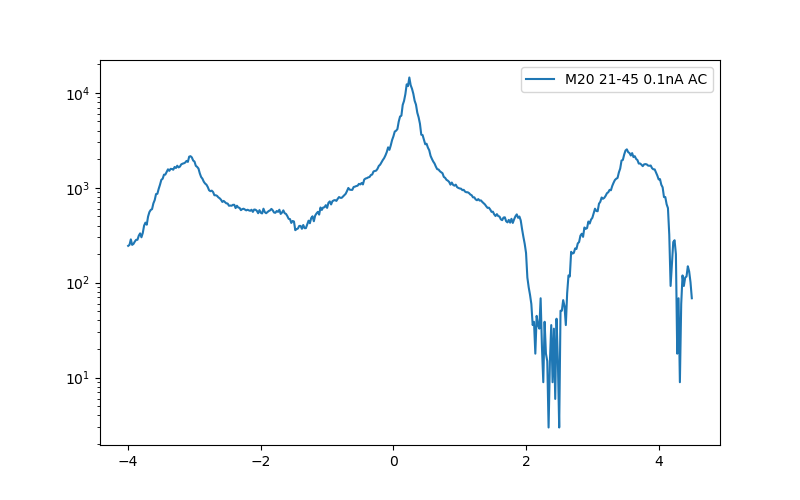

In [170]:
plt.figure(figsize=(8, 5))
plt.semilogy(gvals, np.abs(data91.lockin830_X[:]/10e-9), label='M20 21-45 0.1nA AC')
plt.legend()

In [171]:
srframe.volt_p1(-4.5)
time.sleep(50)
gvals = np.linspace(-4.5, 4.7, 461)
data92, plot92 = npd.single_param_sweep(srframe.volt_p1, gvals, 10, lockin830.X, lockin830.Y, DataName='M20_14-15_830_baseT_-1mT_0.1nA_0nA_DC_1slockin_Preamp')
srframe.volt_p1(0)
srframe.volt_p5(0)

Started at 2020-01-03 13:47:40
DataSet:
   location = 'data/2020-01-03/#004_M20_14-15_830_baseT_-1mT_0.1nA_0nA_DC_1slockin_Preamp_13-47-40'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (461,)
   Measured | lockin830_X         | X            | (461,)
   Measured | lockin830_Y         | Y            | (461,)
Finished at 2020-01-03 15:05:32


<IPython.core.display.Javascript object>


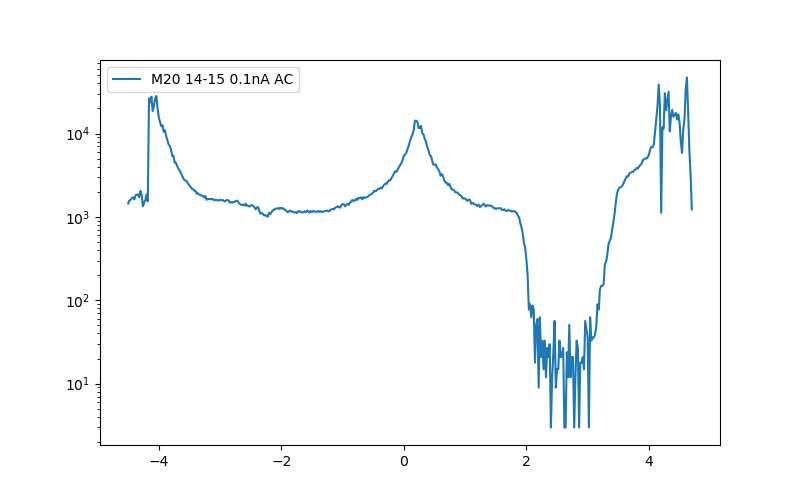

In [173]:
plt.figure(figsize=(8, 5))
plt.semilogy(gvals, np.abs(data92.lockin830_X[:]/10e-9), label='M20 14-15 0.1nA AC')
plt.legend()

In [174]:
srframe.volt_p1(-4)
time.sleep(50)
gvals = np.linspace(-4, 4, 401)
data93, plot93 = npd.single_param_sweep(srframe.volt_p1, gvals, 10, lockin830.X, lockin830.Y, DataName='M20_16-21_830_baseT_-1mT_0.1nA_0nA_DC_1slockin')
srframe.volt_p1(0)
srframe.volt_p5(0)

Started at 2020-01-03 15:11:50
DataSet:
   location = 'data/2020-01-03/#005_M20_16-21_830_baseT_-1mT_0.1nA_0nA_DC_1slockin_15-11-49'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (401,)
   Measured | lockin830_X         | X            | (401,)
   Measured | lockin830_Y         | Y            | (401,)
Finished at 2020-01-03 16:19:29


In [187]:
esqh = 1.602e-19**2/6.626e-34

In [195]:
1/esqh/10

2581.8226592539604

<IPython.core.display.Javascript object>


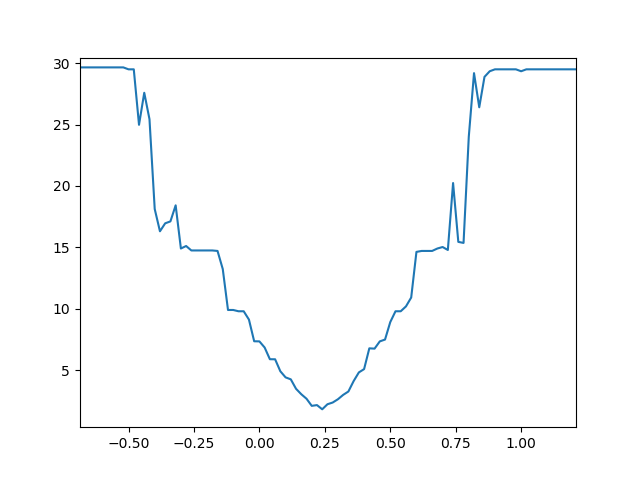

C:\Users\NPLAB\Anaconda3\envs\qcodes\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


(-5, 5, -1, 32)

In [205]:
plt.figure()
plt.plot(data93.srframe_volt_p1_set, 1/(data93.lockin830_X[:]/0.1e-9)/esqh)
plt.axis((-5, 5, -1, 32))

In [175]:
lockin865.amplitude(0.011)
srframe.volt_p1(-4)
time.sleep(50)
gvals = np.linspace(-4, 4, 401)
data94, plot94 = npd.single_param_sweep(srframe.volt_p1, gvals, 10, lockin830.X, lockin830.Y, DataName='M20_16-21_830_baseT_-1mT_0.11nA_0nA_DC_1slockin')
srframe.volt_p1(0)
srframe.volt_p5(0)

Started at 2020-01-04 16:12:57
DataSet:
   location = 'data/2020-01-04/#001_M20_16-21_830_baseT_-1mT_0.11nA_0nA_DC_1slockin_16-12-56'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (401,)
   Measured | lockin830_X         | X            | (401,)
   Measured | lockin830_Y         | Y            | (401,)
Finished at 2020-01-04 17:20:47


In [176]:
lockin865.amplitude(0.015)
srframe.volt_p1(-4)
time.sleep(50)
gvals = np.linspace(-4, 4, 401)
data95, plot95 = npd.single_param_sweep(srframe.volt_p1, gvals, 10, lockin830.X, lockin830.Y, DataName='M20_16-21_830_baseT_-1mT_0.15nA_0nA_DC_1slockin')
srframe.volt_p1(0)
srframe.volt_p5(0)

Started at 2020-01-04 17:21:54
DataSet:
   location = 'data/2020-01-04/#002_M20_16-21_830_baseT_-1mT_0.15nA_0nA_DC_1slockin_17-21-53'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (401,)
   Measured | lockin830_X         | X            | (401,)
   Measured | lockin830_Y         | Y            | (401,)
Finished at 2020-01-04 18:29:48


In [177]:
lockin865.amplitude(0.02)
srframe.volt_p1(-4)
time.sleep(50)
gvals = np.linspace(-4, 4, 401)
data96, plot96 = npd.single_param_sweep(srframe.volt_p1, gvals, 10, lockin830.X, lockin830.Y, DataName='M20_16-21_830_baseT_-1mT_0.2nA_0nA_DC_1slockin')
srframe.volt_p1(0)
srframe.volt_p5(0)

Started at 2020-01-04 18:30:55
DataSet:
   location = 'data/2020-01-04/#003_M20_16-21_830_baseT_-1mT_0.2nA_0nA_DC_1slockin_18-30-54'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (401,)
   Measured | lockin830_X         | X            | (401,)
   Measured | lockin830_Y         | Y            | (401,)
Finished at 2020-01-04 19:38:39


In [178]:
lockin865.amplitude(0.03)
srframe.volt_p1(-4)
time.sleep(50)
gvals = np.linspace(-4, 4, 401)
data97, plot97 = npd.single_param_sweep(srframe.volt_p1, gvals, 10, lockin830.X, lockin830.Y, DataName='M20_16-21_830_baseT_-1mT_0.3nA_0nA_DC_1slockin')
srframe.volt_p1(0)
srframe.volt_p5(0)

Started at 2020-01-04 19:39:45
DataSet:
   location = 'data/2020-01-04/#004_M20_16-21_830_baseT_-1mT_0.3nA_0nA_DC_1slockin_19-39-45'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (401,)
   Measured | lockin830_X         | X            | (401,)
   Measured | lockin830_Y         | Y            | (401,)
Finished at 2020-01-04 20:47:25


In [179]:
lockin865.amplitude(0.04)
srframe.volt_p1(-4)
time.sleep(50)
gvals = np.linspace(-4, 4, 401)
data98, plot98 = npd.single_param_sweep(srframe.volt_p1, gvals, 10, lockin830.X, lockin830.Y, DataName='M20_16-21_830_baseT_-1mT_0.4nA_0nA_DC_1slockin')
srframe.volt_p1(0)
srframe.volt_p5(0)

Started at 2020-01-04 20:48:31
DataSet:
   location = 'data/2020-01-04/#005_M20_16-21_830_baseT_-1mT_0.4nA_0nA_DC_1slockin_20-48-31'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (401,)
   Measured | lockin830_X         | X            | (401,)
   Measured | lockin830_Y         | Y            | (401,)
Finished at 2020-01-04 21:56:15


<IPython.core.display.Javascript object>


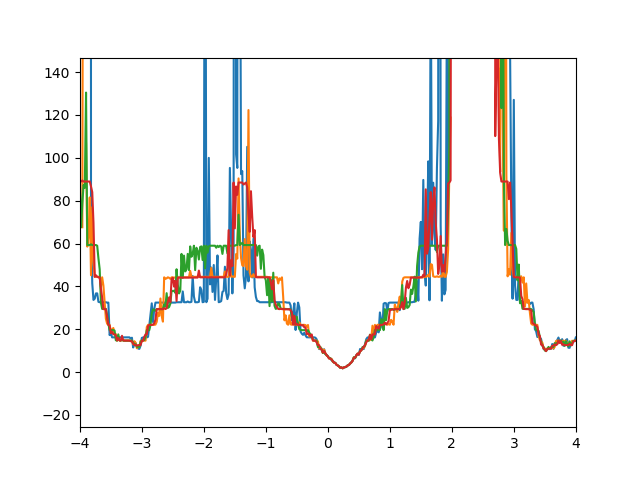

C:\Users\NPLAB\Anaconda3\envs\qcodes\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
C:\Users\NPLAB\Anaconda3\envs\qcodes\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\NPLAB\Anaconda3\envs\qcodes\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
C:\Users\NPLAB\Anaconda3\envs\qcodes\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """


In [211]:
plt.figure()
plt.plot(data94.srframe_volt_p1_set, 1/(data94.lockin830_X[:]/0.11e-9)/esqh)
plt.plot(data95.srframe_volt_p1_set, 1/(data95.lockin830_X[:]/0.15e-9)/esqh)
plt.plot(data96.srframe_volt_p1_set, 1/(data96.lockin830_X[:]/0.2e-9)/esqh)
plt.plot(data97.srframe_volt_p1_set, 1/(data97.lockin830_X[:]/0.3e-9)/esqh)
# plt.plot(data98.srframe_volt_p1_set, data98.lockin830_X[:]/0.4e-9)

In [ ]:
lockin865.amplitude(0.05)
srframe.volt_p1(-4)
time.sleep(50)
gvals = np.linspace(-4, 4, 401)
data99, plot99 = npd.single_param_sweep(srframe.volt_p1, gvals, 10, lockin830.X, lockin830.Y, DataName='M20_16-21_830_baseT_-1mT_0.5nA_0nA_DC_1slockin')
srframe.volt_p1(0)
srframe.volt_p5(0)

In [180]:
lockin865.amplitude(0.1)
srframe.volt_p1(-4)
time.sleep(50)
gvals = np.linspace(-4, 4, 401)
data100, plot100 = npd.single_param_sweep(srframe.volt_p1, gvals, 10, lockin830.X, lockin830.Y, DataName='M20_16-21_830_baseT_-1mT_1nA_0nA_DC_1slockin')
srframe.volt_p1(0)
srframe.volt_p5(0)

Started at 2020-01-04 21:57:22
DataSet:
   location = 'data/2020-01-04/#006_M20_16-21_830_baseT_-1mT_1nA_0nA_DC_1slockin_21-57-21'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (401,)
   Measured | lockin830_X         | X            | (401,)
   Measured | lockin830_Y         | Y            | (401,)
Finished at 2020-01-04 23:05:13


In [181]:
lockin865.amplitude(0.2)
srframe.volt_p1(-4)
time.sleep(50)
gvals = np.linspace(-4, 4, 401)
data101, plot101 = npd.single_param_sweep(srframe.volt_p1, gvals, 10, lockin830.X, lockin830.Y, DataName='M20_16-21_830_baseT_-1mT_2nA_0nA_DC_1slockin')
srframe.volt_p1(0)
srframe.volt_p5(0)

Started at 2020-01-04 23:06:19
DataSet:
   location = 'data/2020-01-04/#007_M20_16-21_830_baseT_-1mT_2nA_0nA_DC_1slockin_23-06-19'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (401,)
   Measured | lockin830_X         | X            | (401,)
   Measured | lockin830_Y         | Y            | (401,)
Finished at 2020-01-05 00:14:15


In [182]:
lockin865.amplitude(0.5)
srframe.volt_p1(-4)
time.sleep(50)
gvals = np.linspace(-4, 4, 401)
data102, plot102 = npd.single_param_sweep(srframe.volt_p1, gvals, 10, lockin830.X, lockin830.Y, DataName='M20_16-21_830_baseT_-1mT_5nA_0nA_DC_1slockin')
srframe.volt_p1(0)
srframe.volt_p5(0)

Started at 2020-01-05 00:15:22
DataSet:
   location = 'data/2020-01-05/#001_M20_16-21_830_baseT_-1mT_5nA_0nA_DC_1slockin_00-15-21'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (401,)
   Measured | lockin830_X         | X            | (401,)
   Measured | lockin830_Y         | Y            | (401,)
Finished at 2020-01-05 01:23:03


In [183]:
lockin865.amplitude(1)
srframe.volt_p1(-4)
time.sleep(50)
gvals = np.linspace(-4, 4, 401)
data103, plot103 = npd.single_param_sweep(srframe.volt_p1, gvals, 10, lockin830.X, lockin830.Y, DataName='M20_16-21_830_baseT_-1mT_10nA_0nA_DC_1slockin')
srframe.volt_p1(0)
srframe.volt_p5(0)

Started at 2020-01-05 01:24:09
DataSet:
   location = 'data/2020-01-05/#002_M20_16-21_830_baseT_-1mT_10nA_0nA_DC_1slockin_01-24-09'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (401,)
   Measured | lockin830_X         | X            | (401,)
   Measured | lockin830_Y         | Y            | (401,)
Finished at 2020-01-05 02:31:56


In [199]:
lockin830.time_constant()

1

In [201]:
lockin830.filter_slope()

24

In [200]:
lockin830.amplitude(0.01) # 0.1 nA

In [202]:
gvals = np.linspace(-0.7, 1.1, 181)  # just around the CNP. Actually at 1nA. Changed the lockin830 instead of lockin865 amplitude
data104, plot104 = npd.single_param_sweep(srframe.volt_p1, gvals, 11, lockin830.X, lockin830.Y, DataName='M20_16-21_830_baseT_-1mT_0p1nA_0nA_DC_1slockin')

Started at 2020-01-06 10:45:16
DataSet:
   location = 'data/2020-01-06/#001_M20_16-21_830_baseT_-1mT_0p1nA_0nA_DC_1slockin_10-45-15'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (181,)
   Measured | lockin830_X         | X            | (181,)
   Measured | lockin830_Y         | Y            | (181,)
Finished at 2020-01-06 11:16:38
Keyboard Interrupt


In [204]:
lockin865.amplitude(0.01)  # actually 0.1nA this time
srframe.volt_p1(-0.7)
time.sleep(16)
gvals = np.linspace(-0.7, 1, 171)  # just around the CNP.
data105, plot105 = npd.single_param_sweep(srframe.volt_p1, gvals, 11, lockin830.X, lockin830.Y, DataName='M20_16-21_830_baseT_-1mT_0p1nA_0nA_DC_1slockin')

Remote plot responded with  
Restarting remote plot


Request timed out: ('import', 1, 0, b'\x80\x03}q\x00X\x06\x00\x00\x00moduleq\x01X\x14\x00\x00\x00qcodes.utils.helpersq\x02s.')


  File "C:\Users\NPLAB\Anaconda3\envs\qcodes\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\NPLAB\Anaconda3\envs\qcodes\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\NPLAB\Anaconda3\envs\qcodes\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\NPLAB\Anaconda3\envs\qcodes\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\NPLAB\Anaconda3\envs\qcodes\lib\site-packages\ipykernel\kernelapp.py", line 505, in start
    self.io_loop.start()
  File "C:\Users\NPLAB\Anaconda3\envs\qcodes\lib\site-packages\tornado\platform\asyncio.py", line 132, in start
    self.asyncio_loop.run_forever()
  File "C:\Users\NPLAB\Anaconda3\envs\qcodes\lib\asyncio\base_events.py", line 438, in run_forever
    self._run_once()
  File "C:\Users\NPLAB\Anaconda3\envs\qcodes\lib\asyncio\base_events.py", line 1451, in _ru

Started at 2020-01-06 11:24:01
DataSet:
   location = 'data/2020-01-06/#003_M20_16-21_830_baseT_-1mT_0p1nA_0nA_DC_1slockin_11-23-37'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (171,)
   Measured | lockin830_X         | X            | (171,)
   Measured | lockin830_Y         | Y            | (171,)
Finished at 2020-01-06 11:55:43


In [206]:
lockin865.amplitude(0.01)  # 0.1nA, even higher resolution, changed sensitivity, sync filter off. back to 10s delay time
srframe.volt_p1(-0.7)
time.sleep(16)
gvals = np.linspace(-0.7, 1, 341)  # just around the CNP.
data106, plot106 = npd.single_param_sweep(srframe.volt_p1, gvals, 10, lockin830.X, lockin830.Y, DataName='M20_16-21_830_baseT_-1mT_0p1nA_0nA_DC_1slockin')

Started at 2020-01-06 12:48:23
DataSet:
   location = 'data/2020-01-06/#004_M20_16-21_830_baseT_-1mT_0p1nA_0nA_DC_1slockin_12-48-22'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (341,)
   Measured | lockin830_X         | X            | (341,)
   Measured | lockin830_Y         | Y            | (341,)
Finished at 2020-01-06 13:45:56


In [207]:
lockin865.amplitude(0.01)  # 0.1nA, lower resolution, sync filter off. back to 10s delay time
srframe.volt_p1(-0.7)
time.sleep(16)
gvals = np.linspace(-0.8, 1, 91)  # just around the CNP.
data107, plot107 = npd.single_param_sweep(srframe.volt_p1, gvals, 10, lockin830.X, lockin830.Y, DataName='M20_16-21_830_baseT_-1mT_0p1nA_0nA_DC_1slockin')

Started at 2020-01-06 15:08:28
DataSet:
   location = 'data/2020-01-06/#005_M20_16-21_830_baseT_-1mT_0p1nA_0nA_DC_1slockin_15-08-27'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (91,)
   Measured | lockin830_X         | X            | (91,)
   Measured | lockin830_Y         | Y            | (91,)
Finished at 2020-01-06 15:23:52


In [208]:
lockin865.amplitude(0.01)  # 0.1nA, lower resolution, sync filter on. back to 10s delay time
srframe.volt_p1(-0.8)
time.sleep(16)
gvals = np.linspace(-0.8, 1, 91)  # just around the CNP.
data108, plot108 = npd.single_param_sweep(srframe.volt_p1, gvals, 10, lockin830.X, lockin830.Y, DataName='M20_16-21_830_baseT_-1mT_0p1nA_0nA_DC_1slockin')

Started at 2020-01-06 15:25:23
DataSet:
   location = 'data/2020-01-06/#006_M20_16-21_830_baseT_-1mT_0p1nA_0nA_DC_1slockin_15-25-22'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (91,)
   Measured | lockin830_X         | X            | (91,)
   Measured | lockin830_Y         | Y            | (91,)
Finished at 2020-01-06 15:40:45


In [213]:
lockin865.amplitude(0.01)  # 0.1nA, Now 7.777Hz (before 19.111), back up to the same settings as before: 10 uA sensitivity
srframe.volt_p1(-0.7)
time.sleep(16)
gvals = np.linspace(-0.7, 0.2, 51)  # just around the CNP.
data109, plot109 = npd.single_param_sweep(srframe.volt_p1, gvals, 11, lockin830.X, lockin830.Y, DataName='M20_16-21_830_baseT_-1mT_0p1nA_0nA_DC_1slockin')

Started at 2020-01-06 15:51:40
DataSet:
   location = 'data/2020-01-06/#008_M20_16-21_830_baseT_-1mT_0p1nA_0nA_DC_1slockin_15-51-39'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (51,)
   Measured | lockin830_X         | X            | (51,)
   Measured | lockin830_Y         | Y            | (51,)
Finished at 2020-01-06 16:01:07


The 4 plots above did not reproduce the quantization

In [214]:
lockin865.frequency(19.111)  # 0.1nA, back to 19.111 Hz. Everything else the same. Only difference is 2X resolution vs.the different-current measurements and 11 s delay time instead of 10
srframe.volt_p1(-0.7)
time.sleep(25)
gvals = np.linspace(-0.7, 0.2, 91)  # just around the left side of the CNP.
data110, plot110 = npd.single_param_sweep(srframe.volt_p1, gvals, 11, lockin830.X, lockin830.Y, DataName='M20_16-21_830_baseT_-1mT_0p1nA_0nA_DC_1slockin')

Started at 2020-01-06 16:02:44
DataSet:
   location = 'data/2020-01-06/#009_M20_16-21_830_baseT_-1mT_0p1nA_0nA_DC_1slockin_16-02-43'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (91,)
   Measured | lockin830_X         | X            | (91,)
   Measured | lockin830_Y         | Y            | (91,)
Finished at 2020-01-06 16:19:36


In [218]:
gvals = np.linspace(-0.7, 0.2, 91)[::-1]  # Go back down in the opposite direction.
data111, plot111 = npd.single_param_sweep(srframe.volt_p1, gvals, 11, lockin830.X, lockin830.Y, DataName='M20_16-21_830_baseT_-1mT_0p1nA_0nA_DC_1slockin')

Started at 2020-01-06 16:21:27
DataSet:
   location = 'data/2020-01-06/#010_M20_16-21_830_baseT_-1mT_0p1nA_0nA_DC_1slockin_16-21-26'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (91,)
   Measured | lockin830_X         | X            | (91,)
   Measured | lockin830_Y         | Y            | (91,)
Finished at 2020-01-06 16:38:22


In [219]:
lockin830.sync_filter('off')  # same but sync filter off
time.sleep(25)
gvals = np.linspace(-0.7, 0, 71)
data112, plot112 = npd.single_param_sweep(srframe.volt_p1, gvals, 11, lockin830.X, lockin830.Y, DataName='M20_16-21_830_baseT_-1mT_0p1nA_0nA_DC_1slockin')

Started at 2020-01-06 16:38:48
DataSet:
   location = 'data/2020-01-06/#011_M20_16-21_830_baseT_-1mT_0p1nA_0nA_DC_1slockin_16-38-47'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (71,)
   Measured | lockin830_X         | X            | (71,)
   Measured | lockin830_Y         | Y            | (71,)
Finished at 2020-01-06 16:51:58


With the sync filter off, we don't see the quantization steps

In [220]:
lockin830.sync_filter('on')  # sync filter back on. Now a longer wait time between points
srframe.volt_p1(-0.7)
time.sleep(25)
gvals = np.linspace(-0.7, 0, 71)
data113, plot113 = npd.single_param_sweep(srframe.volt_p1, gvals, 16, lockin830.X, lockin830.Y, DataName='M20_16-21_830_baseT_-1mT_0p1nA_0nA_DC_1slockin')

Started at 2020-01-06 17:10:47
DataSet:
   location = 'data/2020-01-06/#012_M20_16-21_830_baseT_-1mT_0p1nA_0nA_DC_1slockin_17-10-46'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (71,)
   Measured | lockin830_X         | X            | (71,)
   Measured | lockin830_Y         | Y            | (71,)
Finished at 2020-01-06 17:29:51


In [221]:
lockin830.sensitivity(5e-6)  # still the longer wait between points. go back down, but decrease sensitivity to 5 uA
time.sleep(25)
gvals = np.linspace(-0.7, 0, 71)[::-1]
data114, plot114 = npd.single_param_sweep(srframe.volt_p1, gvals, 16, lockin830.X, lockin830.Y, DataName='M20_16-21_830_baseT_-1mT_0p1nA_0nA_DC_1slockin')

Started at 2020-01-06 17:30:17
DataSet:
   location = 'data/2020-01-06/#013_M20_16-21_830_baseT_-1mT_0p1nA_0nA_DC_1slockin_17-30-16'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (71,)
   Measured | lockin830_X         | X            | (71,)
   Measured | lockin830_Y         | Y            | (71,)
Finished at 2020-01-06 17:49:22


Ok, doesn't depend too heavily on the wait time or the sensitivity. For some reason, the 10uA sensitivity (and 5 is ok) seems to work better than lower sensitivity. Go back to 11s per point, and try changing the frequency.

In [222]:
lockin830.sensitivity(10e-6)  # go back to 10uA sensitivity since it seems to work best. Change the frequency
lockin830.frequency(13.111)
time.sleep(25)
gvals = np.linspace(-0.7, 0, 71)
data115, plot115 = npd.single_param_sweep(srframe.volt_p1, gvals, 11, lockin830.X, lockin830.Y, DataName='M20_16-21_830_baseT_-1mT_0p1nA_0nA_DC_1slockin')

Started at 2020-01-06 17:52:03
DataSet:
   location = 'data/2020-01-06/#014_M20_16-21_830_baseT_-1mT_0p1nA_0nA_DC_1slockin_17-52-02'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (71,)
   Measured | lockin830_X         | X            | (71,)
   Measured | lockin830_Y         | Y            | (71,)
Finished at 2020-01-06 18:05:13


<IPython.core.display.Javascript object>


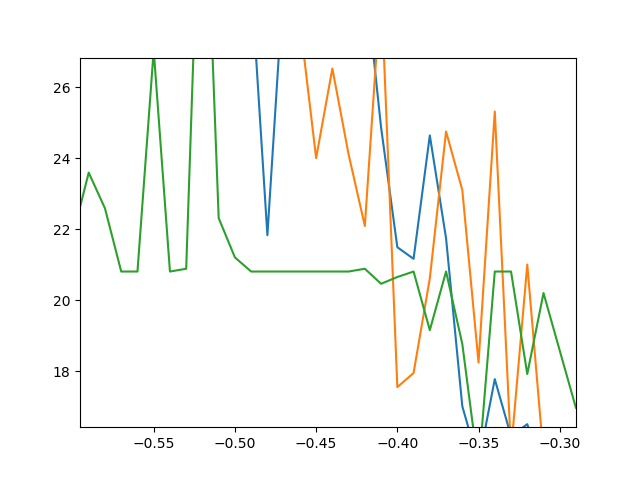

In [223]:
plt.figure()
plt.plot(data115.srframe_volt_p1_set, (0.1e-9/data115.lockin830_X[:])/esqh)  #up
plt.plot(data111.srframe_volt_p1_set, (0.1e-9/data111.lockin830_X[:])/esqh)  #down
plt.plot(data114.srframe_volt_p1_set, (0.1e-9/data114.lockin830_X[:])/esqh)  #down

In [224]:
gvals = np.linspace(0.1, 0.3, 81)  # right near charge neutrality. everything else the same
data116, plot116 = npd.single_param_sweep(srframe.volt_p1, gvals, 11, lockin830.X, lockin830.Y, DataName='M20_16-21_830_baseT_-1mT_0p1nA_0nA_DC_1slockin')

Started at 2020-01-06 18:11:00
DataSet:
   location = 'data/2020-01-06/#015_M20_16-21_830_baseT_-1mT_0p1nA_0nA_DC_1slockin_18-10-59'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (81,)
   Measured | lockin830_X         | X            | (81,)
   Measured | lockin830_Y         | Y            | (81,)
Finished at 2020-01-06 18:26:10


<IPython.core.display.Javascript object>


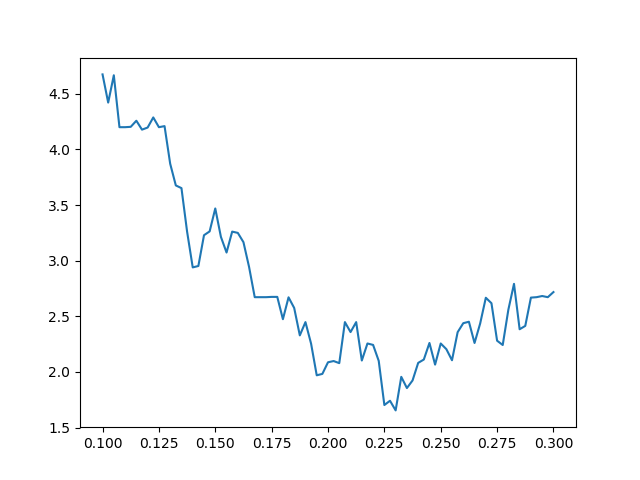

In [233]:
plt.figure()
plt.plot(data116.srframe_volt_p1_set, (0.1e-9/data116.lockin830_X[:])/esqh)  #up

In [234]:
lockin865.amplitude(0.02)  #0.2 nA
srframe.volt_p1(0.1)
time.sleep(15)
gvals = np.linspace(0.1, 0.4, 121)  # right near charge neutrality. everything else the same
data117, plot117 = npd.single_param_sweep(srframe.volt_p1, gvals, 11, lockin830.X, lockin830.Y, DataName='M20_16-21_830_baseT_-1mT_0p2nA_0nA_DC_1slockin')

Started at 2020-01-06 18:31:41
DataSet:
   location = 'data/2020-01-06/#016_M20_16-21_830_baseT_-1mT_0p2nA_0nA_DC_1slockin_18-31-40'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (121,)
   Measured | lockin830_X         | X            | (121,)
   Measured | lockin830_Y         | Y            | (121,)
Finished at 2020-01-06 18:54:07


In [240]:
srframe.volt_p1(0)

In [242]:
  # same settings except using the preamp 100x (unplugged), and sensitivity 200 uV. Also using the SRS830 as the source 
lockin830.frequency(19.111) #change frequency to that of the lockin865
srframe.volt_p1(-0.7)
time.sleep(25)
gvals = np.linspace(-0.7, 0, 71)
data118, plot118 = npd.single_param_sweep(srframe.volt_p1, gvals, 11, lockin830.X, lockin830.Y, DataName='M20_16-21_830_baseT_-1mT_0p1nA_100xpreamp_0nADC_1slockin')

Started at 2020-01-06 19:41:43
DataSet:
   location = 'data/2020-01-06/#017_M20_16-21_830_baseT_-1mT_0p1nA_100xpreamp_0nADC_1slockin_19-41-42'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (71,)
   Measured | lockin830_X         | X            | (71,)
   Measured | lockin830_Y         | Y            | (71,)
Finished at 2020-01-06 19:54:53


In [245]:
# try again, but use 200x gain and 100 uV sensitivity. Also use more points. Also using the SRS830 as the source 
srframe.volt_p1(-0.7)
time.sleep(25)
gvals = np.linspace(-0.7, 0, 141)
data119, plot119 = npd.single_param_sweep(srframe.volt_p1, gvals, 11, lockin830.X, lockin830.Y, DataName='M20_16-21_830_baseT_-1mT_0p1nA_200xpreamp_0nADC_1slockin')

Started at 2020-01-06 20:01:38
DataSet:
   location = 'data/2020-01-06/#018_M20_16-21_830_baseT_-1mT_0p1nA_200xpreamp_0nADC_1slockin_20-01-37'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (141,)
   Measured | lockin830_X         | X            | (141,)
   Measured | lockin830_Y         | Y            | (141,)
Finished at 2020-01-06 20:27:46


In [246]:
# lastly, try with the only difference being the sync filter off. This shouldn't make much of a difference, except possibly when the resolution is too low
lockin830.sync_filter('off')
srframe.volt_p1(-0.7)
time.sleep(25)
gvals = np.linspace(-0.7, 0, 141)
data120, plot120 = npd.single_param_sweep(srframe.volt_p1, gvals, 11, lockin830.X, lockin830.Y, DataName='M20_16-21_830_baseT_-1mT_0p1nA_200xpreamp_0nADC_1slockin')

Started at 2020-01-06 20:28:14
DataSet:
   location = 'data/2020-01-06/#019_M20_16-21_830_baseT_-1mT_0p1nA_200xpreamp_0nADC_1slockin_20-28-13'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (141,)
   Measured | lockin830_X         | X            | (141,)
   Measured | lockin830_Y         | Y            | (141,)
Finished at 2020-01-06 20:54:23


<IPython.core.display.Javascript object>


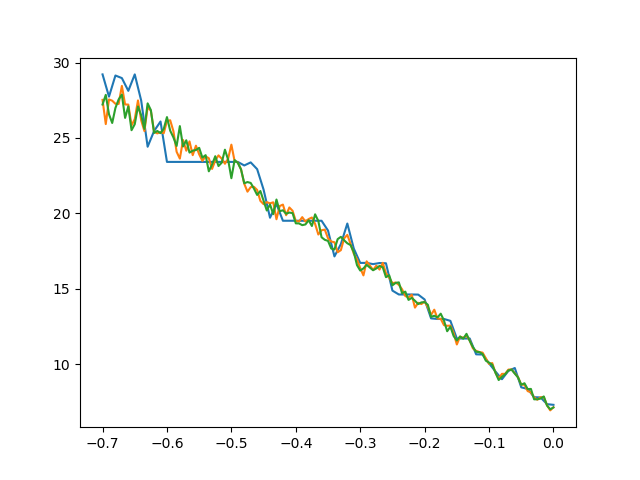

In [253]:
plt.figure()
plt.plot(data118.srframe_volt_p1_set, 1/(data118.lockin830_X[:]/0.1e-9/100)/esqh)
plt.plot(data119.srframe_volt_p1_set, 1/(data119.lockin830_X[:]/0.1e-9/200)/esqh)
plt.plot(data120.srframe_volt_p1_set, 1/(data120.lockin830_X[:]/0.1e-9/200)/esqh)

You can see here that the steps are also reproduced at higher lockin sensitivity levels, when there is a pre-amp involved. before using the pre-amp, the quantization appeared at sensitivities >= 5-10 uV. Then for 200x amplification, we saw it appeared at 200 uV once again. Thus, the specific sensitivity level below 10 uV is fine. The steps are just the somewhat strange result of the large sensitivity (and perhaps the sync filter, which lowers the resolution). Other things that indicate this are: the steps seem to be in resistance rather than conductance, and they don't seem to follow the predicted pattern of n*e^2/h.

In [251]:
lockin830.amplitude(0.05) # 0.5 nA
lockin830.sensitivity(1e-3)
lockin830.time_constant(0.3)

In [252]:
srframe.volt_p1(-4.5)  #full gatesweep, using the preamp at 200x
time.sleep(25)
gvals = np.linspace(-4.5, 5, 951)
data121, plot121 = npd.single_param_sweep(srframe.volt_p1, gvals, 4, lockin830.X, lockin830.Y, DataName='M20_16-21_830_baseT_-1mT_0p5nA_200xpreamp_0nADC_0p3slockin')
srframe.volt_p1(0)

Started at 2020-01-07 00:02:59
DataSet:
   location = 'data/2020-01-07/#001_M20_16-21_830_baseT_-1mT_0p5nA_200xpreamp_0nADC_0p3slockin_00-02-58'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (951,)
   Measured | lockin830_X         | X            | (951,)
   Measured | lockin830_Y         | Y            | (951,)
Finished at 2020-01-07 01:08:31


<IPython.core.display.Javascript object>


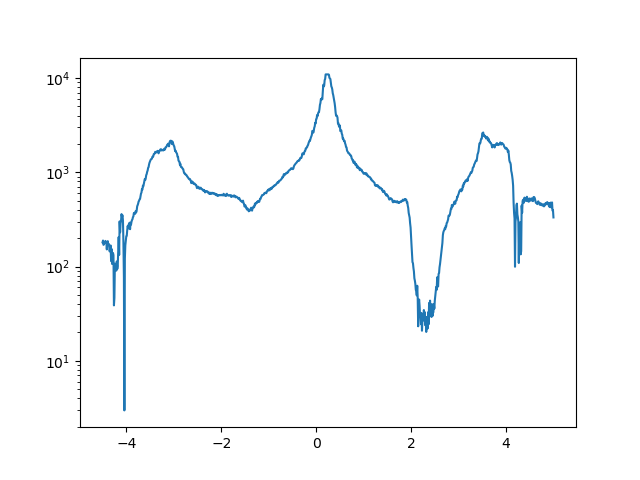

In [255]:
plt.figure()
plt.semilogy(data121.srframe_volt_p1_set[:], np.abs(data121.lockin830_X[:]/0.5e-9/200))

## 2-point measurements at 2K

In [258]:
lockin865.amplitude(0.5)  # 5 nA

In [259]:
srframe.volt_p1(-4.5)  # no preamp. 2K 2-pt measurement. unplug all but the lockin865 and its source. forgot to ground 16
time.sleep(12)
gvals = np.linspace(-4.5, 5, 476)
data122, plot122 = npd.single_param_sweep(srframe.volt_p1, gvals, 1.2, lockin865.X, lockin865.Y, DataName='M20_21-16_2ptgatesweep_5nA_2K')

Started at 2020-01-07 16:49:19
DataSet:
   location = 'data/2020-01-07/#002_M20_21-16_2ptgatesweep_5nA_2K_16-49-18'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (476,)
   Measured | lockin865_X         | X            | (476,)
   Measured | lockin865_Y         | Y            | (476,)
Finished at 2020-01-07 16:59:43


In [260]:
srframe.volt_p1(0)

In [261]:
srframe.volt_p1(-4.5)  # ground all contacts but 21
time.sleep(12)
gvals = np.linspace(-4.5, 5, 476)
data123, plot123 = npd.single_param_sweep(srframe.volt_p1, gvals, 1.2, lockin865.X, lockin865.Y, DataName='M20_21-16_2ptgatesweep_5nA_2K')

Started at 2020-01-07 17:01:51
DataSet:
   location = 'data/2020-01-07/#003_M20_21-16_2ptgatesweep_5nA_2K_17-01-50'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (476,)
   Measured | lockin865_X         | X            | (476,)
   Measured | lockin865_Y         | Y            | (476,)
Finished at 2020-01-07 17:12:16


In [262]:
srframe.volt_p1(-4.5)  # ground all contacts but 16
time.sleep(12)
gvals = np.linspace(-4.5, 5, 476)
data124, plot124 = npd.single_param_sweep(srframe.volt_p1, gvals, 1.2, lockin865.X, lockin865.Y, DataName='M20_16all_2ptgatesweep_5nA_2K')

Started at 2020-01-07 17:14:16
DataSet:
   location = 'data/2020-01-07/#004_M20_16all_2ptgatesweep_5nA_2K_17-14-15'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (476,)
   Measured | lockin865_X         | X            | (476,)
   Measured | lockin865_Y         | Y            | (476,)
Finished at 2020-01-07 17:24:40


In [264]:
srframe.volt_p1(-4.5)  # ground all contacts but 15
time.sleep(12)
gvals = np.linspace(-4.5, 5, 476)
data125, plot125 = npd.single_param_sweep(srframe.volt_p1, gvals, 1.2, lockin865.X, lockin865.Y, DataName='M20_15all_2ptgatesweep_5nA_2K')

Started at 2020-01-07 17:26:35
DataSet:
   location = 'data/2020-01-07/#005_M20_15all_2ptgatesweep_5nA_2K_17-26-34'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (476,)
   Measured | lockin865_X         | X            | (476,)
   Measured | lockin865_Y         | Y            | (476,)
Finished at 2020-01-07 17:36:59


<IPython.core.display.Javascript object>


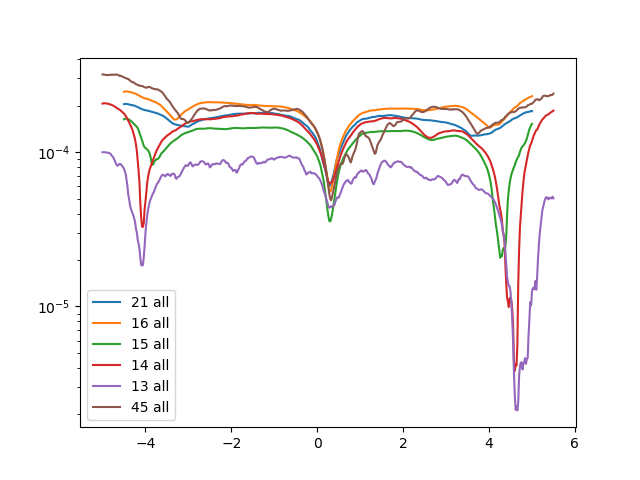

In [281]:
plt.figure()
plt.semilogy(data123.srframe_volt_p1_set[:], 1/(np.abs(data123.lockin865_X[:]/5e-9)), label='21 all')
plt.semilogy(data124.srframe_volt_p1_set[:], 1/(np.abs(data124.lockin865_X[:]/5e-9)), label='16 all')
plt.semilogy(data124.srframe_volt_p1_set[:], 1/(np.abs(data125.lockin865_X[:]/5e-9)), label='15 all')
plt.semilogy(data126.srframe_volt_p1_set[:], 1/(np.abs(data126.lockin865_X[:]/5e-9)), label='14 all')
plt.semilogy(data127.srframe_volt_p1_set[:], 1/(np.abs(data127.lockin865_X[:]/5e-9)), label='13 all')
plt.semilogy(data128.srframe_volt_p1_set[:], 1/(np.abs(data128.lockin865_X[:]/5e-9)), label='45 all')
plt.legend()

In [266]:
srframe.volt_p1(-5)  # ground all contacts but 14
time.sleep(18)
gvals = np.linspace(-5, 5.5, 526)
data126, plot126 = npd.single_param_sweep(srframe.volt_p1, gvals, 1.2, lockin865.X, lockin865.Y, DataName='M20_14all_2ptgatesweep_5nA_2K')

Started at 2020-01-07 17:40:28
DataSet:
   location = 'data/2020-01-07/#006_M20_14all_2ptgatesweep_5nA_2K_17-40-28'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (526,)
   Measured | lockin865_X         | X            | (526,)
   Measured | lockin865_Y         | Y            | (526,)
Finished at 2020-01-07 17:51:58


In [268]:
srframe.volt_p1(-5)  # ground all contacts but 13
time.sleep(20)
gvals = np.linspace(-5, 5.5, 526)
data127, plot127 = npd.single_param_sweep(srframe.volt_p1, gvals, 1.2, lockin865.X, lockin865.Y, DataName='M20_13all_2ptgatesweep_5nA_2K')

Started at 2020-01-07 17:54:24
DataSet:
   location = 'data/2020-01-07/#007_M20_13all_2ptgatesweep_5nA_2K_17-54-23'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (526,)
   Measured | lockin865_X         | X            | (526,)
   Measured | lockin865_Y         | Y            | (526,)
Finished at 2020-01-07 18:05:53


In [271]:
srframe.volt_p1(-5)  # ground all contacts but 45
time.sleep(20)
gvals = np.linspace(-5, 5.5, 526)
data128, plot128 = npd.single_param_sweep(srframe.volt_p1, gvals, 1.2, lockin865.X, lockin865.Y, DataName='M20_45all_2ptgatesweep_5nA_2K')

Started at 2020-01-07 18:08:08
DataSet:
   location = 'data/2020-01-07/#008_M20_45all_2ptgatesweep_5nA_2K_18-08-08'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (526,)
   Measured | lockin865_X         | X            | (526,)
   Measured | lockin865_Y         | Y            | (526,)
Finished at 2020-01-07 18:19:38


In [276]:
srframe.volt_p1(0) 

In [274]:
# True 2 point measurements now

In [278]:
srframe.volt_p1(-5)  # 14-13
time.sleep(20)
gvals = np.linspace(-5, 5.5, 526)
data129, plot129 = npd.single_param_sweep(srframe.volt_p1, gvals, 1.1, lockin865.X, lockin865.Y, DataName='M20_14-13_2ptgatesweep_5nA_2K')

Started at 2020-01-07 19:03:15
DataSet:
   location = 'data/2020-01-07/#010_M20_14-13_2ptgatesweep_5nA_2K_19-03-14'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (526,)
   Measured | lockin865_X         | X            | (526,)
   Measured | lockin865_Y         | Y            | (526,)
Finished at 2020-01-07 19:13:52


In [279]:
srframe.volt_p1(-5)  # 14-13
time.sleep(20)
gvals = np.linspace(-5, 5.5, 526)
data130, plot130 = npd.single_param_sweep(srframe.volt_p1, gvals, 1.1, lockin865.X, lockin865.Y, DataName='M20_14-13_2ptgatesweep_5nA_300mK')

Started at 2020-01-07 19:51:40
DataSet:
   location = 'data/2020-01-07/#011_M20_14-13_2ptgatesweep_5nA_300mK_19-51-39'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (526,)
   Measured | lockin865_X         | X            | (526,)
   Measured | lockin865_Y         | Y            | (526,)
Finished at 2020-01-07 19:57:44
Keyboard Interrupt


In [286]:
triton.read_temps()

MC - on:  0.0235233 K
MC_cernox - off:  1.6988 K
still - off:  0.744767 K
cold_plate - off:  0.717767 K
magnet - off:  4.48432 K
PT2h - off:  3.55899 K
PT2p - off:  3.78537 K
PT1h - off:  46.5152 K
PT1p - off:  61.8695 K


In [293]:
srframe.volt_p1()

0.0

In [304]:
srframe.volt_p1(-1)  # test Rxy
time.sleep(20)
gvals = np.linspace(-1, 1.5, 101)
data131, plot131 = npd.single_param_sweep(srframe.volt_p1, gvals, 3, lockin830.X, lockin830.Y, DataName='M20_16-45_Rxy_830_2nA_2T_base')

Started at 2020-01-08 09:45:33
DataSet:
   location = 'data/2020-01-08/#001_M20_16-45_Rxy_830_2nA_2T_base_09-45-32'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (101,)
   Measured | lockin830_X         | X            | (101,)
   Measured | lockin830_Y         | Y            | (101,)
Finished at 2020-01-08 09:50:48


<IPython.core.display.Javascript object>


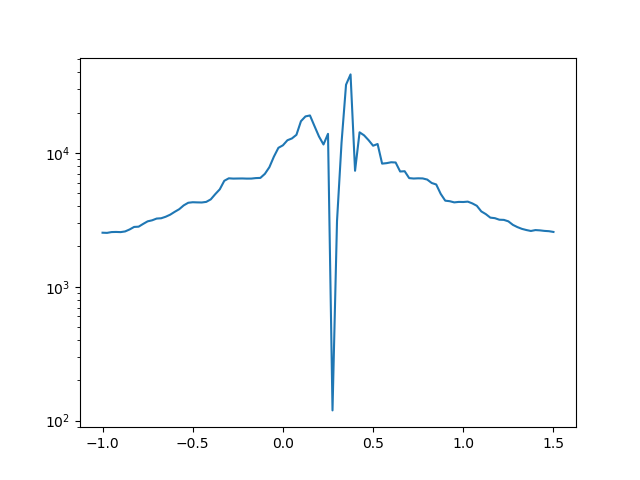

In [305]:
plt.figure()
plt.semilogy(data131.srframe_volt_p1_set[:], (np.abs(data131.lockin830_X[:]/2e-9)), label='830 16-45 2T')

In [318]:
srframe.volt_p1(-1.2)  # test Rxy
time.sleep(20)
gvals = np.linspace(-1.2, 1.5, 601)
data132, plot132 = npd.single_param_sweep(srframe.volt_p1, gvals, 7.5, lockin830.X, lockin830.Y, lockin865.X, lockin865.Y, DataName='M20_16-45_Rxy_830_2nA_2T_base_1sintegration')

Started at 2020-01-08 11:40:48
DataSet:
   location = 'data/2020-01-08/#010_M20_16-45_Rxy_830_2nA_2T_base_1sintegration_11-40-46'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (601,)
   Measured | lockin830_X         | X            | (601,)
   Measured | lockin830_Y         | Y            | (601,)
   Measured | lockin865_X         | X            | (601,)
   Measured | lockin865_Y         | Y            | (601,)
Finished at 2020-01-08 12:58:06


In [316]:
# one possible way. Problem is you have to make a new parameter for each nav value, delay
def V_instr_av(parameter, nav, delay):
    def avfunc():
        V = []
        for i in range(int(nav)):
            V.append(parameter())
            time.sleep(delay)
        return np.average(V)
    return avfunc

In [340]:
lockin830_X_av4 = qc.Parameter('lockin830_X_av', get_cmd=V_instr_av(lockin830.X, 5, 0.5))

In [341]:
lockin830_X_av4()

4.88016e-06

In [323]:
class AvParameter(qc.Parameter):
    """Just a get parameter, derived based on another parameter. The object is to average
    nav times, with a delay time between each point in the average. Change the averaging number by changing
    self.nav"""
    def __init__(self, name, parameter, nav=1, avdelay=0, **kwargs):
        super().__init__(name, **kwargs)
        self.parameter = parameter
        self.nav = nav
        self.avdelay = avdelay
        
    def get_raw(self):
        V = []
        for i in range(int(self.nav) - 1):
            V.append(self.parameter())
            time.sleep(self.avdelay)
        V.append(self.parameter())
        return np.average(V)

In [324]:
lockin830_Xav = AvParameter('lockin830_Xav', lockin830.X, nav=5, avdelay=0.5)

In [329]:
lockin830_Xav.avdelay = 1
lockin830_Xav.nav = 6

In [332]:
lockin830_Xav()

4.922376666666667e-06

In [336]:
lockin830_Xav.avdelay = 0.4
lockin830_Xav.nav = 5

In [334]:
l = np.linspace(-1.2, 1.5, 601)
print(l[1] - l[0])

0.0044999999999999485


In [335]:
0.7/0.005

140.0

In [345]:
lockin865_Xav = AvParameter('lockin865_Xav', lockin865.X, nav=5, avdelay=0.35, unit='V')
lockin830_Xav = AvParameter('lockin830_Xav', lockin830.X, nav=5, avdelay=0.35, unit='V')

In [342]:
srframe.volt_p1(-0.6)  # test Rxy. Both lockin865 and 830 are connected to the same electrodes
time.sleep(20)
gvals = np.linspace(-0.6, 0.1, 141)
data133, plot133 = npd.single_param_sweep(srframe.volt_p1, gvals, 2.5, lockin830_Xav, lockin830.Y, lockin865_Xav, lockin865.Y, DataName='M20_16-45_Rxy_830_2nA_2T_base_0p3sTC_5nav')

Started at 2020-01-08 13:12:40
DataSet:
   location = 'data/2020-01-08/#011_M20_16-45_Rxy_830_2nA_2T_base_0p3sTC_5nav_13-12-38'
   <Type>   | <array_id>          | <array.name>  | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1       | (141,)
   Measured | lockin830_Xav       | lockin830_Xav | (141,)
   Measured | lockin830_Y         | Y             | (141,)
   Measured | lockin865_Xav       | lockin865_Xav | (141,)
   Measured | lockin865_Y         | Y             | (141,)
Finished at 2020-01-08 13:26:42


In [346]:
srframe.volt_p1(-1.2)  # test Rxy. Both lockin865 and 830 are connected to the same electrodes
time.sleep(25)
gvals = np.linspace(-1.2, 1.5, 541)
data134, plot134 = npd.single_param_sweep(srframe.volt_p1, gvals, 2.4, lockin830_Xav, lockin830.Y, lockin865_Xav, lockin865.Y, DataName='M20_16-45_Rxy_830_2nA_2T_base_0p3sTC_5nav')

Started at 2020-01-08 13:40:12
DataSet:
   location = 'data/2020-01-08/#012_M20_16-45_Rxy_830_2nA_2T_base_0p3sTC_5nav_13-40-10'
   <Type>   | <array_id>          | <array.name>  | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1       | (541,)
   Measured | lockin830_Xav       | lockin830_Xav | (541,)
   Measured | lockin830_Y         | Y             | (541,)
   Measured | lockin865_Xav       | lockin865_Xav | (541,)
   Measured | lockin865_Y         | Y             | (541,)
Finished at 2020-01-08 14:29:27


See what averaging the two (865av and 830av) does

In [353]:
Rxyav2lockins = np.average(np.vstack((data134.lockin830_Xav[:], data134.lockin865_Xav[:])), axis=0)/2e-9

<IPython.core.display.Javascript object>


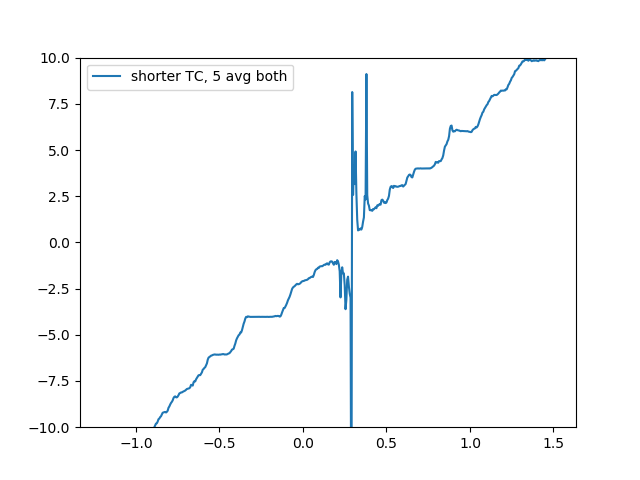

In [371]:
plt.figure()
# plt.plot(data132.srframe_volt_p1_set, 1/(data132.lockin830_X[:]/2e-9)/esqh, label='longer TC, no avg')
# plt.plot(data134.srframe_volt_p1_set, 1/(data134.lockin830_Xav[:]/2e-9)/esqh, label='shorter TC, 5 avg 830')
# plt.plot(data134.srframe_volt_p1_set, 1/(data134.lockin865_Xav[:]/2e-9)/esqh, label='shorter TC, 5 avg 865')
plt.plot(data134.srframe_volt_p1_set, 1/Rxyav2lockins/esqh, label='shorter TC, 5 avg both')
plt.ylim((-10, 10))
plt.legend()

In [362]:
triton.field()

1.999979

In [379]:
np.linspace(1.5, 3, 4)

array([1.5, 2. , 2.5, 3. ])

In [380]:
gvals = np.linspace(-1.2, 1.5, 541)
bvals = np.linspace(1.5, 3, 4)
data135, plot135 = npd.twod_param_sweep(triton.field_set_stable, bvals, srframe.volt_p1, gvals, lockin830_Xav, lockin830.Y, lockin865_Xav, lockin865.Y, SetDelay1=25, SetDelay2=2.4, Param2_SetBetween=0, DataName='M20_16-45_Rxy_2nA_0p3sTC_avg5', ZParam=[lockin830_Xav, lockin865_Xav])

Started at 2020-01-08 14:58:00
Please wait 259.99 seconds for the field sweep, plus the time required for operating the switch...
Please wait 260.00199999999995 seconds for the field sweep, plus the time required for operating the switch...
Please wait 260.00800000000004 seconds for the field sweep, plus the time required for operating the switch...
Please wait 260.00800000000004 seconds for the field sweep, plus the time required for operating the switch...
DataSet:
   location = 'data/2020-01-08/#013_M20_16-45_Rxy_2nA_0p3sTC_avg5_14-57-59'
   <Type>   | <array_id>                  | <array.name>     | <array.shape>
   Setpoint | triton_field_set_stable_set | field_set_stable | (4,)
   Setpoint | srframe_volt_p1_set         | volt_p1          | (4, 541)
   Measured | lockin830_Xav               | lockin830_Xav    | (4, 541)
   Measured | lockin830_Y                 | Y                | (4, 541)
   Measured | lockin865_Xav               | lockin865_Xav    | (4, 541)
   Measured | locki

In [381]:
triton.magnet_sweeprate(0.1)

In [383]:
Rxxav135 = (data135.lockin830_Xav[:, :] + data135.lockin865_Xav[:, :])/2/2e-9

<IPython.core.display.Javascript object>


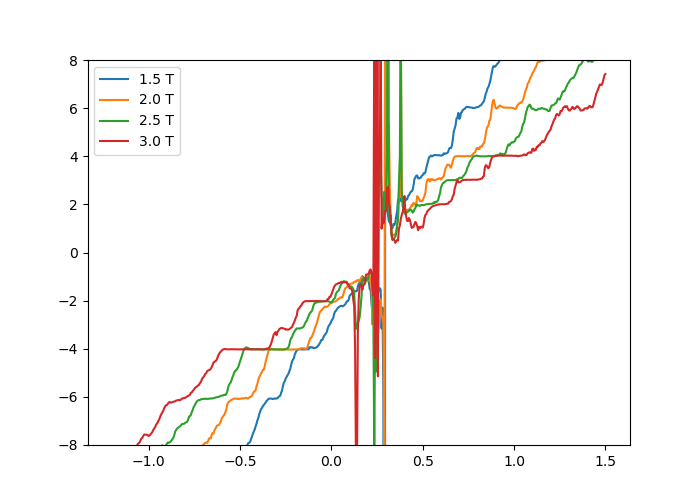

In [389]:
plt.figure(figsize=(7, 5))
fields = np.linspace(1.5, 3, 4)
for i in range(len(fields)):
    plt.plot(data134.srframe_volt_p1_set, 1/Rxxav135[i, :]/esqh, label=f'{fields[i]} T')
    
plt.legend()
plt.ylim((-8, 8))
plt.savefig('invRxy_1p5to3T_contacts16-45', dpi=300)

In [390]:
gvals = np.linspace(-1.2, 1.5, 541)
bvals = np.linspace(-1.5, -3, 4)
data136, plot136 = npd.twod_param_sweep(triton.field_set_stable, bvals, srframe.volt_p1, gvals, lockin830_Xav, lockin830.Y, lockin865_Xav, lockin865.Y, SetDelay1=25, SetDelay2=2.4, Param2_SetBetween=0, DataName='M20_16-45_Rxy_2nA_0p3sTC_avg5_negfield', ZParam=[lockin830_Xav, lockin865_Xav])

Started at 2020-01-08 19:36:34
Please wait 2710.0 seconds for the field sweep, plus the time required for operating the switch...
Please wait 309.994 seconds for the field sweep, plus the time required for operating the switch...
Please wait 310.006 seconds for the field sweep, plus the time required for operating the switch...
Please wait 310.0 seconds for the field sweep, plus the time required for operating the switch...
DataSet:
   location = 'data/2020-01-08/#014_M20_16-45_Rxy_2nA_0p3sTC_avg5_negfield_19-36-32'
   <Type>   | <array_id>                  | <array.name>     | <array.shape>
   Setpoint | triton_field_set_stable_set | field_set_stable | (4,)
   Setpoint | srframe_volt_p1_set         | volt_p1          | (4, 541)
   Measured | lockin830_Xav               | lockin830_Xav    | (4, 541)
   Measured | lockin830_Y                 | Y                | (4, 541)
   Measured | lockin865_Xav               | lockin865_Xav    | (4, 541)
   Measured | lockin865_Y                 | Y

In [391]:
gvals = np.linspace(-2, 2.3, 861)  # try it at low fields
bvals = np.linspace(-1.25, -0.5, 4)
data137, plot137 = npd.twod_param_sweep(triton.field_set_stable, bvals, srframe.volt_p1, gvals, lockin830_Xav, lockin830.Y, lockin865_Xav, lockin865.Y, SetDelay1=25, SetDelay2=2.4, Param2_SetBetween=0, DataName='M20_16-45_Rxy_2nA_0p3sTC_avg5_negfield', ZParam=[lockin830_Xav, lockin865_Xav])

Started at 2020-01-09 00:41:52
Please wait 1059.994 seconds for the field sweep, plus the time required for operating the switch...
Please wait 159.982 seconds for the field sweep, plus the time required for operating the switch...
Please wait 159.982 seconds for the field sweep, plus the time required for operating the switch...
Please wait 159.994 seconds for the field sweep, plus the time required for operating the switch...
DataSet:
   location = 'data/2020-01-09/#001_M20_16-45_Rxy_2nA_0p3sTC_avg5_negfield_00-41-51'
   <Type>   | <array_id>                  | <array.name>     | <array.shape>
   Setpoint | triton_field_set_stable_set | field_set_stable | (4,)
   Setpoint | srframe_volt_p1_set         | volt_p1          | (4, 861)
   Measured | lockin830_Xav               | lockin830_Xav    | (4, 861)
   Measured | lockin830_Y                 | Y                | (4, 861)
   Measured | lockin865_Xav               | lockin865_Xav    | (4, 861)
   Measured | lockin865_Y                

In [392]:
gvals = np.linspace(-2, 2.3, 861)  # try it at low fields
bvals = np.linspace(1.25, 0.5, 4)
data138, plot138 = npd.twod_param_sweep(triton.field_set_stable, bvals, srframe.volt_p1, gvals, lockin830_Xav, lockin830.Y, lockin865_Xav, lockin865.Y, SetDelay1=25, SetDelay2=2.4, Param2_SetBetween=0, DataName='M20_16-45_Rxy_2nA_0p3sTC_avg5_posfield', ZParam=[lockin830_Xav, lockin865_Xav])

Started at 2020-01-09 07:05:12
Please wait 1059.994 seconds for the field sweep, plus the time required for operating the switch...
Please wait 160.0 seconds for the field sweep, plus the time required for operating the switch...
Please wait 159.982 seconds for the field sweep, plus the time required for operating the switch...
Please wait 160.0 seconds for the field sweep, plus the time required for operating the switch...
DataSet:
   location = 'data/2020-01-09/#002_M20_16-45_Rxy_2nA_0p3sTC_avg5_posfield_07-05-11'
   <Type>   | <array_id>                  | <array.name>     | <array.shape>
   Setpoint | triton_field_set_stable_set | field_set_stable | (4,)
   Setpoint | srframe_volt_p1_set         | volt_p1          | (4, 861)
   Measured | lockin830_Xav               | lockin830_Xav    | (4, 861)
   Measured | lockin830_Y                 | Y                | (4, 861)
   Measured | lockin865_Xav               | lockin865_Xav    | (4, 861)
   Measured | lockin865_Y                 | Y

In [396]:
srframe.volt_p1(-5)  # 16-15
time.sleep(20)
gvals = np.linspace(-5, 5.5, 526)
data139, plot139 = npd.single_param_sweep(srframe.volt_p1, gvals, 1.1, lockin865.X, lockin865.Y, DataName='M20_15-16_2ptgatesweep_10nA_base')

Started at 2020-01-09 14:16:19
DataSet:
   location = 'data/2020-01-09/#006_M20_15-16_2ptgatesweep_10nA_base_14-16-18'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (526,)
   Measured | lockin865_X         | X            | (526,)
   Measured | lockin865_Y         | Y            | (526,)
Finished at 2020-01-09 14:26:56


In [397]:
srframe.volt_p1(-5)  # 14-15
time.sleep(20)
gvals = np.linspace(-5, 5.5, 526)
data140, plot140 = npd.single_param_sweep(srframe.volt_p1, gvals, 1.1, lockin865.X, lockin865.Y, DataName='M20_14-15_2ptgatesweep_10nA_base')

Started at 2020-01-09 14:32:35
DataSet:
   location = 'data/2020-01-09/#007_M20_14-15_2ptgatesweep_10nA_base_14-32-34'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (526,)
   Measured | lockin865_X         | X            | (526,)
   Measured | lockin865_Y         | Y            | (526,)
Finished at 2020-01-09 14:43:12


In [398]:
srframe.volt_p1(0)

In [399]:
srframe.volt_p1(-5)  # 13 all
time.sleep(20)
gvals = np.linspace(-5, 5.5, 526)
data141, plot141 = npd.single_param_sweep(srframe.volt_p1, gvals, 1.1, lockin865.X, lockin865.Y, DataName='M20_13all_10nA_6K')

Started at 2020-01-09 16:41:19
DataSet:
   location = 'data/2020-01-09/#008_M20_13all_10nA_6K_16-41-18'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (526,)
   Measured | lockin865_X         | X            | (526,)
   Measured | lockin865_Y         | Y            | (526,)
Finished at 2020-01-09 16:51:56


In [400]:
srframe.volt_p1(-5)  # 45 all
time.sleep(20)
gvals = np.linspace(-5, 5.5, 526)
data142, plot142 = npd.single_param_sweep(srframe.volt_p1, gvals, 1.1, lockin865.X, lockin865.Y, DataName='M20_45all_10nA_6K')

Started at 2020-01-09 16:53:26
DataSet:
   location = 'data/2020-01-09/#009_M20_45all_10nA_6K_16-53-25'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (526,)
   Measured | lockin865_X         | X            | (526,)
   Measured | lockin865_Y         | Y            | (526,)
Finished at 2020-01-09 17:04:03
